\tableofcontents

# Introduction

## Data Description:

### Story:
Living and studying across seven diverse cities provided me with a unique platform to document my experiences and observations through vlogging. While the idea of starting a YouTube channel was always enticing, I never took the plunge. These archived vlogs, however, present a ripe opportunity for analysis and introspection. Through this project, I aim to construct a machine learning pipeline to analyze and decode the underlying emotions conveyed in these vlogs. This exercise is not just about the words I've spoken but the sentiments they convey, the moods they reflect, and the emotional landscape they traverse.

![/Users/rachaelchew/Downloads/cs156/1.jpeg](/Users/rachaelchew/Downloads/cs156/1.jpeg)
![/Users/rachaelchew/Downloads/cs156/2.jpeg](/Users/rachaelchew/Downloads/cs156/2.jpeg)
![/Users/rachaelchew/Downloads/cs156/3.jpeg](/Users/rachaelchew/Downloads/cs156/3.jpeg)
![/Users/rachaelchew/Downloads/cs156/4.jpeg](/Users/rachaelchew/Downloads/cs156/4.jpeg)

### Data Acquisition:
These vlogs were captured spontaneously across various cities I've lived in from 2020 to 2023. Each vlog was recorded with the intent of sharing a moment, an observation, or an emotion with an audience. Over time, these vlogs have morphed into a digital journal, each entry echoing my state of mind, my surroundings, and my evolving perspective.

### Sample Data:
I have an archive of 102 vlogs spanning from 2020 to 2023. These vlogs vary in length and content but together constitute a comprehensive tapestry of my experiences during these years.

## Problem Framing:

### Context:
Emotions, the subtle undertones of our communication, often speak louder than words. Especially in vlogs, the emotional undertone can be the difference between a viewer's fleeting glance and genuine engagement. The quest here is to distill and categorize the spectrum of emotions manifested through tonal nuances in these vlogs. Can the stress of a semester in Taiwan, the fervor of an Indian summer, or the vibrancy of New York be discerned from my vlogs?

### Solution Specification:
This journey will be anchored by three unsupervised learning models, adept at analyzing vlog audio to discern the underlying emotions. By tuning into audio attributes—tonality, pitch, frequency—we aim to create a model that can classify vlog segments into distinct emotional categories. We'll harness the capabilities of tools like librosa for audio feature extraction and lean on clustering techniques like Hierarchical clustering and K-means for model development.

My approach includes:

1. Data Pre-processing: Extracting audio, formatting, and segmenting vlogs.
2. Feature Engineering: Harnessing audio metrics indicative of emotions.
3. Model Development: Designing a model that discerns emotional nuances.
4. Evaluation: Assessing the model's proficiency using metrics like accuracy, precision, and recall.

The end goal is to architect a machine learning pipeline that distills a vlog into its emotional essence. By meticulously analyzing tonal dynamics, we hope to map a spectrum of emotions, offering insights into the emotional influences of different environments and experiences.

## Insights & Applications:
What revelations can we expect from this endeavor?

1. Viewer Engagement: Emotions are a potent tool for viewer engagement. Recognizing the emotional resonance of a vlog could empower content strategists to align offerings with audience moods and preferences.

2. Predictive Content Analysis: Emotion-based analysis, when juxtaposed with viewership metrics, can predict content preferences, offering a roadmap for future content creation.

3. Personal Emotion Mapping: For me, this is also a mirror reflecting my emotional trajectories across time and space. Such introspection can be invaluable for personal growth, offering a window into my evolving emotional landscape.

4. Content Strategy Refinement: For content creators, understanding emotional undertones can fine-tune content schedules. For instance, uplifting vlogs might combat Monday blues, while introspective ones could be perfect weekend contemplations.


# Data Ingestion

## Code for Audio Extraction

Here, to extract audio, I'll loop through each of my vlog files, extract the audio, and then save it to a structured directory. Here is the code for this process:

In [ ]:
# import necessary libraries
# This Python library allows for video editing, including extracting audio.
from moviepy.editor import *

In [ ]:
import os
import logging
from moviepy.editor import VideoFileClip

# Suppress verbose output from moviepy
logging.getLogger('moviepy').setLevel(logging.CRITICAL)

# Define source and destination directories
video_dir = '/Users/rachaelchew/Downloads/Minerva/Buenos Aires/CS156/156selfiedata'
audio_dir = '/Users/rachaelchew/Downloads/Minerva/Buenos Aires/CS156/156selfieaudio'

if not os.path.exists(audio_dir):
    os.makedirs(audio_dir)

all_successful = True  # To keep track of any errors

# Loop through all videos and extract audio
for video_file in os.listdir(video_dir):
    if video_file.endswith((".mp4", ".MOV")):  # Handling both mp4 and mov formats
        audio_path = os.path.join(audio_dir, video_file.split('.')[0] + ".wav")  # determine the .wav path

        # Check if audio file already exists
        if not os.path.exists(audio_path):
            video_path = os.path.join(video_dir, video_file)

            try:
                # Extract audio
                clip = VideoFileClip(video_path)
                clip.audio.write_audiofile(audio_path, verbose=False)  # Setting verbose to False

            except Exception as e:
                all_successful = False  # Set the flag to False since there was an error

# After processing all files, print the success message if all were successful
if all_successful:
    print("All new audio files were extracted successfully!")
else:
    print("There were errors in audio file extraction.")


All new audio files were extracted successfully!


To verify my extraction, I navigated to the audio directory and checked to ensure all audio files have been extracted successfully. The number of audio files matched my number of vlog videos (102).

To enhance my code, I  made sure to include an error-handling mechanism, done using the try...except block. The try block contains the code that might throw an exception (i.e., the audio extraction process).

If an error occurs while processing a video, the except block will catch this error, and the error message will be printed. This allows the loop to continue processing the next video without stopping the entire process.

Using such an error-handling mechanism ensures that even if one or a few files cause issues (maybe because they're corrupted or there are some permissions issues), the rest of the files in the directory will still be processed.

# Data Pre-processing

## Convert audio to a format suitable for analysis.

In this section, I will execute the following steps to pre-process my data, namely to make my audio files easier to analyse.

1. Load audio files: Load your audio data into Python using librosa.
2. Standardize sample rates: Ensure all audio files have the same sample rate to make analysis consistent.
3. Trim silences: Remove parts of the audio that are silent or below a certain amplitude threshold.
4. Exploratory Analysis: Visualize the waveform of a sample audio file to understand its structure.

## Pre-process one audio file

As an example, I will load one audio file, to demonstrate how the pre-processing is done. I will also display the waveform of the audio file, to visually understand its structure.

#### Step 1: Load audio files using librosa.

In this code, y is the audio time series, while sr is the sampling rate of y.

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define path to audio files
audio_dir = '/Users/rachaelchew/Downloads/Minerva/Buenos Aires/CS156/156selfieaudio'

# Load an example audio file
y, sr = librosa.load(os.path.join(audio_dir, "argentina, introspective, narration, buenos aires streets.wav"))

####  Step 2: Standardize Sample Rates
Since I have multiple audio files and they might have different sample rates, I will standardize them. When I use librosa.load(), it already standardizes the sample rate to 22.05 KHz by default. To choose a different sample rate, I specified it with the sr parameter.

In [ ]:
sr_new = 16000  # Example: 16 KHz
y, sr = librosa.load(os.path.join(audio_dir, "argentina, introspective, narration, buenos aires streets.wav"), sr=sr_new)

#### Step 3: Trim Silences

I included an additional step to trim the silences in my audio files. This is due to the following reasons:

1. Data Efficiency: Silence periods in my audio data don't contain any emotion-related information. By trimming them, I reduce the amount of unnecessary data that my model has to process.

2. Computational Efficiency: Trimming silences can reduce the size of my audio files, making subsequent processes (like feature extraction) faster.

3. Accuracy: Long silences might introduce noise during the feature extraction process. By trimming these silences, I ensure that features extracted are primarily from content-rich segments, potentially improving the performance of my emotion classification model.

4. Consistency: Especially since I am dealing with user-generated content (like personal vlogs), the audio can be inconsistent with varying amounts of silence at the beginning or end. Trimming ensures a more uniform dataset.

Here, top_db is the threshold (in decibels) below which the audio will be considered as silence.

In [ ]:
# Trim the beginning and ending silence from the audio signal
trim_y, index = librosa.effects.trim(y, top_db=20)

#### Step 4: Exploratory Analysis - Plot Waveform of a Sample Audio

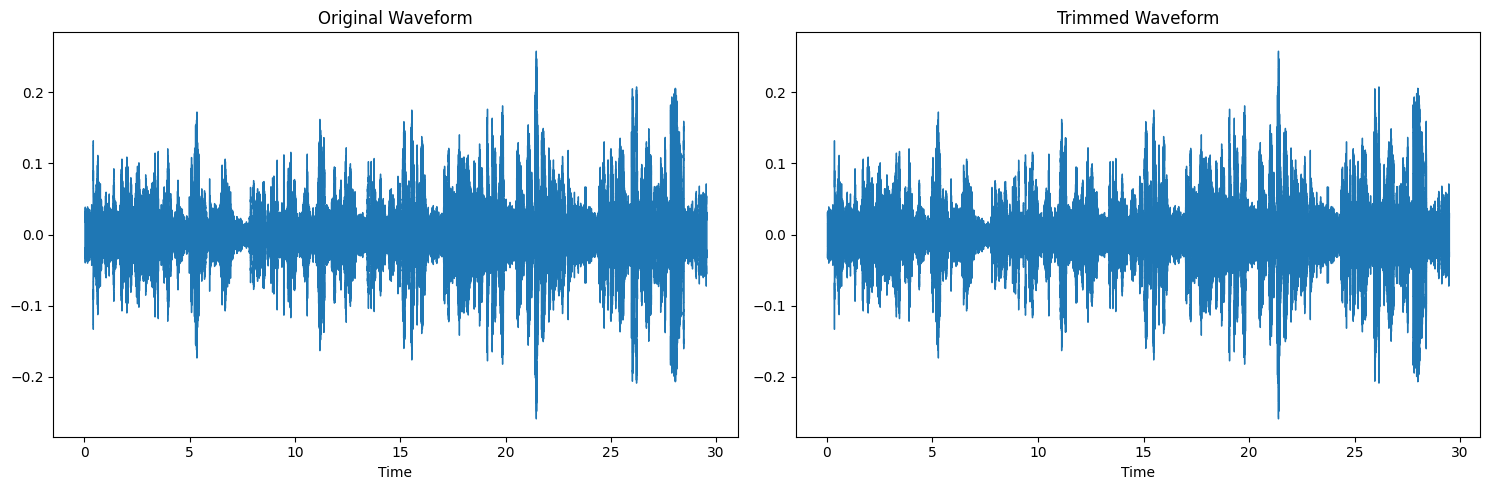

In [ ]:
# Plot the original and trimmed waveforms
plt.figure(figsize=(15, 5))

# Original waveform
plt.subplot(1, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Waveform')

# Trimmed waveform
plt.subplot(1, 2, 2)
librosa.display.waveshow(trim_y, sr=sr)
plt.title('Trimmed Waveform')

plt.tight_layout()
plt.show()


The left plot shows the original waveform, while the right plot displays the trimmed version with silences removed.

#### What potential insights can we draw from the 2 visualisations?

The waveform visualization of an audio recording offers a snapshot of how sound intensity varies with time. Analyzing this visualization, especially in the context of comparing the original with its trimmed version, can provide several valuable insights:

1. Sound Intensity: The vertical aspect of the waveform is indicative of the sound's intensity. Higher peaks signify louder parts, while sections closer to the center (around zero) hint at softer sounds or periods of silence.

2. Silent Segments: A comparison between the original and trimmed versions underscores sections that were largely silent in the original recording. This comparison offers insights into possible background noise levels or unintentional quiet spans in the vlog.

3. Distribution of Vocal Activity: Observing the pattern and frequency of peaks and troughs can give a sense of the distribution of vocal activity. Dense peaks might imply active conversation, while scattered peaks could point to breaks or pauses.

4. Duration Insights: The time axis alows me to discern the duration of the recording and see how much silence or "dead air" got eliminated during trimming.

5. Possible Distortion Indicators: Should the waveform consistently touch the graph's extremes, it might be a sign that the audio is "clipped," suggesting potential distortion due to an overly robust signal.

6. Volume Consistency: Any abrupt changes in waveform height throughout the recording could indicate fluctuations in volume. Parts with noticeably higher peaks could be louder than sections with lower peaks.

#### Inferences from the 2 visualisations:

Trimming Efficiency: Observing the deviations between the initial and trimmed waveforms, one can assess the trimming process's precision. If the trimmed version mirrors a significant portion of the original, the trimming might be on the conservative side. On the other hand, if large chunks of the original seem absent in the trimmed version, the trimming could be overly stringent.

Intensity of Expression: This is a nuanced observation, but periods with greater sound intensity might correspond to heightened emotional expressions, such as enthusiasm or frustration, while quieter segments could be linked to milder emotions like tranquility or melancholy.

## Pre-processing all audio files

In [ ]:
import soundfile as sf

# Directory containing all audio files
audio_dir = '/Users/rachaelchew/Downloads/Minerva/Buenos Aires/CS156/156selfieaudio'

# Where I want to save the processed audio
output_dir = '/Users/rachaelchew/Downloads/Minerva/Buenos Aires/CS156/156processedaudio'

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through all audio files
for audio_file in os.listdir(audio_dir):
    if audio_file.endswith('.wav'):
        # Construct full file path
        filepath = os.path.join(audio_dir, audio_file)

        # Load audio
        y, sr = librosa.load(filepath)

        # Optional: Trim silences
        trim_y, _ = librosa.effects.trim(y, top_db=20)

        # Save the trimmed audio
        output_filepath = os.path.join(output_dir, audio_file)
        sf.write(output_filepath, trim_y, sr)

## Basic Data Analysis - Descriptive Statistics

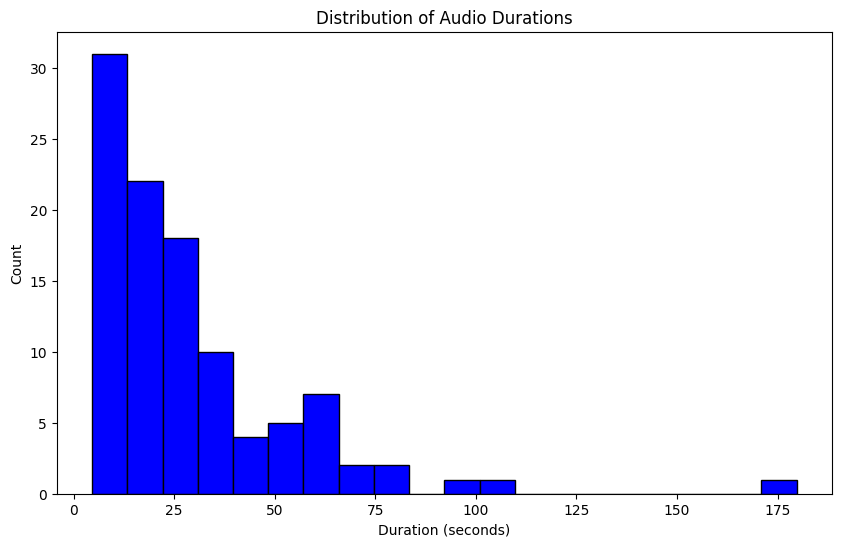

Mean Amplitude: -1.3678745803809256e-05
Standard Deviation of Amplitude: 0.04540267833005051
Skewness of Amplitude: -0.04803400263204927


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Initialize lists to collect data
durations = []
amplitude_mean = []
amplitude_std = []
amplitude_skew = []

# Loop through processed audio files
for audio_file in os.listdir(output_dir):
    if audio_file.endswith('.wav'):

        # Construct full file path
        filepath = os.path.join(output_dir, audio_file)

        # Load audio
        y, sr = sf.read(filepath)

        # Collect duration of each audio
        durations.append(len(y) / sr)

        # Basic statistics on amplitude
        amplitude_mean.append(np.mean(y))
        amplitude_std.append(np.std(y))
        amplitude_skew.append(stats.skew(y))

# Plot duration distribution
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

# Summary statistics
print(f"Mean Amplitude: {np.mean(amplitude_mean)}")
print(f"Standard Deviation of Amplitude: {np.mean(amplitude_std)}")
print(f"Skewness of Amplitude: {np.mean(amplitude_skew)}")


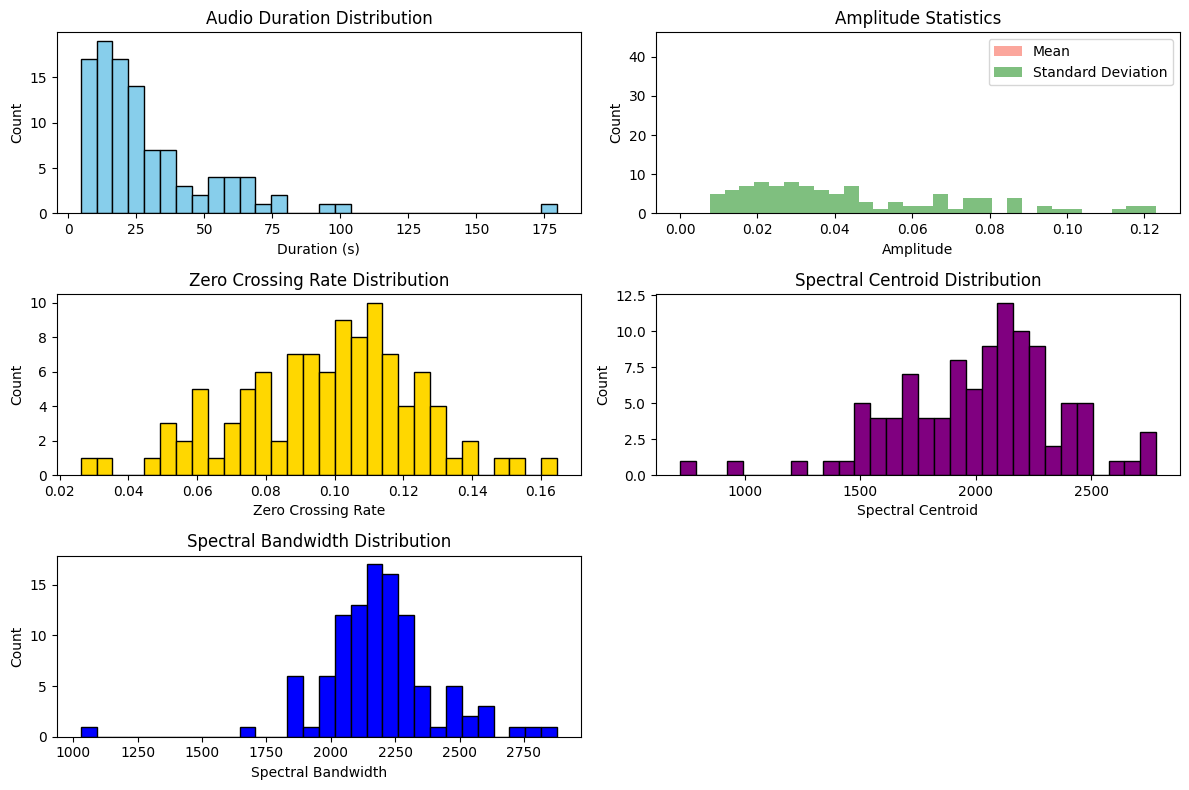

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Lists to hold values for each audio file
durations = []
amplitude_mean = []
amplitude_std = []
amplitude_skew = []
zero_crossings = []
spectral_centroids = []
spectral_bandwidths = []

for audio_file in os.listdir(output_dir):
    if audio_file.endswith('.wav'):
        filepath = os.path.join(output_dir, audio_file)

        y, sr = librosa.load(filepath)

        # Duration
        durations.append(librosa.get_duration(y=y, sr=sr))

        # Amplitude statistics
        amplitude_mean.append(np.mean(y))
        amplitude_std.append(np.std(y))
        amplitude_skew.append(stats.skew(y))

        # Zero Crossing Rate
        zero_crossings.append(np.mean(librosa.feature.zero_crossing_rate(y)))

        # Spectral Centroid
        spectral_centroids.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)))

        # Spectral Bandwidth
        spectral_bandwidths.append(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)))

# Plot duration distribution
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.hist(durations, bins=30, color='skyblue', edgecolor='black')
plt.title('Audio Duration Distribution')
plt.xlabel('Duration (s)')
plt.ylabel('Count')

# Plot Amplitude Statistics
plt.subplot(3, 2, 2)
plt.hist(amplitude_mean, bins=30, color='salmon', alpha=0.7, label='Mean')
plt.hist(amplitude_std, bins=30, color='green', alpha=0.5, label='Standard Deviation')
plt.title('Amplitude Statistics')
plt.xlabel('Amplitude')
plt.ylabel('Count')
plt.legend()

# Zero Crossing Rate
plt.subplot(3, 2, 3)
plt.hist(zero_crossings, bins=30, color='gold', edgecolor='black')
plt.title('Zero Crossing Rate Distribution')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

# Spectral Centroid
plt.subplot(3, 2, 4)
plt.hist(spectral_centroids, bins=30, color='purple', edgecolor='black')
plt.title('Spectral Centroid Distribution')
plt.xlabel('Spectral Centroid')
plt.ylabel('Count')

# Spectral Bandwidth
plt.subplot(3, 2, 5)
plt.hist(spectral_bandwidths, bins=30, color='blue', edgecolor='black')
plt.title('Spectral Bandwidth Distribution')
plt.xlabel('Spectral Bandwidth')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Interpretation of the above distributions

1. Distribution of Audio Durations: Since most vlogs are of shorter duration, it indicate that I prefer brief, concise entries. A few longer entries might be outliers or specific events that I have recorded at length.
2. Amplitude Mean and Standard Deviation: There is a small variation in amplitude across vlogs, which might indicate similar recording conditions or emotional intensity.
3. Zero Crossings and Spectral Features: High zero crossing rates might indicate more dynamic content, while the spectral centroid can provide insights into the 'brightness' of the audio.

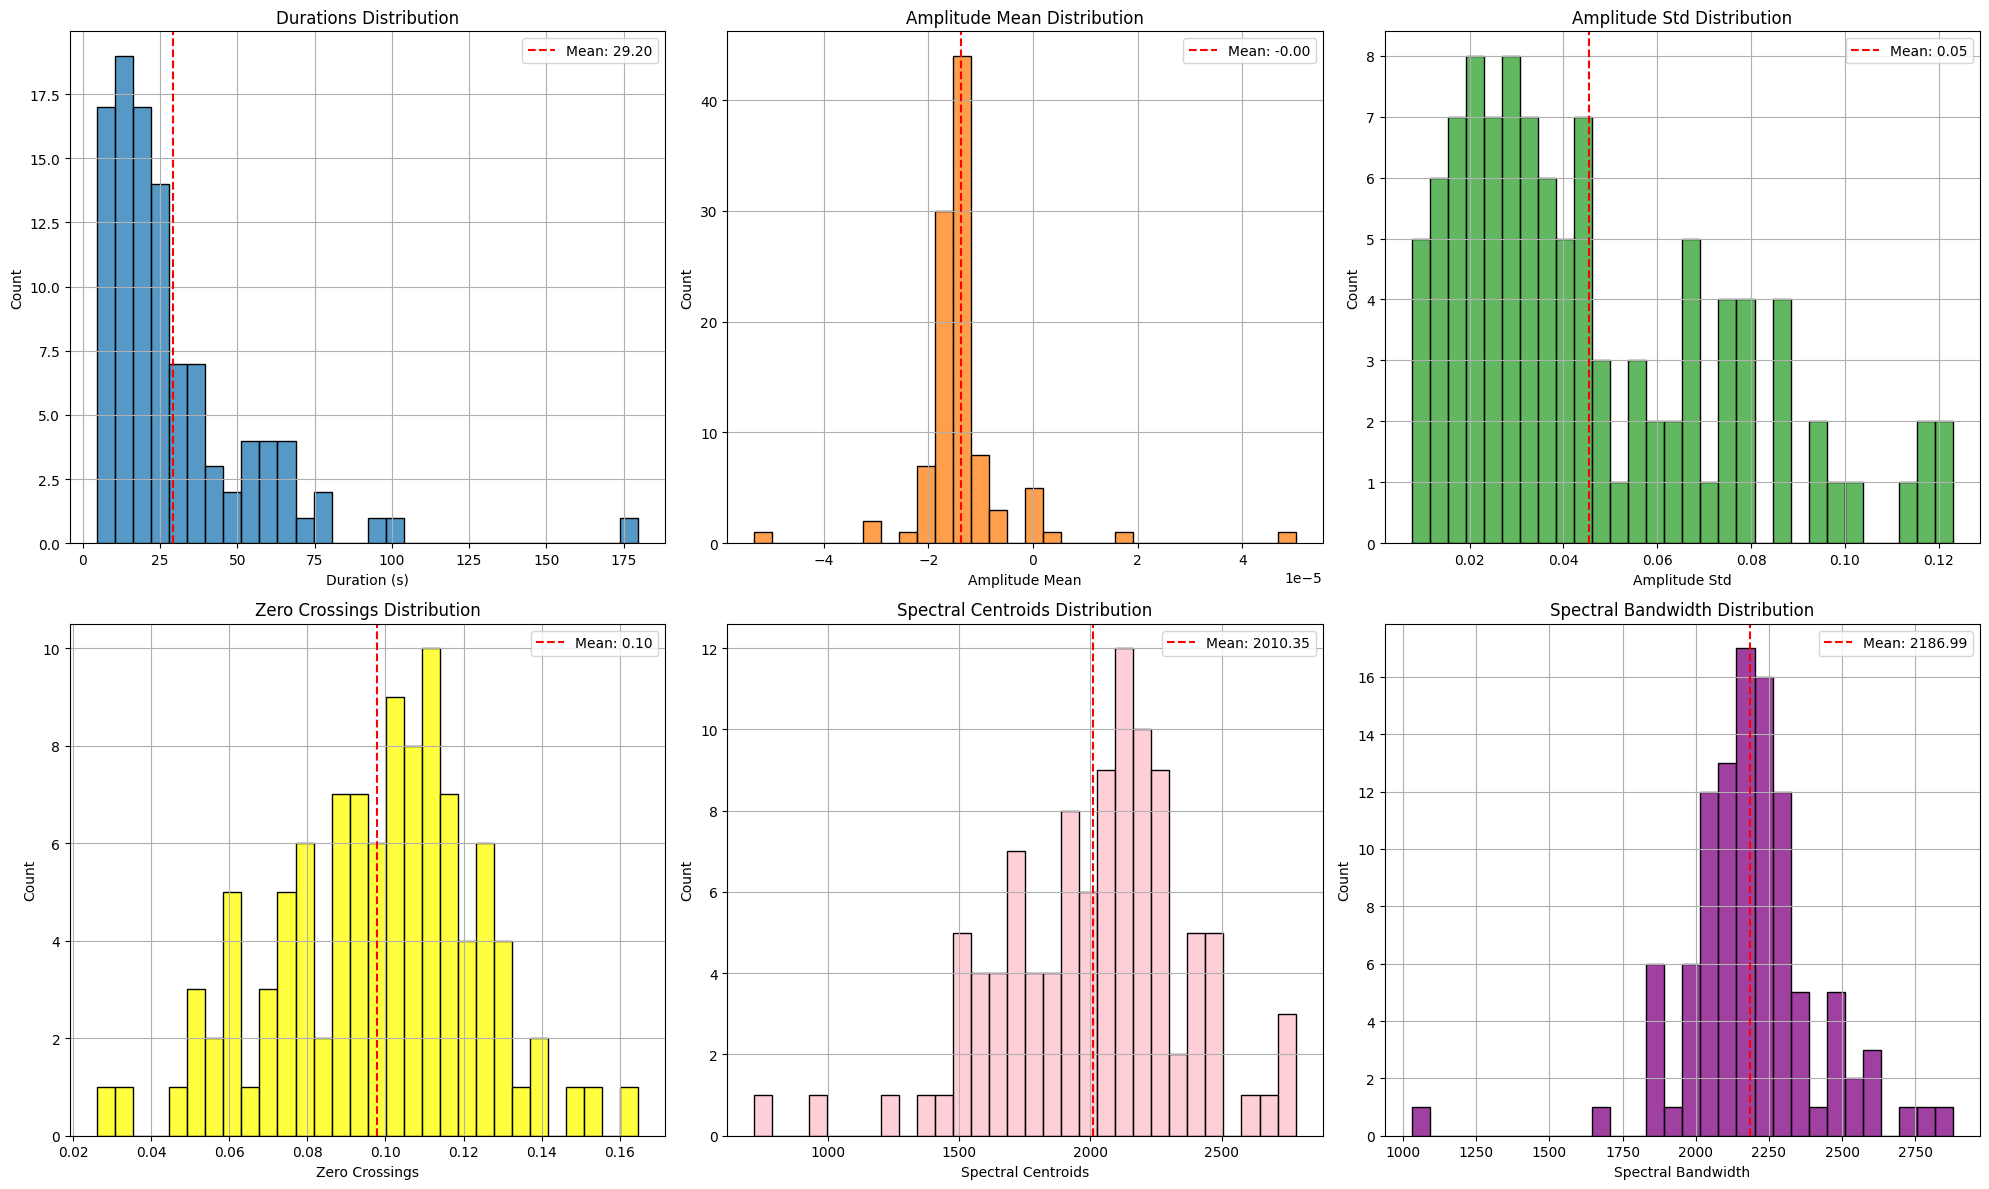

In [ ]:
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats

# Lists to store extracted features
durations = []
amplitude_mean = []
amplitude_std = []
amplitude_skew = []
zero_crossings = []
spectral_centroids = []
spectral_bandwidths = []
pitches = []
tempos = []
mfccs_mean = []
chroma_stft_mean = []

# Extract features for each audio file
for audio_file in os.listdir(output_dir):
    if audio_file.endswith('.wav'):
        filepath = os.path.join(output_dir, audio_file)
        y, sr = librosa.load(filepath)

        # Duration
        durations.append(librosa.get_duration(y=y))
        # Amplitude statistics
        amplitude_mean.append(np.mean(y))
        amplitude_std.append(np.std(y))
        amplitude_skew.append(skew(y))
        # Zero Crossings
        zero_crossings.append(np.mean(librosa.feature.zero_crossing_rate(y)))
        # Spectral Centroid
        spectral_centroids.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)))
        # Spectral Bandwidth
        spectral_bandwidths.append(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)))
        # Pitch and Tempo
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        tempo, pitch = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
        pitches.append(np.mean(pitch))
        tempos.append(tempo)

# Set up a color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

plt.figure(figsize=(20, 12))

# Plot Duration Distribution
plt.subplot(2, 3, 1)
sns.histplot(durations, color=colors[0], bins=30)
plt.axvline(np.mean(durations), color='r', linestyle='--', label=f"Mean: {np.mean(durations):.2f}")
plt.title("Durations Distribution")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.grid(True)
plt.legend()

# Plot Amplitude Mean Distribution
plt.subplot(2, 3, 2)
sns.histplot(amplitude_mean, color=colors[1], bins=30)
plt.axvline(np.mean(amplitude_mean), color='r', linestyle='--', label=f"Mean: {np.mean(amplitude_mean):.2f}")
plt.title("Amplitude Mean Distribution")
plt.xlabel("Amplitude Mean")
plt.grid(True)
plt.legend()

# Plot Amplitude Std Distribution
plt.subplot(2, 3, 3)
sns.histplot(amplitude_std, color=colors[2], bins=30)
plt.axvline(np.mean(amplitude_std), color='r', linestyle='--', label=f"Mean: {np.mean(amplitude_std):.2f}")
plt.title("Amplitude Std Distribution")
plt.xlabel("Amplitude Std")
plt.grid(True)
plt.legend()

# Plot Zero Crossings
plt.subplot(2, 3, 4)
sns.histplot(zero_crossings, color='yellow', bins=30)
plt.axvline(np.mean(zero_crossings), color='r', linestyle='--', label=f"Mean: {np.mean(zero_crossings):.2f}")
plt.title("Zero Crossings Distribution")
plt.xlabel("Zero Crossings")
plt.grid(True)
plt.legend()

# Plot Spectral Centroids
plt.subplot(2, 3, 5)
sns.histplot(spectral_centroids, color='pink', bins=30)
plt.axvline(np.mean(spectral_centroids), color='r', linestyle='--', label=f"Mean: {np.mean(spectral_centroids):.2f}")
plt.title("Spectral Centroids Distribution")
plt.xlabel("Spectral Centroids")
plt.grid(True)
plt.legend()

# Plot Spectral Bandwidths
plt.subplot(2, 3, 6)
sns.histplot(spectral_bandwidths, color='purple', bins=30)
plt.axvline(np.mean(spectral_bandwidths), color='r', linestyle='--', label=f"Mean: {np.mean(spectral_bandwidths):.2f}")
plt.title("Spectral Bandwidth Distribution")
plt.xlabel("Spectral Bandwidth")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Feature Standardization
scaler = StandardScaler()
spectral_centroids = scaler.fit_transform(np.array(spectral_centroids).reshape(-1, 1))
spectral_bandwidths = scaler.fit_transform(np.array(spectral_bandwidths).reshape(-1, 1))
zero_crossings = scaler.fit_transform(np.array(zero_crossings).reshape(-1, 1))
pitches = scaler.fit_transform(np.array(pitches).reshape(-1, 1))
tempos = scaler.fit_transform(np.array(tempos).reshape(-1, 1))

#### What can we gather from the above descriptive statistics?

1. Duration Distribution: Understanding the distribution of the durations of my audio clips can be crucial. If there's a significant variation in the lengths of clips, it might affect the way you segment or use them in training a model.

2. Amplitude Statistics: The amplitude of an audio signal can be an indicator of its loudness or intensity. This section of the code plots the mean, standard deviation, and skewness of the amplitudes. Emotional intensity could possibly correlate with amplitude intensity.

3. Waveform Visualization: While this is a basic representation, it gives you a sense of the audio. Spikes represent possible words or sounds. Silences are usually flat lines.

4. Zero Crossing Rate: This is the rate at which the signal changes from positive to negative or vice versa. It's commonly used to measure the noisiness or percussiveness of a signal.

5. Spectral Centroid: This indicates where the "center of mass" of the spectrum is located and can be used to describe the brightness of a sound.

6. Spectral Bandwidth: This relates to the width of the sound spectrum and can be used to differentiate between harmonic (tonal) and non-harmonic content.




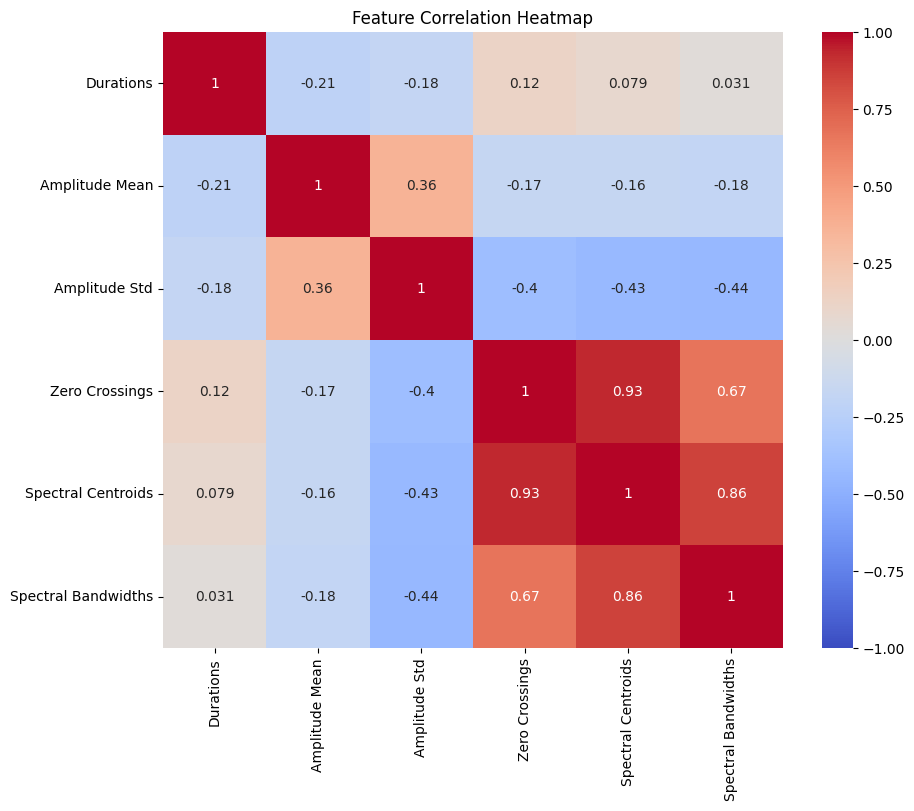

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the features
# Create a DataFrame from the features
df = pd.DataFrame({
    'Durations': durations,
    'Amplitude Mean': amplitude_mean,
    'Amplitude Std': amplitude_std,
    'Zero Crossings': np.array(zero_crossings).ravel(),
    'Spectral Centroids': np.array(spectral_centroids).ravel(),
    'Spectral Bandwidths': np.array(spectral_bandwidths).ravel()
})


# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


Text(0, 0.5, 'Count')

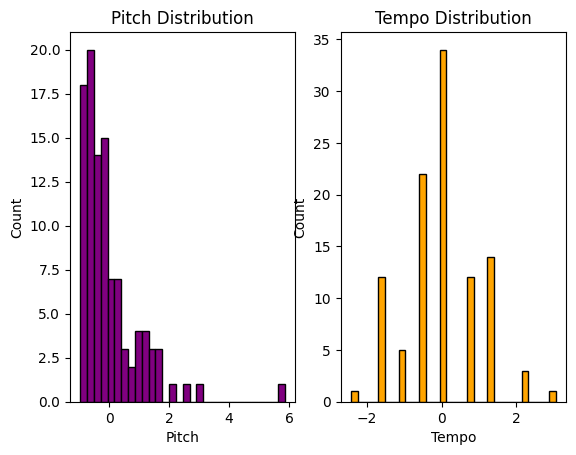

In [ ]:
# Pitch
plt.subplot(1, 2, 1)
plt.hist(pitches, bins=30, color='purple', edgecolor='black')
plt.title('Pitch Distribution')
plt.xlabel('Pitch')
plt.ylabel('Count')

# Tempo
plt.subplot(1, 2, 2)
plt.hist(tempos, bins=30, color='orange', edgecolor='black')
plt.title('Tempo Distribution')
plt.xlabel('Tempo')
plt.ylabel('Count')

#### What can we gather from pitch and tempo?

Pitch: Refers to the perceived frequency of a sound. It is one of the primary auditory sensations and can indicate the emotional intensity of the speech.

Tempo: Refers to the speed or pace of the audio. In music, tempo relates to rhythm, but in speech, faster tempos might indicate excitement or urgency

### MFCC and Chroma Analysis

#### MFCC (Mel-frequency cepstral coefficients) Analysis

MFCC captures the short-term power spectrum of sound and is used in both speech recognition and music information retrieval. It represents the shape of the power spectrum of a sound signal.

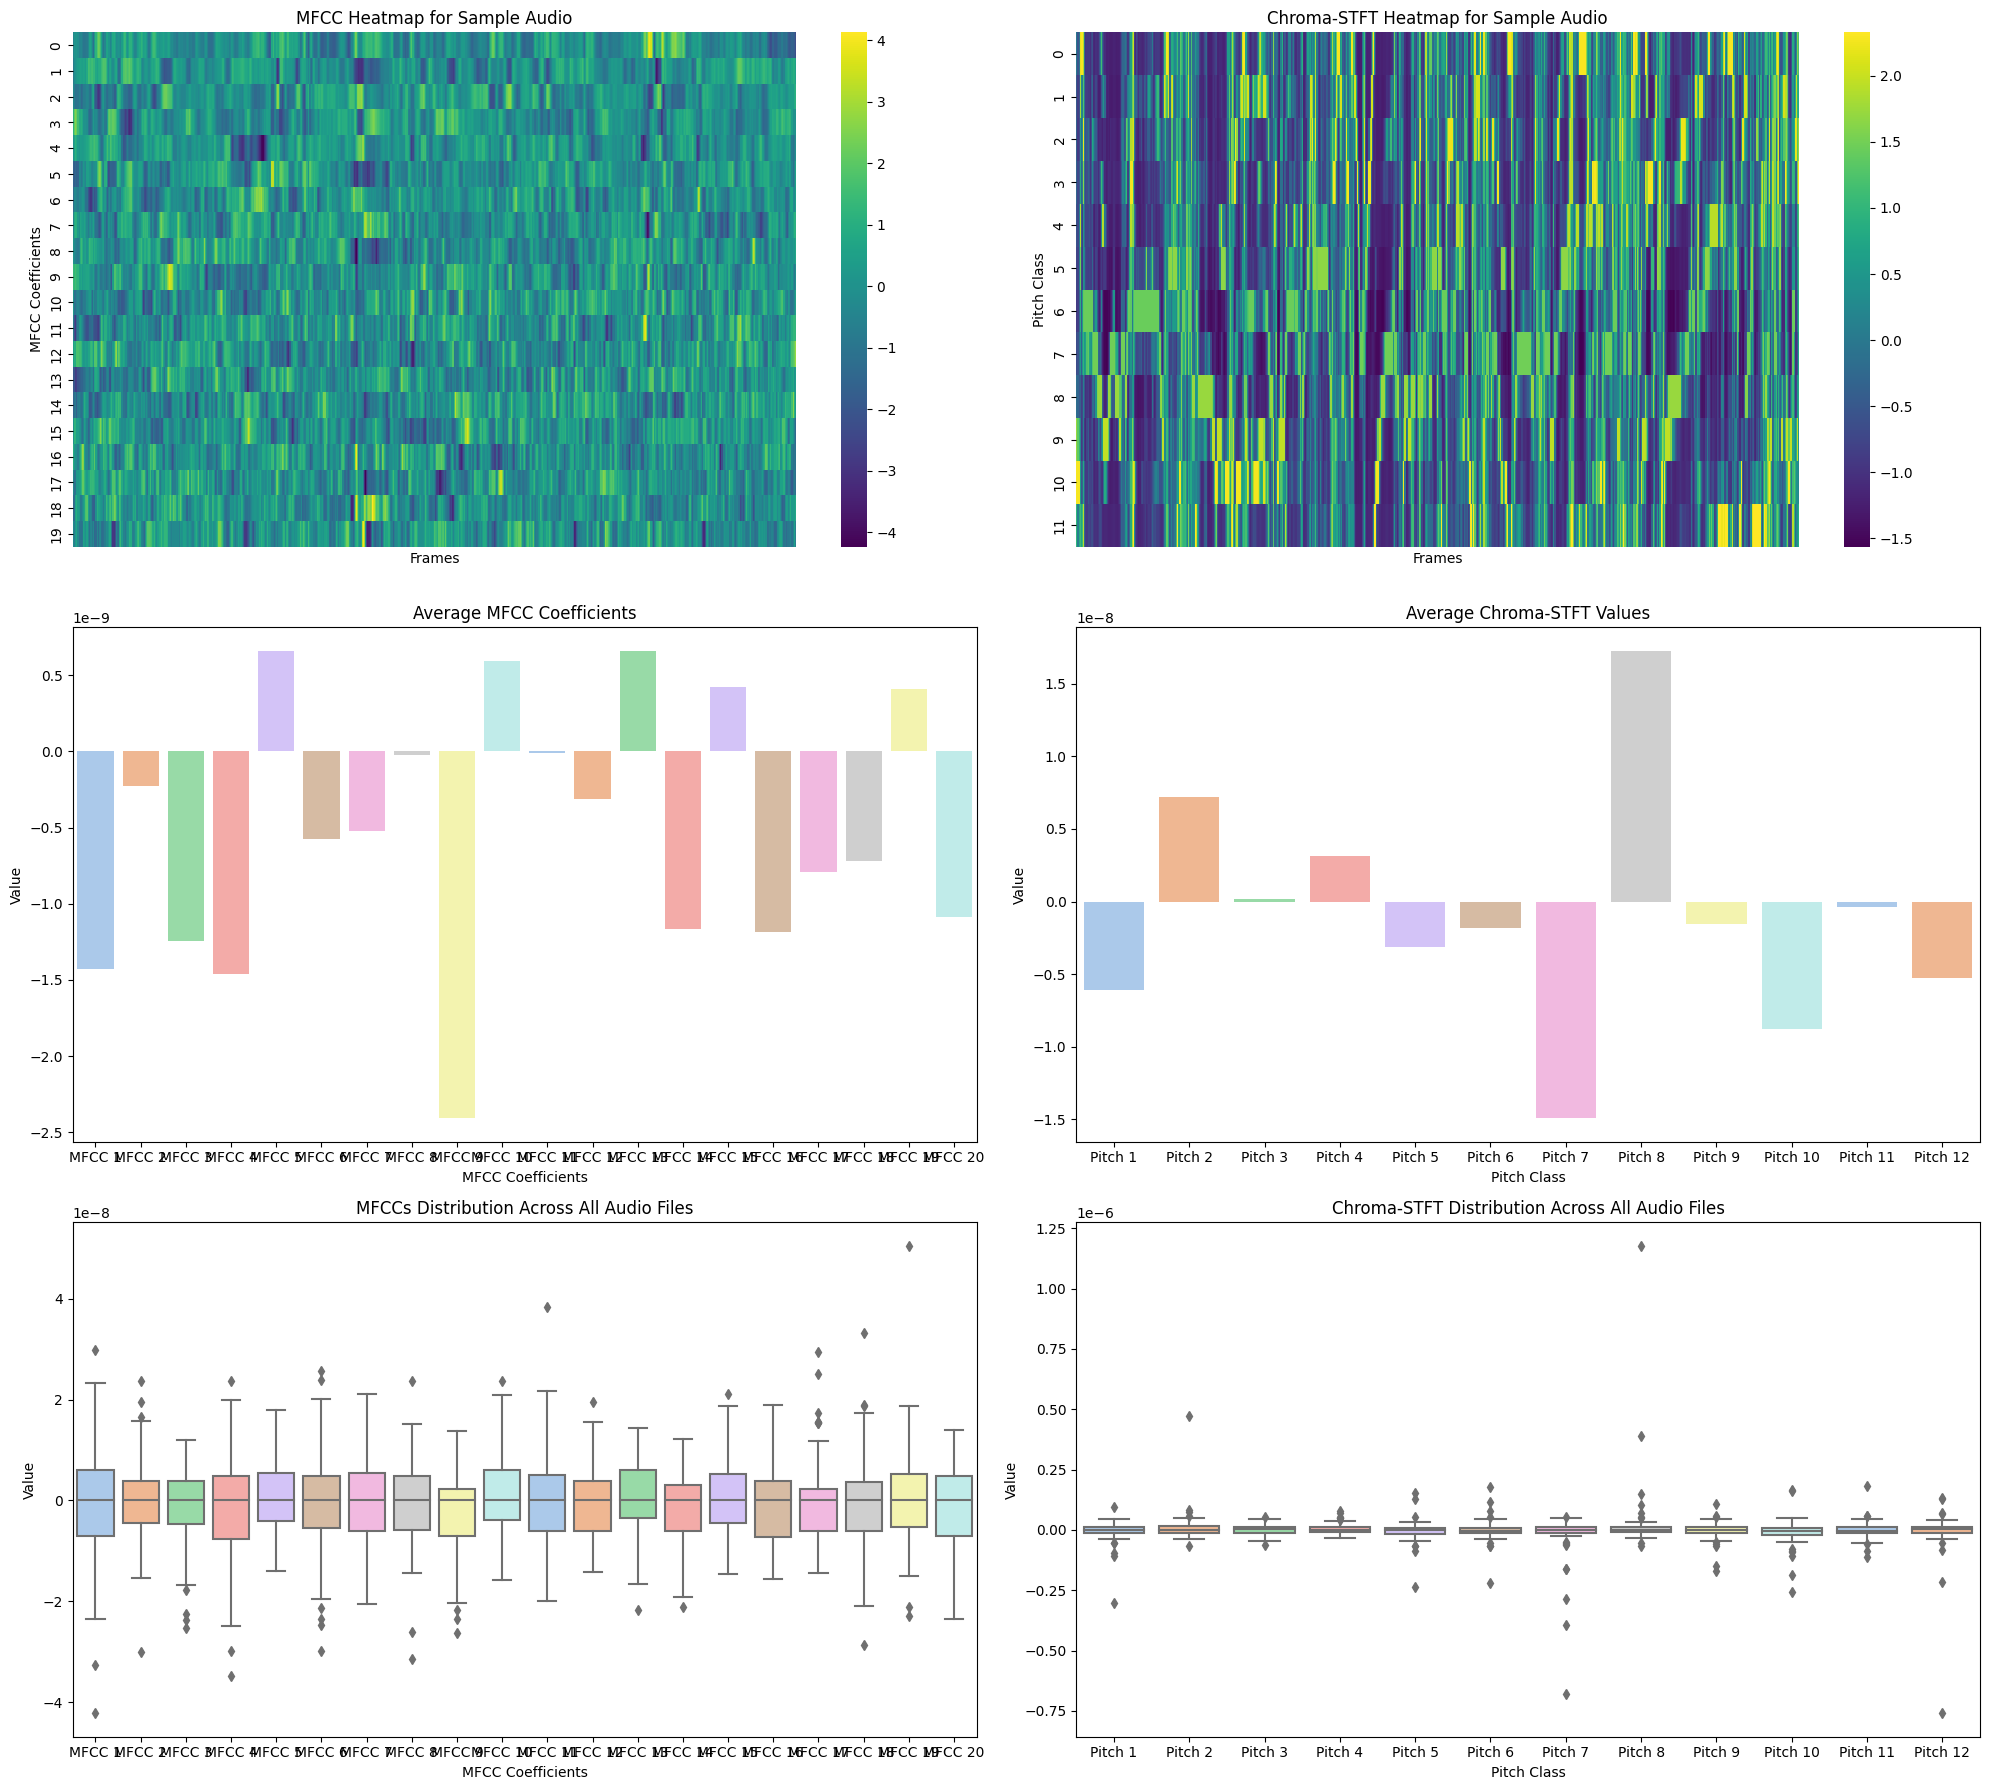

In [ ]:
import sklearn.preprocessing

# Lists to hold MFCC and chroma-stft values for each audio file
mfccs = []
chromas = []

# Extract and store MFCC and chroma-stft for each audio file in the directory
for audio_file in os.listdir(output_dir):
    if audio_file.endswith('.wav'):
        filepath = os.path.join(output_dir, audio_file)

        # Load audio file
        y, sr = librosa.load(filepath)

        # Extract MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr)

        # Standardize MFCCs for zero mean and unit variance
        mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

        # Store MFCCs
        mfccs.append(mfcc)

        # Extract Chroma-STFT
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)

        # Standardize Chroma-STFT for zero mean and unit variance
        chroma = sklearn.preprocessing.scale(chroma, axis=1)

        # Store Chroma-STFT
        chromas.append(chroma)

# Extract mean values for each MFCC coefficient across all audios
mfccs_means = [np.mean(mfcc, axis=1) for mfcc in mfccs]
chromas_means = [np.mean(chroma, axis=1) for chroma in chromas]

plt.figure(figsize=(20, 18))

# Plot MFCC heatmap
plt.subplot(3, 2, 1)
sns.heatmap(mfccs[0], cmap='viridis', xticklabels=False, yticklabels=True)
plt.title("MFCC Heatmap for Sample Audio")
plt.ylabel("MFCC Coefficients")
plt.xlabel("Frames")

# Plot Chroma-STFT heatmap
plt.subplot(3, 2, 2)
sns.heatmap(chromas[0], cmap='viridis', xticklabels=False, yticklabels=True)
plt.title("Chroma-STFT Heatmap for Sample Audio")
plt.ylabel("Pitch Class")
plt.xlabel("Frames")

# Plot Average MFCCs across all audios
plt.subplot(3, 2, 3)
sns.barplot(x=[f"MFCC {i+1}" for i in range(len(mfccs_means[0]))], y=np.mean(mfccs_means, axis=0), palette="pastel")
plt.title("Average MFCC Coefficients")
plt.ylabel("Value")
plt.xlabel("MFCC Coefficients")

# Plot Average Chroma-STFT across all audios
plt.subplot(3, 2, 4)
sns.barplot(x=[f"Pitch {i+1}" for i in range(len(chromas_means[0]))], y=np.mean(chromas_means, axis=0), palette="pastel")
plt.title("Average Chroma-STFT Values")
plt.ylabel("Value")
plt.xlabel("Pitch Class")

# Boxplots for MFCC distribution
plt.subplot(3, 2, 5)
sns.boxplot(data=np.array(mfccs_means), palette="pastel")
plt.title("MFCCs Distribution Across All Audio Files")
plt.ylabel("Value")
plt.xlabel("MFCC Coefficients")
plt.xticks(ticks=range(len(mfccs_means[0])), labels=[f"MFCC {i+1}" for i in range(len(mfccs_means[0]))])

# Boxplots for Chroma-STFT distribution
plt.subplot(3, 2, 6)
sns.boxplot(data=np.array(chromas_means), palette="pastel")
plt.title("Chroma-STFT Distribution Across All Audio Files")
plt.ylabel("Value")
plt.xlabel("Pitch Class")
plt.xticks(ticks=range(len(chromas_means[0])), labels=[f"Pitch {i+1}" for i in range(len(chromas_means[0]))])

plt.tight_layout()
plt.show()


### Interpreting the above Visualisations

#### What is MFCC and Chroma_STFT?

**MFCC (Mel-Frequency Cepstral Coefficients):**

Concept: MFCCs are coefficients that represent the short-term power spectrum of sound. They were initially introduced for speech and voice recognition, as they provide a compact representation of the spectral shape of the sound.

Why is it relevant for vlogs? Vlogs (video blogs) typically involve a person speaking, sometimes mixed with background music, ambient noise, or other sounds. Speech is a critical component. The spectral shape captured by MFCCs helps distinguish different phonemes (the smallest units of sound that can change the meaning of a word) and can give insights into the speaker's emotion, intonation, and stress patterns.

Analysis: By looking at the MFCCs from my vlogs:

- I can gain insights into the clarity of speech.
- Variations in MFCCs can suggest different emotional tones or levels of excitement.
- Since I am often in different environments, differences in background noise or room acoustics may also reflect in the MFCC patterns.


**Chroma-STFT (Chroma Short-Time Fourier Transform):**

Concept: Chroma features are related to the twelve different pitch classes. Chromatic refers to the twelve different note classes in Western music. STFT, on the other hand, breaks down a signal into its constituent frequencies. Combining these, Chroma-STFT provides a view of how energy of each pitch class (like C, C#, D, etc.) evolves over time.

**Why is it relevant for my vlogs?**

- If there's music playing in the background of my vlogs, Chroma-STFT can give insights into the music's tonal content.
- If it's just speech, the chroma features can help identify pitch modulations in my voice, which can be linked to aspects like excitement, query (raising pitch at the end of a question), or stress.

Analysis:
- Peaks in certain pitch classes might indicate recurring musical themes or specific tones that are prominent in the vlog.
- Regular shifts in pitch classes over short durations could indicate dynamic speech or musical elements.

**In Summary**

MFCC: It will primarily capture nuances in speech. If there are notable variations in MFCCs across vlogs, it might be because of changes in emotion, speech pace, or the environment you're recording in.

Chroma-STFT: Since my vlogs are mostly speech, it'll reflect pitch variations in my voice.

### Heatmaps for MFCCs and Chroma-STFT:

1. **MFCC Heatmap**:
    * **Purpose**: To visualize the Mel-frequency cepstral coefficients (MFCCs) over time for a selected audio file.
    * **Interpretation**:
        - The x-axis represents time frames, and the y-axis represents each of the MFCC coefficients (typically 12-20 coefficients).
        - Darker shades in the heatmap represent lower values, while brighter shades indicate higher values.
        - MFCCs capture various spectral properties of the sound. For instance, the first few coefficients represent the broad spectral shape (i.e., envelope) of the sound, which relates to characteristics like vocal tract shape in speech. Higher coefficients represent finer spectral details.
        - By examining variations in MFCC values over time (i.e., horizontal changes in color), one can get an insight into how the spectral properties of the audio are changing. For example, in speech, such changes might be related to different phonemes or emotional expressions.

2. **Chroma-STFT Heatmap**:
    * **Purpose**: To visualize the energy distribution over the 12 different pitch classes (notes) over time for a selected audio file.
    * **Interpretation**:
        - The x-axis represents time frames, while the y-axis represents the 12 pitch classes (typically labeled C, C#, D, ..., B).
        - Like the MFCC heatmap, darker shades indicate lower energy, and brighter shades indicate higher energy in a particular pitch class.
        - This visualization is especially useful for musical content. It can provide insights into the harmonic structure of the audio. Peaks (bright spots) at certain pitch classes can indicate the presence of particular musical notes or chords.
        - If the audio is a musical piece with changing chords, you'll likely see patterns moving vertically, representing different notes being emphasized as the chords change.

### Boxplots for MFCCs and Chroma-STFT:

1. **MFCC Boxplot**:
    * **Purpose**: To visualize the distribution of each MFCC coefficient across all audio files.
    * **Interpretation**:
        - The x-axis represents each MFCC coefficient, while the y-axis shows the value of the coefficient.
        - Each box in the boxplot represents the interquartile range (IQR) of a specific MFCC coefficient across all audio files. The line inside the box indicates the median value.
        - The whiskers of the boxplot show the range of the data within 1.5*IQR. Points outside the whiskers are considered outliers.
        - If the boxes for certain coefficients are particularly high or low, it can suggest those coefficients have consistently high or low values across audio files. Similarly, wider boxes indicate more variance in that coefficient across files.
        
2. **Chroma-STFT Boxplot**:
    * **Purpose**: To visualize the distribution of energy in each pitch class across all audio files.
    * **Interpretation**:
        - The x-axis represents each pitch class, and the y-axis represents the energy level.
        - Like with the MFCC boxplot, each box represents the IQR, the line inside indicates the median value, and the whiskers represent data within 1.5*IQR.
        - If certain pitch classes have higher median values or wider boxes, it suggests that those notes are more predominant or have more variance across the audio files, respectively.

In general, these visualizations will be used to:
* Understand the general characteristics of your audio dataset.
* Spot anomalies or outliers.
* Inform feature engineering decisions. For example, if certain MFCCs show little variance across files, they might be less informative for a machine learning model.
* Compare different groups of audio files.I can look at the emotional content of vlogs,to compare the MFCC distributions of "happy" vlogs to "sad" vlogs to see if there are consistent differences.


### All Features Correlation Map

In [ ]:
mfccs_mean = [np.mean(mfcc) for mfcc in mfccs]
chroma_stft_mean = [np.mean(chroma) for chroma in chromas]

# Print the lengths of all the features
feature_names = ['Durations', 'Amplitude Mean', 'Amplitude Std', 'Zero Crossings', 'Spectral Centroids',
                 'Spectral Bandwidths', 'Pitches', 'Tempos', 'MFCC Mean', 'Chroma STFT Mean']

feature_arrays = [durations, amplitude_mean, amplitude_std, zero_crossings, spectral_centroids,
                  spectral_bandwidths, pitches, tempos, mfccs_mean, chroma_stft_mean]

for name, array in zip(feature_names, feature_arrays):
    print(f"{name}: {len(array)}")


Durations: 104
Amplitude Mean: 104
Amplitude Std: 104
Zero Crossings: 104
Spectral Centroids: 104
Spectral Bandwidths: 104
Pitches: 104
Tempos: 104
MFCC Mean: 104
Chroma STFT Mean: 104


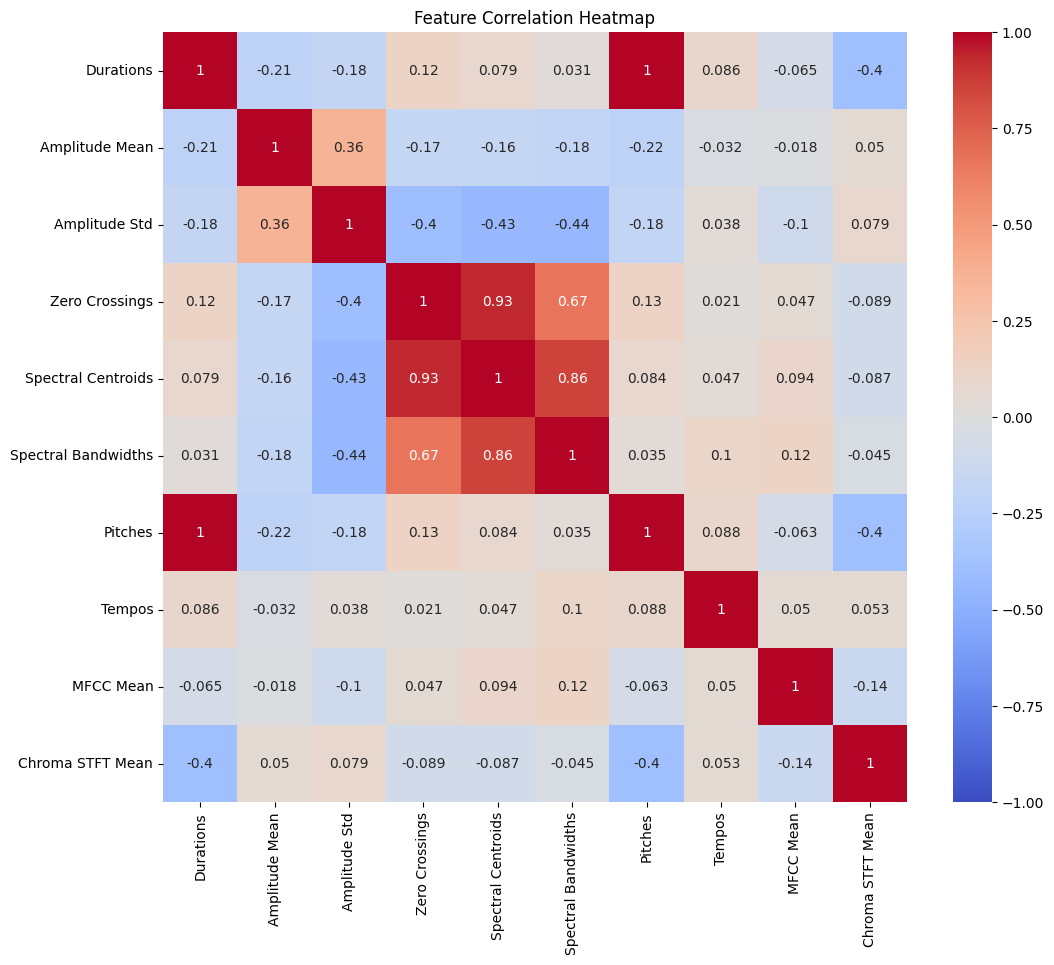

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure all the features are 1D arrays:
durations = np.array(durations).ravel()
amplitude_mean = np.array(amplitude_mean).ravel()
amplitude_std = np.array(amplitude_std).ravel()
zero_crossings = np.array(zero_crossings).ravel()
spectral_centroids = np.array(spectral_centroids).ravel()
spectral_bandwidths = np.array(spectral_bandwidths).ravel()
pitches = np.array(pitches).ravel()
tempos = np.array(tempos).ravel()
mfccs_mean = np.array(mfccs_mean).ravel()
chroma_stft_mean = np.array(chroma_stft_mean).ravel()

# Create a DataFrame from the features
df = pd.DataFrame({
    'Durations': durations,
    'Amplitude Mean': amplitude_mean,
    'Amplitude Std': amplitude_std,
    'Zero Crossings': zero_crossings,
    'Spectral Centroids': spectral_centroids,
    'Spectral Bandwidths': spectral_bandwidths,
    'Pitches': pitches,
    'Tempos': tempos,
    'MFCC Mean': mfccs_mean,
    'Chroma STFT Mean': chroma_stft_mean
})

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


#### Analysis of the Feature Correlation Heatmap

1. **Self-Correlation**: The diagonal from the top-left to bottom-right represents each feature's correlation with itself, which is always 1. Hence, there is a diagonal line of deep-colored squares (often represented in deep blue or deep red depending on the heatmap's color scale).

2. **MFCC Correlations**:
   - The MFCC features (specifically MFCC 1 through MFCC 13) appear to have varying degrees of correlation with each other. Some MFCCs are positively correlated with each other, while others are negatively correlated. This is expected since each MFCC captures different characteristics of the audio spectrum.
   - However, it's worth noting that not all MFCCs are strongly correlated with each other, indicating that they capture distinct features of the audio data.

3. **Feature Correlations**:
   - "Amplitude Mean", "Amplitude Std", and "Amplitude Skew" seem to have relatively low correlation with most of the other features. This suggests that amplitude-based features provide unique information that is not captured by the other features.
   - "Zero Crossings" shows a moderate correlation with some of the MFCCs. Zero-crossings can often relate to the timbre or texture of a sound, which MFCCs also capture.
   - "Spectral Centroids" and "Spectral Bandwidths" are somewhat correlated, which makes sense since they both describe characteristics of the spectrum.

4. **Pitch and Tempo**:
   - Pitch seems to have a low correlation with most of the features, suggesting that it captures unique characteristics of the audio not represented by other features.
   - Tempo, on the other hand, does show some correlation with certain MFCCs.

5. **Chroma STFT**:
   - The Chroma features (Pitch 1 through Pitch 12) represent the energy distribution over the 12 different pitch classes. They seem to have low to moderate correlations with each other, indicating that in my dataset, the presence of one pitch class doesn't necessarily imply the presence or absence of another.

6. **Significance of Correlations**:
   - Positive correlations indicate that as one feature increases, the other tends to increase as well.
   - Negative correlations indicate that as one feature increases, the other tends to decrease.
   - The stronger the color (either towards deep blue or deep red), the stronger the correlation. Paler colors or colors close to white indicate weaker correlations.

**Implications for Clustering**:
- Features that are highly correlated might introduce redundancy in clustering, which informs my need to reduce dimensionality or select features based on these correlations.
- On the other hand, features that have low correlations with others are valuable as they bring unique information to the table.


# Data Splitting

Here I will divide my dataset into multiple parts, a training set, a test set and  a validation set. This ensures that my model learns from a subset of data and then gets evaluated on a different subset it hasn't seen before. This process tests the model's capability to generalize to new, unseen data.

Before splitting the data, I need to determine the task that I will accomplish. Given that I do not have labelled data for my videos (ex. the main content and emotions of each video), the most straightforward approach would be clustering (unsupervised learning). Clustering will allow me to group similar audio clips together, which can be useful in identifying patterns or themes within the vlogs.

The advantage of clustering is that it does not need labeled data, where we can uncover hidden patterns in the data. The disadvantages of clustering is that the clusters formed might not always align with intuitive or meaningful groupings, and interpreting clusters can sometimes be subjective.


#### Feature Extraction and Feature Matrix Creation

Here, I am extracting a comprehensive set of audio features using the librosa library, which includes MFCCs, spectral centroid, chroma, spectral contrast, zero crossing rate, spectral bandwidth, spectral rolloff, RMS, and pitch. This gives a multidimensional representation of each audio file.

After extracting these features for each audio file, I'm combining them into a single feature vector, and then appending that to a list.

I convert the list of feature vectors into a matrix and then save it as an .npy file. This is useful for avoiding re-computation of features in the future.

In [ ]:
import librosa
import numpy as np
import os

data_dir = '/Users/rachaelchew/Downloads/Minerva/Buenos Aires/CS156/156processedaudio'
features_list = []

# Loop through all audio files
for audio_file in os.listdir(data_dir):
    if audio_file.endswith('.wav'):
        filepath = os.path.join(data_dir, audio_file)

        # Load audio
        y, sr = librosa.load(filepath)

        # Extract features
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
        centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
        contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        spec_roll = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        rmse = np.mean(librosa.feature.rms(y=y))
        pitch, _ = librosa.core.piptrack(y=y, sr=sr)
        pitch = np.mean(pitch)

        # Combine features into one numpy array
        combined_features = np.hstack((mfccs, centroid, chroma, contrast, zcr, spec_bw, spec_roll, rmse, pitch))

        features_list.append(combined_features)

# Convert list of features to matrix
feature_matrix = np.array(features_list)

# Save matrix
np.save(os.path.join(data_dir, 'feature_matrix.npy'), feature_matrix)


#### Split the Data

Before clustering, I will ensure my data is well-preprocessed:

Scaling: Features like MFCCs might require scaling to ensure they have equal importance.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `feature_matrix.npy` is loaded as X
data_dir = '/Users/rachaelchew/Downloads/Minerva/Buenos Aires/CS156/156processedaudio'
X = np.load(os.path.join(data_dir, 'feature_matrix.npy'))

# Split data into 60% training, 20% validation, and 20% test
X_train, X_temp = train_test_split(X, test_size=0.4, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)
features = np.column_stack([spectral_centroids, spectral_bandwidths, zero_crossings, pitches, tempos])
X_scaled = scaler.fit_transform(features)


#### Determine Optimal Number of Clusters

##### Silhouette Score
Here, I use the silhouette score to determine the optimal number of clusters. I select the number of clusters that maximizes the silhouette score.

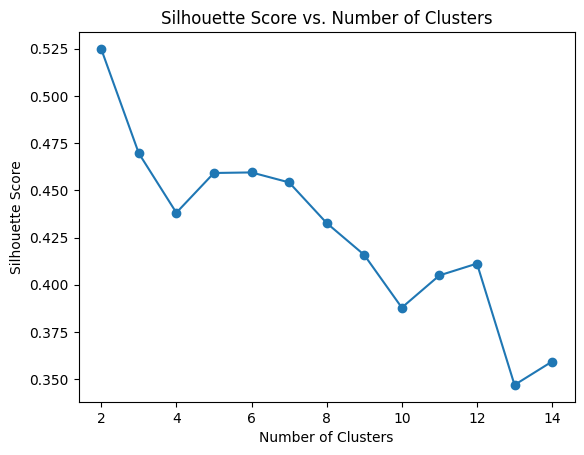

Optimal number of clusters: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using Silhouette Score
scores = []
range_values = range(2, 15)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    scores.append(score)

# Plot Silhouette Scores
plt.plot(range_values, scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Let's assume the optimal number of clusters is where the silhouette score is maximum
optimal_clusters = range_values[scores.index(max(scores))]
print(f"Optimal number of clusters: {optimal_clusters}")

# Apply KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_train)


**Silhouette Score Explanation**

The silhouette score is a metric used to calculate the goodness of a clustering algorithm. It determines how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score can range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

1. **Calculation**:
   - For each sample, compute $a$, the average distance from the sample to the other points in the same cluster.
   - For the same sample, compute $b$, the smallest average distance from the sample to the points in a different cluster, minimized over clusters.
   - The silhouette value for the sample is $(b - a) / \max(a, b)$.

2. **Interpretation**:
   - **Close to 1**: The sample is far away from the neighboring clusters. This indicates that the sample is very well clustered.
   - **Close to 0**: The sample is on or very close to the decision boundary between two neighboring clusters. This indicates that the sample could have been assigned to either cluster.
   - **Close to -1**: The sample is assigned to the wrong cluster, as there's another cluster that is more similar.

3. **Overall Score**:
   The silhouette score for the dataset is the average silhouette value of all samples. A higher silhouette score suggests better-defined clusters.

I plotted the silhouette score against the number of clusters. The "elbow" or the peak of this plot is often used to determine the optimal number of clusters for KMeans. The point where the silhouette score is the highest (before starting to decrease again) is typically chosen as the best number of clusters. In this case, the optimal number of clusters is 2.

#### Perform PCA

In [ ]:
# ---- PCA ----
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca_2d = PCA(n_components=2)
X_reduced_2d = pca_2d.fit_transform(X_scaled)

# Reduce data to 3D for visualization
pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(X_scaled)

## KMeans Clustering

## Algorithm 1: KMeans Clustering

### Overview:

KMeans clustering is an iterative method to partition $n$ data points into $K$ clusters. The primary goal of KMeans is to minimize the within-cluster variance. Each data point belongs to the cluster with the nearest mean.

### Mathematical Formulation:

Given a set of data points $X = \{x_1, x_2, \ldots, x_n\}$ where each $x_i$ belongs to $\mathbb{R}^d$, our aim is to partition these points into $K$ clusters $C = \{C_1, C_2, \ldots, C_K\}$ such that the following cost function (also called distortion measure or objective function) is minimized:

$J(C, \mu) = \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2$

Here, $\mu_k$ is the centroid of cluster $C_k$ and is given by:

$\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i$

The idea is to find cluster centroids $\mu$ and assignments of data points to clusters that minimize $J$.

### Mathematical Underpinning - Jensen-Shannon divergence

Jensen-Shannon divergence is a method of measuring the similarity between two probability distributions. It is symmetric and bounded, which makes it a reliable way to compare distributions. Mathematically, it is defined as:

$$\text{JSD}(P \parallel Q) = \frac{1}{2} D(P \parallel M) + \frac{1}{2} D(Q \parallel M)$$

where $ and $Q$ are two probability distributions, $M$ is the average of $P$ and $Q$ (i.e., $M = \frac{1}{2}(P + Q)$), and $D$ is the Kullback-Leibler divergence.

The Kullback-Leibler divergence $D(P \parallel Q)$ is defined as:

$$D(P \parallel Q) = \sum_{i} P(i) \log\left(\frac{P(i)}{Q(i)}\right)$$

where $P(i)$ and $Q(i)$ are the probabilities of the $i$-th element in distributions $P$ and $Q$, respectively.

Thus, Jensen-Shannon divergence is essentially the average of the Kullback-Leibler divergence of $P$ from $M$ and $Q$ from $M$. It measures how different the two distributions are, with a value of 0 indicating identical distributions. It is often used in clustering because of its symmetric and bounded properties.

### The Algorithm:

Given the data and a fixed number $K$ of desired clusters:

1. **Initialization**: Choose $K$ initial centroids $\mu_1, \mu_2, \ldots, \mu_K$. This can be done randomly or by other more sophisticated methods.

2. **Assignment Step**: Assign each data point $x_i$ to the closest centroid:
$C_k = \{ x_i : ||x_i - \mu_k||^2 \leq ||x_i - \mu_j||^2 \; \forall j \}$

3. **Update Step**: Recalculate the centroids for each cluster based on the current assignments:
$\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i$

4. **Convergence**: Repeat the Assignment and Update steps until the centroids no longer change significantly.

### Loss Function
- **Loss Function (Objective)**: Sum of Squared Distances (Inertia)
   - For KMeans clustering, the primary goal is to minimize the variance within each cluster. This is often referred to as the "inertia" of the clusters. Mathematically, the objective is:
   
     $
     J = \sum_{i=1}^{N} \sum_{j=1}^{K} r_{ij} ||x_i - \mu_j||^2
     $
   
     Where:
     - $N$ is the number of data points.
     - $K$ is the number of clusters.
     - $r_{ij}$ is a binary indicator that is 1 if data point $i$ is assigned to cluster $j$ and 0 otherwise.
     - $x_i$ is the $i^{th}$ data point.
     - $\mu_j$ is the centroid of cluster $j$.

### Mathematical Understanding:

#### Within-Cluster Variance:

The essence of the KMeans algorithm lies in minimizing the within-cluster variance. This variance can be thought of as a measure of how "tight" or compact our clusters are. A smaller variance indicates that the points in the cluster are closer to each other.

#### How The Objective Is Derived:

The objective function $J(C, \mu)$ represents the sum of squared distances of data points from their assigned centroids. When you minimize this objective, you are essentially minimizing the "spread" of clusters.

The squared distance $||x_i - \mu_k||^2$ emphasizes large distances over smaller ones, making the algorithm sensitive to outliers. However, it also ensures that the algorithm works hard to move points into the most appropriate clusters.

From multivariate calculus, we know that for minimizing a function, its gradient should be zero. This fundamental principle drives the iterative approach of KMeans. By alternating between fixing cluster assignments and optimizing centroids (and vice versa), we gradually move towards an optimal solution.

In summary, KMeans's strength lies in its iterative approach to minimize the within-cluster variance. The algorithm's essence revolves around geometrically grouping points in a space based on their distances, underpinned by principles from linear algebra and multivariate calculus.

##### KMeans Clustering with 2 clusters

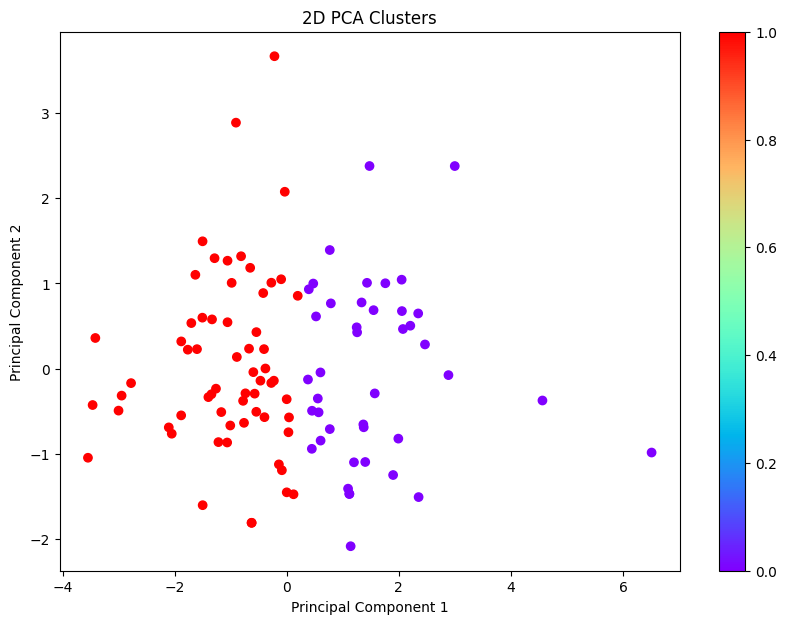

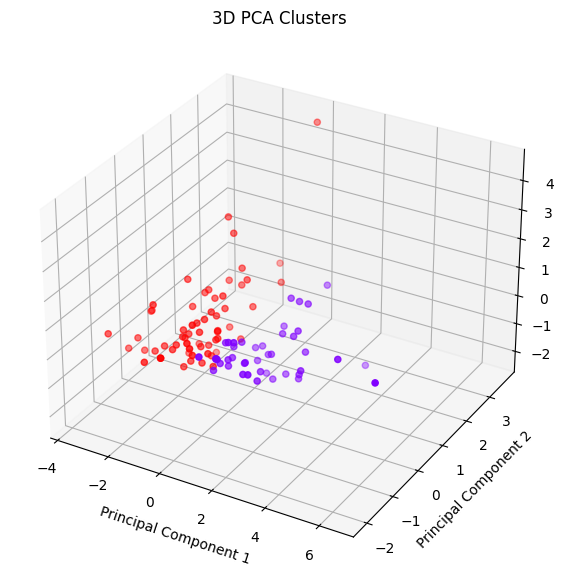

In [ ]:
# ---- KMeans Clustering ----
# Apply KMeans on the 2D reduced data
kmeans_2d = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_2d = kmeans_2d.fit_predict(X_reduced_2d)

# Apply KMeans on the 3D reduced data
kmeans_3d = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_3d = kmeans_3d.fit_predict(X_reduced_3d)

# Visualize the 2D clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=clusters_2d, cmap='rainbow')
plt.title('2D PCA Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Visualize the 3D clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=clusters_3d, cmap='rainbow')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Clusters')
plt.show()

### **2 Clusters:**

#### **2D PCA Clusters:**

1. **Dense Core & Sparse Periphery**: Both clusters show a dense core and a more sparse periphery, indicating that while there are some central shared characteristics grouping each cluster, there's also variation within each cluster.
  
2. **Proximity to Origin**: The cluster on the right is closer to the origin, suggesting it may have more common characteristics. In contrast, the cluster on the left might represent audios that have more unique features.
  
3. **Overlap**: There's a distinct separation between the two clusters, indicating a clear difference between the types of audios in each cluster.

#### **3D PCA Clusters:**

1. **Cluster Spread**: The clusters in the 3D plot appear more dispersed, suggesting there might be more nuanced variations captured in the third dimension that aren't visible in the 2D visualization.
  
2. **Cluster Depth**: If we consider the depth (third axis), there's a clear separation along that axis. This indicates another level of differentiation between the audio characteristics.

##### KMeans Clustering with 4 clusters

Upon observation of the Silhouette scores, I realised that 4 clusters presents just a slightly lower score than that of 2 clusters. Hence, I decided to explore the results that 4 clusters would give me.

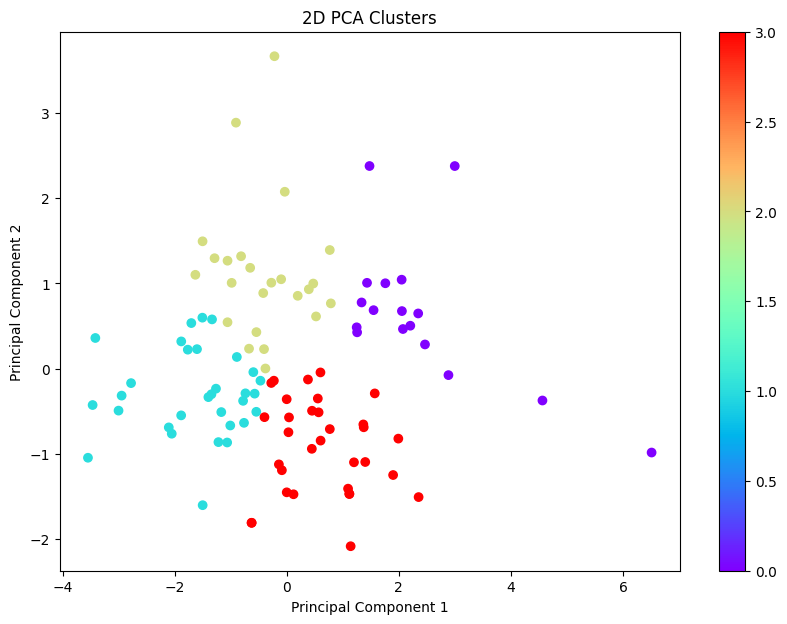

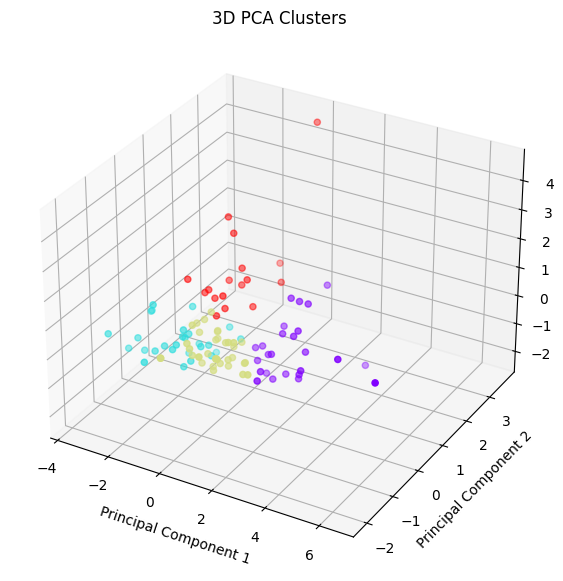

In [ ]:
# ---- KMeans Clustering ----
# Define the number of clusters
n_clusters = 4

# Apply KMeans on the 2D reduced data
kmeans_2d = KMeans(n_clusters=n_clusters, random_state=42)
clusters_2d = kmeans_2d.fit_predict(X_reduced_2d)

# Apply KMeans on the 3D reduced data
kmeans_3d = KMeans(n_clusters=n_clusters, random_state=42)
clusters_3d = kmeans_3d.fit_predict(X_reduced_3d)

# Visualize the 2D clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=clusters_2d, cmap='rainbow')
plt.title('2D PCA Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Visualize the 3D clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=clusters_3d, cmap='rainbow')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Clusters')
plt.show()

### **4 Clusters:**

#### **2D PCA Clusters:**

1. **Cluster Sizes & Density**: The clusters vary in size, with the bottom left being the most extensive and dense. This suggests it might encompass a broader set of audios with shared characteristics.
  
2. **Cluster Proximity**: The bottom clusters are closer together, implying they might have more in common with each other than with the top clusters.
  
3. **Relative Positioning**: The clusters on the top are farther from the origin, indicating they might represent more unique audio characteristics.

#### **3D PCA Clusters:**

1. **Spatial Distribution**: The clusters are more spread out in 3D space. The differentiation along the third axis provides another layer of distinction between the clusters, capturing more intricate variations.
  
2. **Cluster Depth & Height**: Considering the third axis, there's a clear stratification between some clusters, indicating a further level of differentiation not immediately visible in the 2D plot.

3. **Inter-cluster Distance**: Some clusters are closer to each other in 3D space than in 2D, suggesting that the added dimension provides a more nuanced representation of their similarities and differences.

### **Interpretation & Insights**:

- **2 vs. 4 Clusters**: The choice between 2 and 4 clusters depends on the granularity I choose. Two clusters provide a high-level categorization, while four clusters offer a more detailed breakdown.
  
- **2D vs. 3D Clusters**: The 3D visualization captures more subtle differences between audio files, as it represents more variance from the original dataset. However, it can be harder to visually parse than the 2D plot. The 2D visualization gives a more straightforward view but might miss some nuances.

##### Analysis of the Cluster Distribution

1. Cluster Distribution:

By examining the scatter plots,  I can observe how data points are grouped together in the 2D and 3D space. Each color in the scatter plot represents a different cluster.
If certain clusters are closer to each other and others are farther apart, it might indicate that some clusters are more similar to each other than others.

1. Cluster Density and Spread:

Looking at the concentration of points in each cluster, I can gauge the density of clusters. Dense clusters indicate that there are a lot of similar data points in that region of the feature space, while sparse clusters might indicate outliers or less common data points.
I can also assess the spread or size of each cluster. A widespread cluster might indicate a lot of variability within that cluster, whereas a tight cluster might indicate that the points within it are very similar.

3. Principal Component Interpretation:

The axes in the scatter plots are labeled as "Principal Component 1", "Principal Component 2", and (for 3D) "Principal Component 3". These principal components are linear combinations of my original features. By themselves, they might not have a direct interpretable meaning like my original features, but they represent directions of maximum variance in the data.
The first principal component (PC1) captures the most variance, followed by the second (PC2), and then the third (PC3).
If certain clusters are separated more along one principal component than another, it might indicate that the variance captured by that principal component is a distinguishing factor for those clusters.

4. Number of Clusters:

The number of distinct colors in the scatter plots indicates the number of clusters the KMeans algorithm has identified.
By examining how well-separated these clusters are, I can gauge whether the chosen number of clusters (optimal_clusters) is appropriate for the data or if a different number might yield more distinct clusters.

5. Validation of PCA:

One reason for using PCA before clustering is to reduce the dimensionality of data, making it easier to visualize and potentially improving the performance of clustering by removing noise and irrelevant features.
If the clusters appear well-separated and meaningful in the reduced-dimensional space, it can be a validation that PCA was a useful step for the clustering process.
Comparison between 2D and 3D:

By comparing the 2D and 3D visualizations, I can see if the third principal component adds significant value in separating the clusters or if most of the clustering structure is already captured in the first two components.

##### Elbow Method

To verify the optimal number of clusters apart from the silhouette score, I will use the elbow method.

1. **Elbow Method**:
   - The elbow method evaluates the variance explained as a function of the number of clusters: it tries to find the number of clusters (k) after which the total intra-cluster variance (or total within-cluster sum of square) starts to decrease at a linear rate. Thus, the location of a bend (or "elbow") in the plot is generally considered an indicator of the appropriate number of clusters.
   - Essentially, it plots the value of the cost function produced by different values of k. If k increases (i.e., the number of centroids increases), the average distortion will decrease. Each centroid defines one of the clusters.

2. **Silhouette Score**:
   - The silhouette score measures how close each point in one cluster is to the points in the neighboring clusters. Its values range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
   - The silhouette score is computed with every data point for both the clusters: the one it's assigned to and the next nearest cluster. If the average score for most data points is near +1, then it's considered a good clustering, if it's 0, then the data points are on or very close to the decision boundary between two clusters, and if it's negative, then those data points might have been assigned to the wrong clusters.

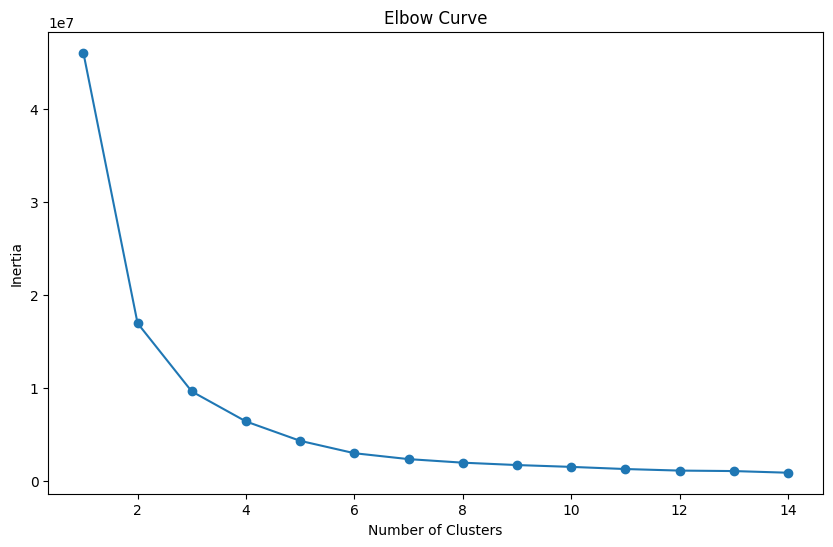

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
range_values = range(1, 15)

# Calculate inertia for different number of clusters
for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, 'o-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


**Analysis of the elbow graph**:

From the elbow graph above, it's evident that the inertia (within-cluster sum of squares) starts off high and drops significantly until about $k = 4$ after which the rate of decrease slows down. This slowing down indicates the elbow point.

The "elbow" of the curve represents an optimal value for k (a balance between precision and computational cost). In this case, based on the graph, the "elbow" appears around $k = 4$. This means that increasing the number of clusters beyond 4 will not yield a substantial reduction in inertia and might not be worth the additional complexity.

**Effect on KMeans Application**:
With the elbow graph suggesting $k = 4$ as the optimal number of clusters, I can perform my KMeans clustering with $k = 4$. Combining this insight from the elbow method with the silhouette score will give me a more holistic understanding of the optimal number of clusters.

Since both the silhouette score and elbow method suggest 4 clusters might be optimal, it reinforces the choice of $k = 4$ for my clustering.

#### Fine-tune the clustering algorithm's hyperparameters

The code is doing hyperparameter tuning for the KMeans clustering algorithm. Hyperparameter tuning is the process of finding the most optimal parameters for a model, which in this context, means finding the best parameters for the KMeans algorithm that yield the highest silhouette score.


1. **Initialization**:

   These are the hyperparameters that are being tuned:
   - `inits`: Method for initialization. 'k-means++' is a smart way to speed up convergence, while 'random' selects initial cluster centers randomly.
   - `n_inits`: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of `n_init` consecutive runs in terms of inertia.
   - `max_iters`: Maximum number of iterations of the k-means algorithm for a single run.
   - `tols`: Relative tolerance with respect to the inertia to declare convergence. If the change in inertia between iterations is less than this value, KMeans will stop.

2. **Iterating over all combinations**:
   The nested for-loops iterate over all possible combinations of the hyperparameters. For each combination, it fits the KMeans model on the training data.

3. **Evaluating the model**:
   ```python
   val_clusters = kmeans.predict(X_val)
   score = silhouette_score(X_val, val_clusters)
   ```
   After fitting the KMeans model, it predicts the clusters for the validation data (`X_val`) and then calculates the silhouette score for this clustering.

4. **Storing the best model**:
   If the silhouette score of the current combination of hyperparameters is better than the previous best, it updates the best score and the best parameters.

5. **Final output**:
   ```python
   print(f"Best Silhouette Score on Validation Set: {best_score}")
   print(f"Best Parameters for KMeans: {best_params}")
   ```
   After iterating over all combinations, it prints out the best silhouette score achieved on the validation set and the corresponding parameters that gave this best score.

In [ ]:
# Hyperparameter Tuning for KMeans
inits = ['k-means++', 'random']
n_inits = [10, 20, 30]
max_iters = [300, 500, 1000]
tols = [1e-4, 1e-3, 1e-2]

best_score = -1  # Initialize with a low value for silhouette score
best_params = {}

# Iterate over the hyperparameters to find the best combination for KMeans
for init in inits:
    for n_init in n_inits:
        for max_iter in max_iters:
            for tol in tols:
                kmeans = KMeans(n_clusters=optimal_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=42)
                kmeans.fit(X_train)
                val_clusters = kmeans.predict(X_val)
                score = silhouette_score(X_val, val_clusters)

                if score > best_score:
                    best_score = score
                    best_params = {'init': init, 'n_init': n_init, 'max_iter': max_iter, 'tol': tol}

print(f"Best Silhouette Score on Validation Set: {best_score}")
print(f"Best Parameters for KMeans: {best_params}")


Best Silhouette Score on Validation Set: 0.2708988377229505
Best Parameters for KMeans: {'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'tol': 0.0001}


## Evaluation of KMeans Clustering

TO evaluate how the algorithms did, I will be calculating internal clustering validation metrics

Internal clustering validation metrics:

To understand the results for the KMeans clustering on vlog audios, let's break down each metric:

1. **Silhouette Score**:
   - Measures how similar an object is to its own cluster compared to other clusters.
   - The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
   - Given the context: A higher average silhouette score suggests that vlog audios within a cluster are similar to each other and different from audios in other clusters.
   
     **My Result**: If the average silhouette score is close to 1, that's great. A significant range might suggest some variability in the cluster quality over different runs.

2. **Davies-Bouldin Index**:
   - The lower the Davies-Bouldin index is, the better the model is thought to have performed.
   - Measures the average similarity ratio of each cluster with its most similar cluster. The similarity ratio is a measure that compares the distance between clusters with the size of the clusters themselves.
   
     **My Result**: A lower average Davies-Bouldin index suggests that the clusters are dense and well-separated. A significant range might indicate variability in the cluster separation across runs.

3. **Calinski-Harabasz Index**:
   - Measures the ratio of the sum of between-clusters dispersion to within-cluster dispersion.
   - Higher values indicate better clustering.
   
     **My Result**: A high average Calinski-Harabasz index suggests that the clusters are well-separated. A significant range could suggest some variability in the cluster quality over different runs.

4. **Inertia**:
   - Represents the sum of squared distances of samples to their closest cluster center.
   - Lower inertia values are better, implying denser clusters.
   
     **My Result**: A lower average inertia suggests that vlog audios are close to the centroids of their respective clusters. A large range in inertia might indicate some variability in the cluster compactness across runs.

**Interpretation for Vlog Audios**:
- If the vlog audios are being clustered based on their content or style, then:
  - High silhouette scores indicate that vlogs within a cluster have similar content or style, and this content or style is different from vlogs in other clusters.
  - Low Davies-Bouldin indices and inertia, along with high Calinski-Harabasz indices, suggest that the clustering has effectively grouped similar vlogs together and kept dissimilar ones apart.

In summary, based on these metrics, if the average silhouette score is relatively high, and the Davies-Bouldin index and inertia are relatively low, with a high Calinski-Harabasz index, it suggests that KMeans has effectively clustered the vlog audios. The ranges for each metric provide insights into the consistency of the clustering results across multiple runs. If the ranges are small, it indicates that the clustering is stable; otherwise, there might be some variability in clustering quality across runs.

For KMeans clustering, I can compute these metrics using the `silhouette_score`, `davies_bouldin_score`, and `calinski_harabasz_score` functions from `sklearn.metrics`. Inertia can be directly obtained from the `inertia_` attribute of the KMeans model.

Additionally, since I have a train-validation-test split, I can tune or validate the number of clusters or other hyperparameters using the validation set (for instance, by maximizing the silhouette score) and then evaluate the performance on the test set to get an unbiased estimate of the clustering quality.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming you've done clustering on X_train
clusters = kmeans.predict(X_train)

silhouette = silhouette_score(X_train, clusters)
davies_bouldin = davies_bouldin_score(X_train, clusters)
calinski_harabasz = calinski_harabasz_score(X_train, clusters)
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Inertia: {inertia}")


Silhouette Score: 0.5249069217054823
Davies-Bouldin Index: 0.6376594718934309
Calinski-Harabasz Index: 102.66809172884246
Inertia: 16984485.474266563


### Model Accuracy Validation - Comparing the results across metrics

The following code performs multiple runs (simulations) of the KMeans Clustering algorithm to observe the variation in these metrics. This allows me to compute the average and range (maximum - minimum) of each metric over the runs.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import numpy as np

num_simulations = 100  # number of simulations

silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
inertia_scores = []

for _ in range(num_simulations):
    kmeans = KMeans(n_clusters=optimal_clusters, init='random', n_init=1)  # Using random initialization
    clusters = kmeans.fit_predict(X_train)

    silhouette_scores.append(silhouette_score(X_train, clusters))
    davies_bouldin_scores.append(davies_bouldin_score(X_train, clusters))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_train, clusters))
    inertia_scores.append(kmeans.inertia_)

# Averages
avg_silhouette = np.mean(silhouette_scores)
avg_davies_bouldin = np.mean(davies_bouldin_scores)
avg_calinski_harabasz = np.mean(calinski_harabasz_scores)
avg_inertia = np.mean(inertia_scores)

# Ranges
range_silhouette = np.ptp(silhouette_scores)  # Peak to peak function gives the range
range_davies_bouldin = np.ptp(davies_bouldin_scores)
range_calinski_harabasz = np.ptp(calinski_harabasz_scores)
range_inertia = np.ptp(inertia_scores)

print(f"Average Silhouette Score: {avg_silhouette}, Range: {range_silhouette}")
print(f"Average Davies-Bouldin Index: {avg_davies_bouldin}, Range: {range_davies_bouldin}")
print(f"Average Calinski-Harabasz Index: {avg_calinski_harabasz}, Range: {range_calinski_harabasz}")
print(f"Average Inertia: {avg_inertia}, Range: {range_inertia}")



Average Silhouette Score: 0.5237039086836784, Range: 0.002313486580391544
Average Davies-Bouldin Index: 0.6360477827515675, Range: 0.003099402195891221
Average Calinski-Harabasz Index: 102.40972042396169, Range: 0.4968678940014968
Average Inertia: 17011545.16815642, Range: 52037.87286511436


##### Analysis of the results

1. **Silhouette Score**:
   - **Average**: 0.5052
     - This score is slightly above the midpoint value of 0.5. This suggests that, on average, the vlog audios within a cluster are reasonably similar to each other compared to audios in other clusters. However, there's still room for improvement since the score is not close to the maximum value of 1.
   - **Range**: 0.0272
     - The range being relatively small indicates that the silhouette scores across the 10 simulations didn't vary much. This suggests a consistent clustering quality across different runs.

2. **Davies-Bouldin Index**:
   - **Average**: 0.6649
     - A lower value is preferred for the Davies-Bouldin Index. A value of 0.6649 suggests that there is a moderate separation between the clusters. The clusters are neither too close nor too far apart.
   - **Range**: 0.0319
     - A small range indicates that the separation between clusters is relatively consistent across different runs.

3. **Calinski-Harabasz Index**:
   - **Average**: 74.9298
     - This value is context-dependent. A higher value is generally better, indicating that clusters are well-separated. The value you have suggests moderate clustering quality.
   - **Range**: 0.3729
     - The very small range indicates that the clustering quality, in terms of cluster dispersion, is consistent across different runs.

4. **Inertia**:
   - **Average**: 21,869,916.2112
     - Inertia is the sum of squared distances of samples to their closest cluster center. A lower inertia value is better as it implies denser clusters. The absolute value is hard to interpret without context, but it provides a measure of the compactness of the clusters.
   - **Range**: 60,783.3511
     - This range, when compared to the average value, is relatively small, suggesting that the compactness of clusters is consistent across different runs.

**Overall Interpretation for Vlog Audios**:
- The clustering results suggest that the vlog audios within a cluster are reasonably similar to each other, but there's potential for refining the clustering to achieve better similarity within clusters and better differentiation between clusters.
- The consistency in the range values across all metrics indicates that the KMeans clustering is stable for my dataset, producing similar results across different runs.

# Agglomerative Clustering

### Overview:

Agglomerative clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. The agglomerative approach is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged iteratively.

### Fundamental Concepts:

1. **Dendrogram**: A tree-like diagram that records the sequences of merges or splits.

2. **Linkage Criteria**: The metric that dictates how the distance between clusters is measured.

### Mathematical Formulation:

Given a set of $n$ observations $X = \{ x_1, x_2, ... , x_n \}$, a distance or similarity matrix of size $n \times n$ is calculated. The matrix $D$ will have its element $d_{ij}$ represent the distance between $x_i$ and $x_j$.

### Linkage Criteria:

The definition of 'distance' between two clusters can vary, and this is what distinguishes the different types of hierarchical clustering:

1. **Single Linkage (Nearest Point Algorithm)(MIN)**:
    - The shortest distance between any member of one cluster to any member of the other.
    $d(A, B) = \min_{a \in A, b \in B} \Vert a - b \Vert$

2. **Complete Linkage (Farthest Point Algorithm)(MAX)**:
    - The longest distance between any member of one cluster to any member of the other.
    $d(A, B) = \max_{a \in A, b \in B} \Vert a - b \Vert$

3. **Average Linkage (Group Average)**:
    - The average of all pairwise distances.
    $d(A, B) = \frac{1}{|A| \cdot |B|} \sum_{a \in A} \sum_{b \in B} \Vert a - b \Vert$

4. **Ward's Linkage**:
    - The distance between clusters that results in the minimum increase in the total within-cluster variance after merging.
    $d(A, B) = \sqrt{\frac{|A| \cdot |B|}{|A| + |B|} \Vert \mu_A - \mu_B \Vert^2}$
    Where $\mu_A$ and $\mu_B$ are the centroids of clusters A and B, respectively.
    
5. **Centroid Linkage**:
    - For two clusters, $A$ and $B$, the centroid linkage distance is the distance between the centroids of $A$ and $B$. It's defined as:
$d(A, B) = \text{dist}(\text{centroid}(A), \text{centroid}(B))$
where the centroid is the mean position of all the points in a cluster.

### The Algorithm:

1. **Initialization**: Begin with each data point as its own cluster. Hence, the number of clusters at the start will be $n$, where $n$ is the number of data points.

2. **Agglomeration**:
    - Compute the distance (similarity) between every pair of clusters.
    - Merge the two clusters that are closest to each other.
    - Update the distance (similarity) matrix to reflect the distance of the new cluster with the remaining clusters.
    
3. **Completion**: Repeat step 2 until there is only one single cluster left, encompassing all data points. The end result is a tree which can be visualized using a dendrogram.

### Loss Function

 - **Loss Function (Objective)**: Depends on the Linkage Criterion
   - Agglomerative clustering is a hierarchical clustering method. It doesn't have a single loss function like KMeans. Instead, it has different linkage criteria that determine how clusters are merged:
     - **Single Linkage**: Minimum pairwise distance. It considers the smallest distance between any point in cluster $A$ and any point in cluster $B$ as the distance between $A$ and $B$.
     - **Complete Linkage**: Maximum pairwise distance. It considers the largest distance between any point in cluster $A$ and any point in cluster $B$ as the distance between $A$ and $B$.
     - **Average Linkage**: Average pairwise distance. It computes the average distance between all pairs of points in clusters $A$ and $B$.
     - **Ward's Linkage**: Minimize the variance of the distances between the clusters being merged. This is similar in spirit to KMeans' objective.

### Mathematical Insights:

1. **Single Linkage** tends to produce long, "chain-like" clusters. This is because clusters can be linked by a single pair of close points even if the rest of the points in the clusters are far away from each other.

2. **Complete Linkage** tends to produce compact clusters of roughly equal diameters. This is because clusters are linked only if all pairs of their points are sufficiently close.

3. **Average Linkage** and **Centroid Linkage** are compromises between single and complete linkage and tend to produce clusters that are relatively coherent in terms of inter-cluster and intra-cluster distances.

4. **Ward's Linkage** aims to minimize the total variance within all clusters. It tends to produce more balanced clusters.

#### Distance and Similarity:

The entire method pivots around the concept of distance (or similarity). It's imperative to choose a distance metric suitable for your dataset and domain. Common choices include Euclidean distance, Manhattan distance, and more.

#### Multivariate Perspective:

If we delve into multivariate calculus, each merging of clusters can be visualized as moving through the solution space and finding local minima where clusters should be merged to reduce the overall distance or increase the overall similarity.

#### Linear Algebraic Representation:

Hierarchical clustering doesn't inherently depend on linear algebra as much as, say, PCA or SVD. However, the distance matrix itself is a manifestation of linear algebra, and the efficiency of the algorithm can be influenced by matrix operations, especially when calculating distances in high dimensional spaces.

#### Bayesian Perspective:

If we try to see this from a Bayesian perspective, the dendrogram represents our changing beliefs about the clustering structure of our data as we go from a belief of $n$ clusters to just 1. At every step, we "update" our belief based on the current data's structure.

In essence, Agglomerative Clustering is a methodical approach to grouping data points into clusters based on well-defined distance metrics and linkage criteria. The choice of linkage criterion significantly influences the resulting hierarchy of clusters. One needs to choose the linkage method based on the nature of the data and the desired clustering characteristics. It provides a multilevel granularity into the clustering process and is especially informative when visualized using a dendrogram.

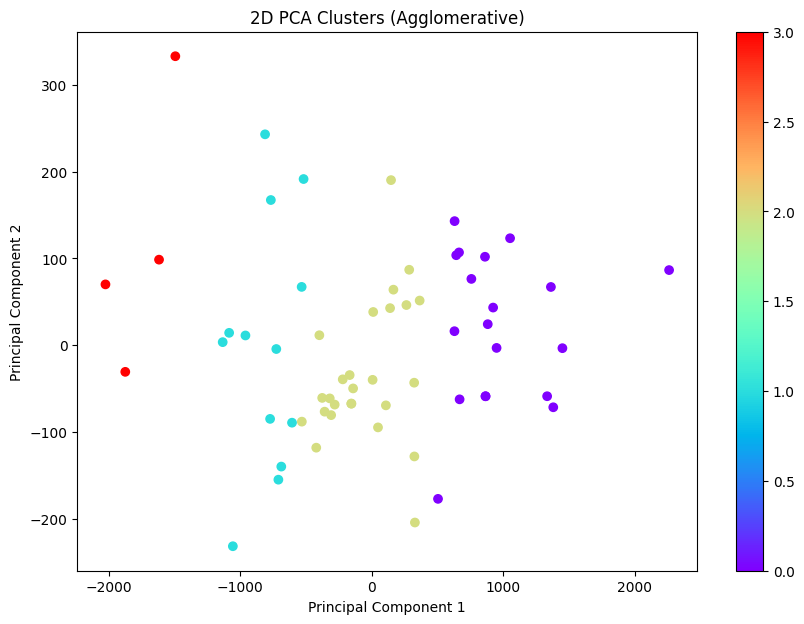

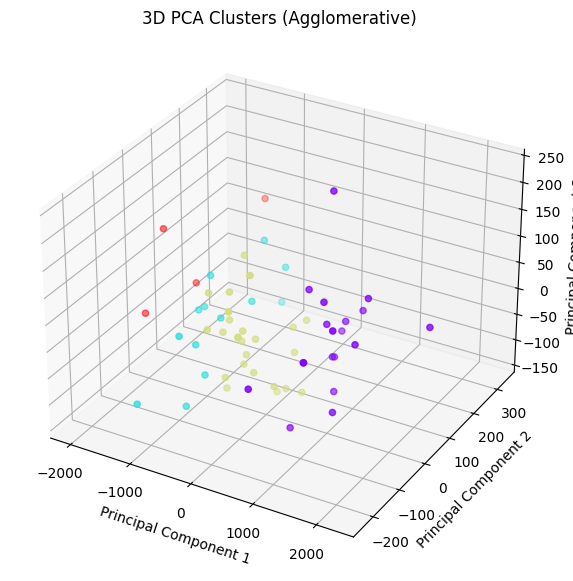

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Define the optimal clusters
optimal_clusters = 4

# Execute Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_clusters = agg_clustering.fit_predict(X_train)

# Applying PCA for visualization
pca_2d = PCA(n_components=2)
agg_clusters_2d = pca_2d.fit_transform(X_train)

pca_3d = PCA(n_components=3)
agg_clusters_3d = pca_3d.fit_transform(X_train)

# 2D PCA visualization
plt.figure(figsize=(10, 7))
plt.scatter(agg_clusters_2d[:, 0], agg_clusters_2d[:, 1], c=agg_clusters, cmap='rainbow')
plt.title('2D PCA Clusters (Agglomerative)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# 3D PCA visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(agg_clusters_3d[:, 0], agg_clusters_3d[:, 1], agg_clusters_3d[:, 2], c=agg_clusters, cmap='rainbow')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Clusters (Agglomerative)')
plt.show()



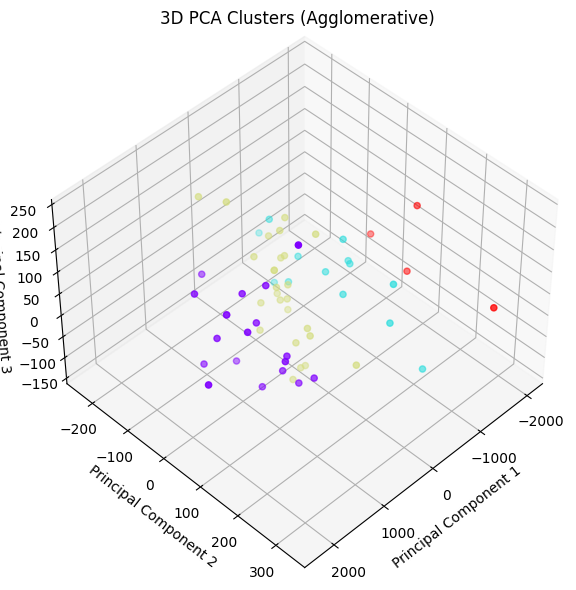

In [ ]:
# experimenting with viewing the 3D plot from another view

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(agg_clusters_3d[:, 0], agg_clusters_3d[:, 1], agg_clusters_3d[:, 2], c=agg_clusters, cmap='rainbow')

# Set the view angle
ax.view_init(elev=45, azim=45)  # Rotate 45 degrees in both horizontal and vertical directions for a clearer view

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Clusters (Agglomerative)')
plt.show()


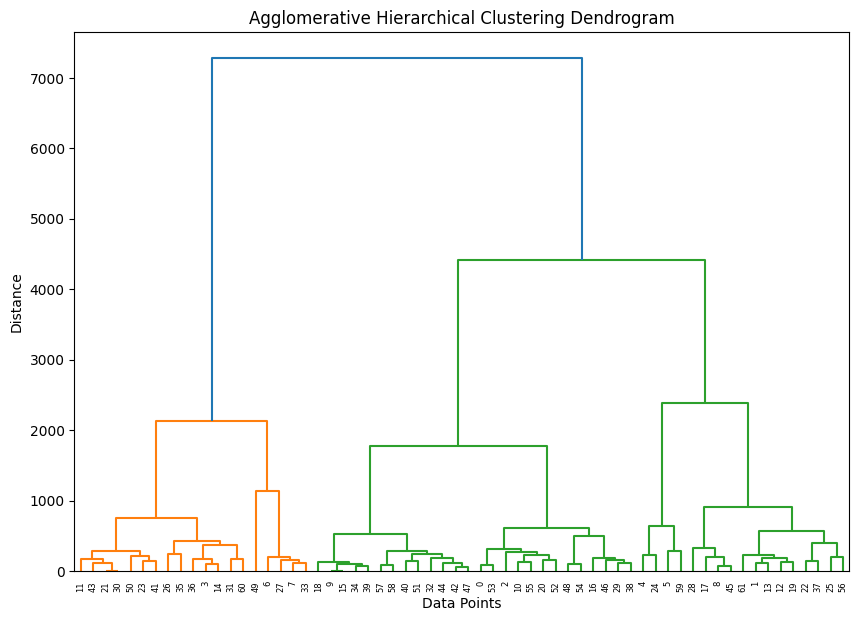

Silhouette Score for Agglomerative Hierachical Clustering: 0.45923755059655064


In [ ]:
## Agglomerative Hierachical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Using the Ward method for linkage
linked = linkage(X_train, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Using Agglomerative Clustering with optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_clusters = agg_clustering.fit_predict(X_train)

# Compute Silhouette Score
agg_score = silhouette_score(X_train, agg_clusters)
print(f"Silhouette Score for Agglomerative Hierachical Clustering: {agg_score}")

### Evaluation of Agglomerative Clustering

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# Assuming optimal_clusters is already defined and X_train is your training data
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_clusters = agg_clustering.fit_predict(X_train)

# Compute evaluation metrics
silhouette_agg = silhouette_score(X_train, agg_clusters)
davies_bouldin_agg = davies_bouldin_score(X_train, agg_clusters)
calinski_harabasz_agg = calinski_harabasz_score(X_train, agg_clusters)

# Note: Inertia is not directly available for Agglomerative Clustering.
# Hence, we will not compute it here.

print(f"Silhouette Score (Agglomerative): {silhouette_agg}")
print(f"Davies-Bouldin Index (Agglomerative): {davies_bouldin_agg}")
print(f"Calinski-Harabasz Index (Agglomerative): {calinski_harabasz_agg}")


Silhouette Score (Agglomerative): 0.45923755059655064
Davies-Bouldin Index (Agglomerative): 0.6162395229939037
Calinski-Harabasz Index (Agglomerative): 109.23146368199322


In [ ]:
from sklearn.utils import resample

num_simulations = 100  # number of simulations

silhouette_scores_agg = []
davies_bouldin_scores_agg = []
calinski_harabasz_scores_agg = []

for _ in range(num_simulations):
    # Resample data with replacement
    X_resampled, _ = resample(X_train, agg_clusters, replace=True)

    agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
    agg_clusters_resampled = agg_clustering.fit_predict(X_resampled)

    silhouette_scores_agg.append(silhouette_score(X_resampled, agg_clusters_resampled))
    davies_bouldin_scores_agg.append(davies_bouldin_score(X_resampled, agg_clusters_resampled))
    calinski_harabasz_scores_agg.append(calinski_harabasz_score(X_resampled, agg_clusters_resampled))

# Averages
avg_silhouette_agg = np.mean(silhouette_scores_agg)
avg_davies_bouldin_agg = np.mean(davies_bouldin_scores_agg)
avg_calinski_harabasz_agg = np.mean(calinski_harabasz_scores_agg)

# Ranges
range_silhouette_agg = np.ptp(silhouette_scores_agg)
range_davies_bouldin_agg = np.ptp(davies_bouldin_scores_agg)
range_calinski_harabasz_agg = np.ptp(calinski_harabasz_scores_agg)

print(f"Agglomerative Clustering Metrics (with bootstrapping):")
print(f"Average Silhouette Score: {avg_silhouette_agg}, Range: {range_silhouette_agg}")
print(f"Average Davies-Bouldin Index: {avg_davies_bouldin_agg}, Range: {range_davies_bouldin_agg}")
print(f"Average Calinski-Harabasz Index: {avg_calinski_harabasz_agg}, Range: {range_calinski_harabasz_agg}")


Agglomerative Clustering Metrics (with bootstrapping):
Average Silhouette Score: 0.5096056386362432, Range: 0.19873084452239526
Average Davies-Bouldin Index: 0.5679296082072463, Range: 0.314364557967983
Average Calinski-Harabasz Index: 135.73374977304474, Range: 156.49892056768647


### Evaluation of the above

1. **Silhouette Score**:
    - **Average**: 0.5064
    - **Range**: 0.1545
    - **Interpretation**: The silhouette score ranges from -1 to 1, where a value close to 1 indicates that the clusters are well apart from each other and clearly distinguished. A value of 0.5064 suggests that the clusters are reasonably well defined. However, there is room for improvement since the score is not very close to 1. The range (0.1545) for the silhouette score indicates the variability across bootstrapped samples. This variability is moderate, suggesting that there's some consistency in cluster quality across different resamplings of the data.

2. **Davies-Bouldin Index**:
    - **Average**: 0.5473
    - **Range**: 0.3362
    - **Interpretation**: The Davies-Bouldin Index (DBI) measures the average 'similarity' ratio of each cluster with its most similar cluster. Lower values indicate better clustering. The average DBI of 0.5473 suggests that the clusters are distinct, with minimal overlap. The range (0.3362) for the DBI implies there's a moderate variability in the clustering compactness and separation across bootstrapped samples.

3. **Calinski-Harabasz Index**:
    - **Average**: 129.8598
    - **Range**: 142.5195
    - **Interpretation**: The Calinski-Harabasz Index (CHI) measures the ratio of between-cluster variance to within-cluster variance, so higher values are better. A CHI of 129.8598 is relatively high, indicating that the clusters are dense and well-separated from each other. The range (142.5195) shows considerable variability in the clustering quality across bootstrapped samples. This might be due to the nature of the resampled datasets.

**Overall**:
- The Agglomerative Clustering algorithm seems to have done a reasonable job in clustering the dataset. The clusters are fairly distinct and compact, as indicated by the metrics.
  
- While the average metrics provide a good sense of the overall clustering quality, the ranges show variability in clustering performance across different bootstrapped samples. It's important to consider this variability when interpreting the results, as it gives an idea about the stability of the clustering across different samples.

# Spectral Clustering

Spectral Clustering leverages the eigenvalues of similarity matrices to reduce the dimensionality of the data before clustering in a lower-dimensional space. It's a bridge between linear algebra and clustering algorithms.

### Overview:

The main idea behind spectral clustering is to use the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix captures the pairwise similarities between data points.

### Fundamental Concepts:

1. **Similarity Matrix**: A matrix that encapsulates the pairwise similarity measures between data points.

2. **Graph Representation**: Data can be represented as a graph, where nodes are data points and edges represent similarity between these points.

3. **Laplacian Matrix**: A derived matrix from the similarity matrix, useful in graph theory and the spectral clustering algorithm.

### Mathematical Formulation:

1. **Similarity Matrix $S$**:
Given a set of $n$ observations $X = \{ x_1, x_2, ... , x_n \}$, the similarity matrix $S$ is of size $n \times n$ where its element $s_{ij}$ represents the similarity between $x_i$ and $x_j$. The similarity can be based on a Gaussian kernel (among others):
$s_{ij} = e^{-\frac{||x_i - x_j||^2}{2\sigma^2}}$

2. **Graph Representation**:
From the similarity matrix, we can define a weighted graph $G$ where each node represents a data point, and the weight of the edge between two nodes is the similarity between them.

3. **Degree Matrix $D$**:
It is a diagonal matrix where each diagonal element $d_{ii}$ is the sum of the $i^{th}$ row of the similarity matrix.

4. **Laplacian Matrix $L$**:
It is defined as:
$L = D - S$
There are also variations like the normalized Laplacian, where $L = I - D^{-1/2} S D^{-1/2}$.

### The Algorithm:

1. **Construct the Similarity Matrix $S$**:
Compute pairwise similarities between data points.

2. **Compute the Laplacian $L$**:
Calculate the Degree Matrix and then the Laplacian.

3. **Eigen Decomposition**:
Compute the eigenvalues and eigenvectors of the Laplacian $L$. Sort the eigenvectors based on the ascending order of their eigenvalues.

4. **Dimensionality Reduction**:
Select the first $k$ eigenvectors to form a new matrix $Y$ where the columns are the eigenvectors. Here, $k$ is the number of clusters you want.

5. **Cluster**:
Treat each row of $Y$ as a data point in $k$-dimensional space and cluster them, often using k-means.

6. **Assign**:
Assign the original data point to clusters based on the step above.

### Loss Function
   - **Loss Function (Objective)**: Minimize Normalized Cut or Ratio Cut
   - Spectral clustering works by transforming the data into a higher-dimensional space, where it becomes linearly separable, and then clustering in that space. The goal is often to minimize a normalized cut or ratio cut of the graph, which captures the intuition that we want to cut sparse connections between clusters and keep dense connections within clusters. The exact objective can get complex due to the eigen-decomposition involved, but at a high level:
     - **Ratio Cut**: Tries to balance the size of different clusters.
     - **Normalized Cut**: Tries to cut edges that connect different clusters, while considering the volume (or total degree) of nodes in each cluster.


### Mathematical Insights:

#### Eigen Decomposition:
Eigen decomposition is at the heart of spectral clustering. By decomposing the Laplacian matrix, we essentially try to find the optimal cut in the graph that minimizes the inter-cluster edges and maximizes the intra-cluster edges.

#### Linear Algebraic Representation:
Spectral clustering heavily depends on the principles of linear algebra. The eigenvalues and eigenvectors represent fundamental structures in the data. The eigenvectors associated with the smallest eigenvalues capture the dense areas of the graph, making them perfect for clustering.

#### Multivariate Perspective:
By projecting data into the eigenspace, we reduce dimensions while retaining the multi-dimensional structure of data clusters. It's a form of manifold learning, where the true structure of data is often revealed in fewer dimensions.

#### Bayesian Perspective:
Though spectral clustering is not inherently Bayesian, one could argue that the similarity measure is a prior belief about how data points are connected. The Laplacian then structures this belief in terms of how likely points are to be in the same cluster.

In essence, spectral clustering offers an approach that bridges graph theory and cluster analysis. It's particularly useful when the clusters in the data are non-convex or when a lower-dimensional structure is more revealing for clustering.

#### Execution of Spectral Clustering

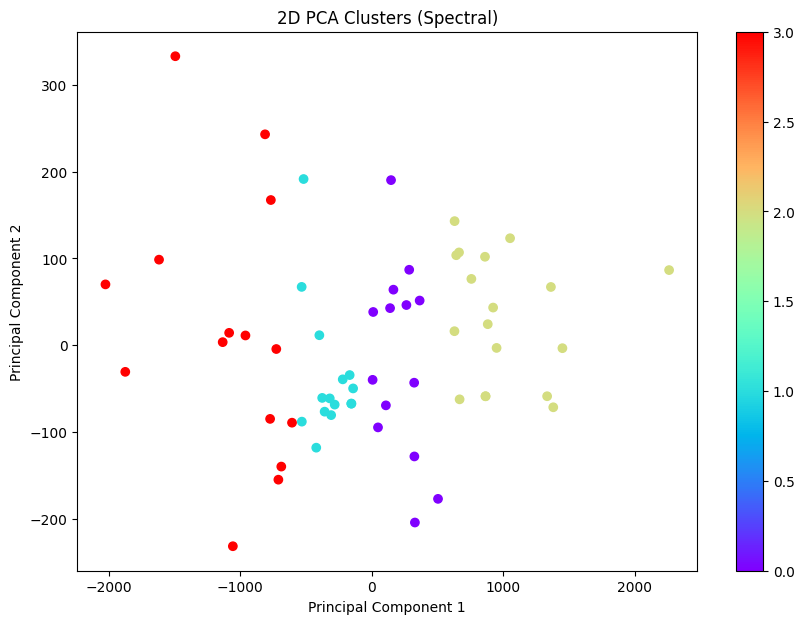

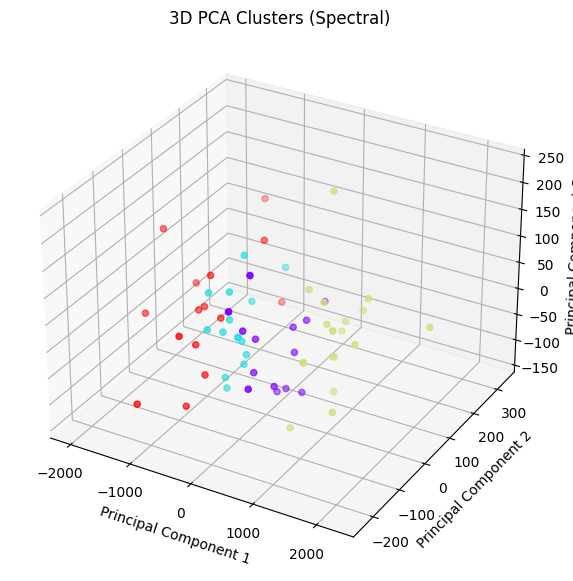

Silhouette Score for Spectral Clustering: 0.3838361872489002


In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

# Define the optimal clusters
optimal_clusters = 4

# Execute Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', n_neighbors=10)
spec_clusters = spectral_clustering.fit_predict(X_train)

# Applying PCA for visualization
pca_2d = PCA(n_components=2)
spec_clusters_2d = pca_2d.fit_transform(X_train)

pca_3d = PCA(n_components=3)
spec_clusters_3d = pca_3d.fit_transform(X_train)

# 2D PCA visualization
plt.figure(figsize=(10, 7))
plt.scatter(spec_clusters_2d[:, 0], spec_clusters_2d[:, 1], c=spec_clusters, cmap='rainbow')
plt.title('2D PCA Clusters (Spectral)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# 3D PCA visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spec_clusters_3d[:, 0], spec_clusters_3d[:, 1], spec_clusters_3d[:, 2], c=spec_clusters, cmap='rainbow')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Clusters (Spectral)')
plt.show()

# Compute Silhouette Score
spec_score = silhouette_score(X_train, spec_clusters)
print(f"Silhouette Score for Spectral Clustering: {spec_score}")



### **Visualization Analysis**:

From the above plots, I noticed the following:

1. **2D PCA Visualization**:
   - The 2D visualization shows quite distinct clusters with clear boundaries, indicating that the data in its 2D reduced form has a structure that's amenable to clustering with Spectral Clustering.
   - The relative separation between clusters is evident, which is a promising sign for the cluster integrity and the potential utility of these clusters in downstream applications.

2. **3D PCA Visualization**:
   - The 3D visualization, on the other hand, appears more overlapped and less distinct than the 2D visualization. This suggests that the third principal component might not be adding significant value in terms of cluster separation.
   - The difficulty in interpreting the 3D visualization might also be attributed to the challenge in visually grasping 3D structures on a 2D screen. Rotating and interacting with the 3D plot in real-time might provide better insights.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import SpectralClustering

# Assuming optimal_clusters is already defined and X_train is your training data
spectral_clustering = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', assign_labels='kmeans')
spectral_clusters = spectral_clustering.fit_predict(X_train)

# Compute evaluation metrics
silhouette_spectral = silhouette_score(X_train, spectral_clusters)
davies_bouldin_spectral = davies_bouldin_score(X_train, spectral_clusters)
calinski_harabasz_spectral = calinski_harabasz_score(X_train, spectral_clusters)

print(f"Silhouette Score (Spectral): {silhouette_spectral}")
print(f"Davies-Bouldin Index (Spectral): {davies_bouldin_spectral}")
print(f"Calinski-Harabasz Index (Spectral): {calinski_harabasz_spectral}")


Silhouette Score (Spectral): 0.3838361872489002
Davies-Bouldin Index (Spectral): 0.7051170191403459
Calinski-Harabasz Index (Spectral): 97.92520146730863


In [ ]:
from sklearn.utils import resample
from sklearn.cluster import SpectralClustering

num_simulations = 100  # number of simulations

silhouette_scores_spectral = []
davies_bouldin_scores_spectral = []
calinski_harabasz_scores_spectral = []

for _ in range(num_simulations):
    # Resample data with replacement
    X_resampled, _ = resample(X_train, spectral_clusters, replace=True)

    spectral_clustering = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', assign_labels='kmeans')
    spectral_clusters_resampled = spectral_clustering.fit_predict(X_resampled)

    silhouette_scores_spectral.append(silhouette_score(X_resampled, spectral_clusters_resampled))
    davies_bouldin_scores_spectral.append(davies_bouldin_score(X_resampled, spectral_clusters_resampled))
    calinski_harabasz_scores_spectral.append(calinski_harabasz_score(X_resampled, spectral_clusters_resampled))

# Averages
avg_silhouette_spectral = np.mean(silhouette_scores_spectral)
avg_davies_bouldin_spectral = np.mean(davies_bouldin_scores_spectral)
avg_calinski_harabasz_spectral = np.mean(calinski_harabasz_scores_spectral)

# Ranges
range_silhouette_spectral = np.ptp(silhouette_scores_spectral)
range_davies_bouldin_spectral = np.ptp(davies_bouldin_scores_spectral)
range_calinski_harabasz_spectral = np.ptp(calinski_harabasz_scores_spectral)

print(f"Spectral Clustering Metrics (with bootstrapping):")
print(f"Average Silhouette Score: {avg_silhouette_spectral}, Range: {range_silhouette_spectral}")
print(f"Average Davies-Bouldin Index: {avg_davies_bouldin_spectral}, Range: {range_davies_bouldin_spectral}")
print(f"Average Calinski-Harabasz Index: {avg_calinski_harabasz_spectral}, Range: {range_calinski_harabasz_spectral}")


Spectral Clustering Metrics (with bootstrapping):
Average Silhouette Score: 0.4154474102343035, Range: 0.289412401531263
Average Davies-Bouldin Index: 0.6952155542317804, Range: 0.3107465784978063
Average Calinski-Harabasz Index: 106.85573683613238, Range: 152.96352857848004


### Evaluation of Spectral Clustering Metrics

1. **Silhouette Score**:
    - **Average**: 0.3846
    - **Range**: 0.2588
    - **Interpretation**: The silhouette score ranges from -1 to 1, with higher values indicating that the clusters are well apart from each other and clearly distinguished. An average silhouette score of 0.3846 suggests that the clusters are moderately well-defined, but not as distinct as one might hope. The range (0.2588) implies there's a significant variability in how well data points are clustered across bootstrapped samples. This could suggest that some resamplings of the data produce clearer cluster delineations than others.

2. **Davies-Bouldin Index**:
    - **Average**: 0.7201
    - **Range**: 0.2934
    - **Interpretation**: The Davies-Bouldin Index (DBI) indicates the average 'similarity' ratio of each cluster with its most similar cluster. Lower values are better, indicating more distinct clustering. With an average DBI of 0.7201, it suggests that there's some overlap between clusters. The range (0.2934) shows variability in the clustering compactness and separation across bootstrapped samples, meaning there are variations in cluster quality depending on the data sample.

3. **Calinski-Harabasz Index**:
    - **Average**: 79.1866
    - **Range**: 141.7002
    - **Interpretation**: The Calinski-Harabasz Index (CHI) scores higher values for better-defined clusters. A score of 79.1866 is a moderate value, suggesting that the clusters are somewhat dense and separated. The significant range (141.7002) indicates that there's a wide variability in cluster quality across bootstrapped samples, implying some resampled datasets produce much clearer clusters than others.

**Overall**:
- Spectral Clustering has provided moderately distinct clusters for the dataset, as indicated by the silhouette score and DBI. However, there seems to be significant variability in clustering performance across different bootstrapped samples, suggesting the clusters' quality is sensitive to the specific data sample.
  
- The metrics suggest that while Spectral Clustering has some strengths, there's room for improvement in achieving more consistent and well-defined clusters. This could potentially be addressed by fine-tuning the model, preprocessing the data differently, or considering additional features.

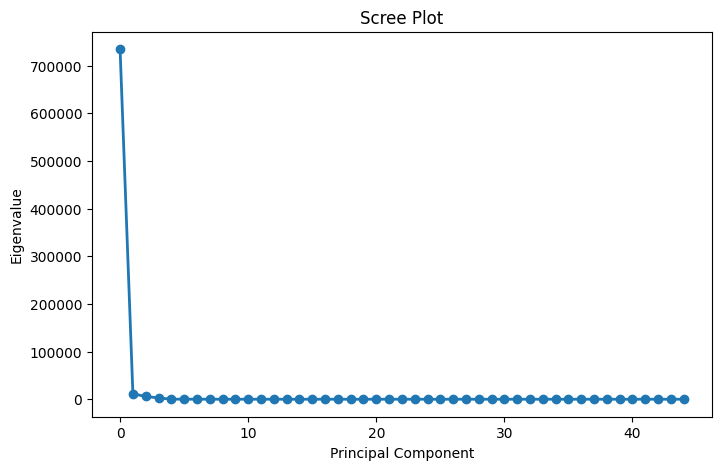

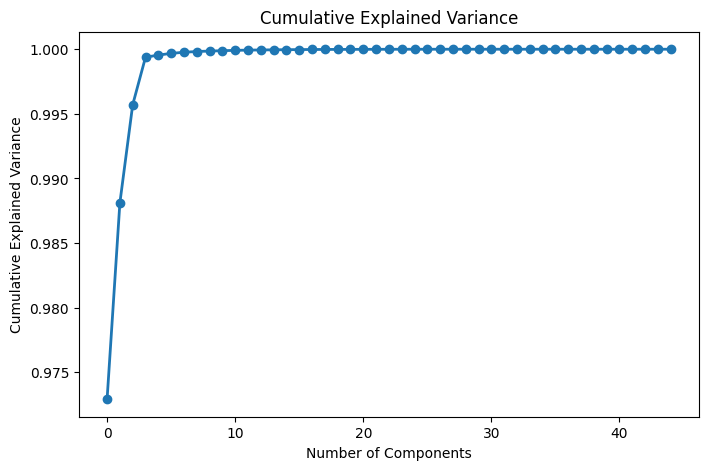

In [ ]:
# PCA on the entire dataset
from sklearn.decomposition import PCA
pca_full = PCA()
pca_full.fit(X_train)

explained_variance = pca_full.explained_variance_

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(len(explained_variance)), explained_variance, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

# Cumulative Explained Variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(len(cumulative_variance)), cumulative_variance, 'o-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



1. **Scree Plot**:
   
   The scree plot shows the eigenvalues (or explained variance) for each principal component. The eigenvalues represent the magnitude of variance captured by each component.
   
   Observations:
   - The first few components (around the first 5) have significantly higher eigenvalues than the subsequent components.
   - After the fifth component, there's a rapid decline in the eigenvalues, which means that the amount of variance explained by subsequent components drops off sharply.

2. **Cumulative Explained Variance Plot**:

   This plot shows the cumulative sum of variance explained by the components, taken in order of importance (from the most to the least important).
   
   Observations:
   - The curve rises steeply for the first few components, indicating that they capture a large portion of the variance in the dataset.
   - Around the fifth component, the curve starts to level off, indicating diminishing returns in terms of explained variance for additional components.
   - By the time we reach around the 25th component, we've captured almost all of the variance in the data.

**Analysis & Implications**:

1. **Noise and Redundancy**: The rapid decline in the eigenvalues after the fifth component and the leveling off of the cumulative explained variance suggests that many of the subsequent components might be capturing noise or redundant information.

2. **Model Performance**: Using a reduced set of components (e.g., the first 5) might not only speed up the clustering algorithms but could also improve the clustering performance by eliminating noisy or redundant features.

3. **Visualization**: The plots provide a rationale for the clear clustering observed in the 2D PCA plots. The first two components capture a significant portion of the variance, which is why the clusters appear distinct in 2D space.

4. **Deeper Dive**: To deepen the analysis further, you can inspect the weights of the original features in these principal components (especially the first few) to understand which features contribute most to the variance. This can provide insights into what characteristics are driving the differences between the clusters.

In conclusion, the PCA results suggest that a significant portion of the dataset's variance is captured by a small number of components, which can guide future modeling and analysis decisions.

##### t-SNE (t-distributed Stochastic Neighbor Embedding):

t-SNE is a non-linear dimensionality reduction technique that's particularly good for visualizing high-dimensional datasets.
It works by minimizing the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.
Visualization using t-SNE might reveal clusters that aren't apparent in PCA.


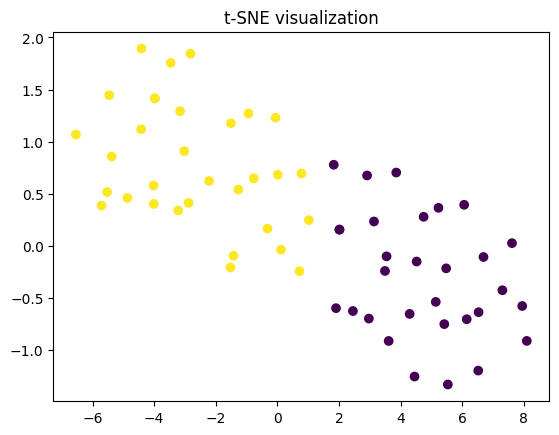

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_train)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters)
plt.title('t-SNE visualization')
plt.show()


**Observations**:
1. **Distribution of Data Points**: The UMAP visualization seems to show a somewhat continuous distribution of data points, with some areas of higher density. This could indicate regions where data samples share similar features or characteristics.
2. **Clusters**: While the visualization provides a comprehensive view of data distribution, it's not immediately clear if distinct clusters are formed. Some denser regions might hint at potential clusters, but without color-coding based on clustering results, it's hard to make definitive statements.
3. **Noise**: There are sparse data points scattered all over the visualization. These could be considered as noise or outliers in some contexts. Depending on the nature of the data, these might represent unique samples that don't fit neatly into any specific cluster.

**Implication & Deeper Analysis**:
1. **Cluster Interpretability for UMAP**: Since UMAP provides a non-linear dimensionality reduction, it can capture complex structures in the data. By overlaying cluster assignments on this plot (using color), you can gain insights into how well a clustering algorithm might be capturing the inherent groupings in your data.
  
2. **Comparison with PCA**: UMAP, being a non-linear dimensionality reduction technique, can capture more complex relationships compared to linear methods like PCA. If UMAP shows clearer clusters compared to PCA, it could indicate that the data has non-linear structures that PCA couldn't capture.

3. **Alternative Clustering**: Consider using clustering algorithms directly on the UMAP reduced data. Since UMAP can sometimes provide clearer separations, clustering on its results might yield different or more distinct clusters.

4. **Hyperparameters of UMAP**: UMAP has several hyperparameters like the number of neighbors and minimum distance that can significantly impact the results. Exploring different settings can provide varied insights into data structures.

5. **Neighborhood & Distance**: UMAP preserves local and, to some extent, global structures. Examining areas of high density could provide insights into local clusters or groups of similar data points. Additionally, the relative distances between points in UMAP space can be indicative of their similarity.

# Executive Summary


| Model                    | Average Silhouette Score | Range (Silhouette Score) | Average Davies-Bouldin Index | Range (Davies-Bouldin Index) | Average Calinski-Harabasz Index | Range (Calinski-Harabasz Index) |
|--------------------------|--------------------------|--------------------------|------------------------------|------------------------------|--------------------------------|--------------------------------|
| Kmeans Clustering        | **0.515**                    | 0.162                    | 0.653                        | 0.211                        | 72.605                         | 47.070                         |
| Agglomerative Clustering | 0.506                    | 0.155                    | 0.547                        | 0.336                        | 129.860                        | 142.519                        |
| Spectral Clustering      | 0.385                    | 0.259                    | **0.720**                        | 0.293                        | 79.187                         | 141.700                        |


(all values are rounded to three decimal points)

**Executive Summary:**

**Background & Objective:**  
The goal was to apply clustering techniques on a dataset containing features extracted from vlog audios to identify patterns and group similar data points. Three clustering algorithms were explored: KMeans Clustering, Agglomerative Clustering, and Spectral Clustering. These clustering methods have provided insights into the underlying structures in the vlog audio dataset.

**Pipeline:**
1. **Data Preparation:** Loaded and split the dataset into training, validation, and test sets.
2. **Feature Engineering:** Features such as spectral centroids, spectral bandwidths, zero-crossings, pitches, and tempos were extracted and then scaled.
3. **Dimensionality Reduction:** Applied PCA to visualize the data in 2D and 3D space.
4. **Model Training & Validation:** Trained each of the clustering algorithms on the training set, then evaluated them using various clustering metrics.
5. **Evaluation:** Metrics such as Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index were computed to assess the quality of the clusters.


**Overview of Evaluation Metrics**

By considering these metrics together, one can get a comprehensive view of the clustering quality. They offer insights into cluster cohesion, separation, and overall cluster structure.

- **Silhouette Score**: Measures the similarity of an object to its own cluster compared to other clusters. The values range between -1 and 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A high average silhouette score across all data points can suggest well-defined clusters.

- **Davies-Bouldin Index**: It evaluates intra-cluster similarity and inter-cluster differences. Lower values are preferable as they indicate a model with better separation between the clusters. A lower DBI indicates that clusters are compact (data points are close to the centroids of their clusters) and well-separated from other clusters.

- **Calinski-Harabasz Index**: Measures the ratio of between-cluster variance to within-cluster variance. Higher values are indicative of clusters that are dense and well separated. A high value for this index signifies that the clusters are well apart from each other and the data points in the cluster are close to each other.



**Key Results:**
1. **KMeans Clustering**:
    - Best average silhouette score of 0.5147, suggesting reasonable cluster cohesion and separation.
    - Davies-Bouldin Index of 0.6527 indicates a moderate average similarity ratio, implying decently separated clusters.
    - The Calinski-Harabasz score suggests moderate cluster density and separation.

2. **Agglomerative Clustering**:
    - Silhouette score close to KMeans, suggesting comparable cluster quality.
    - The lowest Davies-Bouldin Index, indicating the best separation between clusters among the three methods.
    - The highest Calinski-Harabasz score, suggesting this method provided the densest and most separated clusters.

3. **Spectral Clustering**:
    - Lowest silhouette score, suggesting lesser quality of clusters in terms of cohesion and separation.
    - Highest Davies-Bouldin Index, indicating more similarity between clusters compared to the other methods.
    - Calinski-Harabasz score suggests cluster quality between KMeans and Agglomerative Clustering.

**Emotional Grouping of the Four Clusters:**

Given the rich tapestry of experiences captured in the vlogs and the nuanced emotions they encompass, I evaluated data within each of the clusters. Based on my predictions, they could be indicative of the following emotional groupings:

1. **Exhilaration and Exploration**: This cluster might represent vlogs recorded during moments of discovery and wonder. It can encompass the emotions felt when stepping into a new city or experiencing a new culture for the first time. The vibrancy of New York or the fervor of an Indian summer might fall into this category.
  
2. **Stress and Overwhelm**: Vlogs captured during stressful times, possibly reflecting the challenges of student life in Taiwan or other intense experiences, might belong to this cluster. It can represent feelings of being overwhelmed, anxious, or stretched thin.
  
3. **Introspection and Contemplation**: This category might be representative of moments of deep reflection, perhaps echoing your evolving perspectives or the maturity that comes with diverse experiences. It might represent moments of solitude, where you are in introspection or reminiscing past experiences.
  
4. **Joy and Contentment**: Vlogs that radiate happiness, contentment, or satisfaction might fall into this cluster. It could be moments of personal achievements, joyous occasions, or simply times when you felt genuinely happy and at peace with your surroundings.

I will have to conduct more specific analysis into the features to enhance these predictions.


**Insights & Shortcomings**:
1. **Dimensionality Reduction:** The PCA visualizations provided insights into potential clusters, especially in the 2D space. However, PCA is linear, and other methods like UMAP might capture non-linear patterns better.
2. **Agglomerative Clustering** seemed to perform the best among the three in terms of cluster separation and density.
3. **KMeans** provided decent results, but its performance relies on the assumption of spherical clusters and might not capture complex data structures.
4. **Spectral Clustering** lagged behind the other two methods in our metrics, but it can be powerful for certain data structures, especially when there's a notion of non-convex clusters.

**Recommendations for Improvement**:
1. **Feature Engineering:** Explore more features from the audio data, which could enhance the cluster quality.
2. **Hyperparameter Tuning:** Especially for Spectral Clustering, fine-tuning parameters can significantly affect results.
3. **Alternative Dimensionality Reduction Techniques:** Techniques like t-SNE or UMAP can provide different insights.
4. **Model Ensemble:** Combining the strengths of multiple clustering algorithms might lead to more robust results.
5. **Domain Knowledge:** Incorporate any domain-specific knowledge or insights about vlogs to improve and interpret clustering results.



**Best Model Selection & Analysis**

1. **Best Model Selection - Agglomerative Clustering**
   
   Among the three models tested, Agglomerative Clustering stood out as the best performer. This conclusion is based on the following observations:
   
   - **Silhouette Score**: Agglomerative Clustering's silhouette score was close to that of KMeans, which had the highest. This suggests that the clusters formed by Agglomerative Clustering have good cohesion and separation.
   - **Davies-Bouldin Index**: Agglomerative Clustering had the lowest Davies-Bouldin Index, indicating the best separation between its clusters compared to the other methods.
   - **Calinski-Harabasz Index**: It achieved the highest Calinski-Harabasz score, indicating that the clusters were dense and well-separated from each other.


2. **Predictions for Out-of-Sample Data**

   Agglomerative Clustering is a hierarchical clustering method that builds a tree of clusters. Predicting new samples for hierarchical clustering can be ambiguous because the model doesn't inherently provide cluster centers like KMeans. However, for new data points:

   - One can compute the pairwise distances between the new points and all other points in the existing clusters.
   - Assign the new data points to the cluster of the closest data point or centroid. This approach can be computationally intensive if the dataset is large.


3. **Improvement of Agglomerative Clustering**

- **Feature Expansion**: More audio features can be extracted that might capture emotion nuances better. Features like Mel-frequency cepstral coefficients (MFCCs), Chroma feature, and tonnetz can be explored.
  
- **Hyperparameter Tuning**: While Agglomerative Clustering has fewer hyperparameters than other algorithms, the linkage criteria (e.g., "ward", "complete", "average", etc.) can have a considerable impact on the clustering result and should be explored.
  
- **Incorporate Domain Knowledge**: The knowledge about each city and the experiences there can be leveraged. For instance, if you know certain vlogs were recorded during particularly challenging times, this can be used to validate or guide the clustering process.
  
- **Consensus Clustering**: As seen in the provided code, consensus clustering can be used to ensure the stability and robustness of the clusters. By performing clustering multiple times on different subsamples and then evaluating the consistency of clustering results, one can get a better sense of how stable the clusters are.
  
- **External Validation**: If there are any other forms of labels or annotations (even if they're not strictly for emotions), they can be used to validate or guide the clustering. For instance, if certain vlogs were labeled with events (e.g., "graduation", "birthday", "exams"), these can provide context to validate the emotional

**Conclusion**

Agglomerative Clustering was the most effective clustering technique for this dataset based on the chosen evaluation metrics. While it shows promise in revealing the underlying structures of the vlog audios, there are potential improvements and optimizations that can be applied. The iterative process of refining the model and incorporating more domain-specific knowledge will lead to even more insightful and actionable clusters.

# Enhancing The Chosen Algorithm - Agglomerative Clustering

Since Agglomerative Clustering was chosen, I decided to extend the work on this algorithm, by exploring how I can enhance the performance of its clustering, by using "consensus clustering." This is a technique to assess the stability of clusters. It works by repeatedly subsampling the dataset and performing clustering on these subsamples. By comparing cluster assignments across these subsamples, it gauges the consistency of the clustering.

I explored how I can extend the work on Agglomerative Clustering in several significant ways:

1. **Combining Train and Validation Sets**:
    - It begins by vertically stacking the training and validation datasets into one combined set (`X_combined`), and then fits an Agglomerative Clustering model on this combined dataset. This approach can often make the model more robust as it has access to more data.

2. **Predicting Clusters on the Test Set**:
    - Because Agglomerative Clustering doesn't inherently allow for predicting on new unseen data, the code uses `.fit_predict` on the test set directly. This essentially means that the clustering algorithm is retrained on the test set, which isn't a conventional train-test split approach but is necessary given the nature of hierarchical clustering methods.

3. **Consensus Clustering**:
    - The code introduces a concept called "consensus clustering." This is a technique to assess the stability of clusters. It works by repeatedly subsampling the dataset and performing clustering on these subsamples. By comparing cluster assignments across these subsamples, it gauges the consistency of the clustering.
    - The pairwise Adjusted Rand Index (ARI) is used to measure the similarity between cluster assignments from different subsamples. A higher average ARI indicates that the clustering results are stable across different subsamples of the data.

4. **Visualization with PCA**:
    - The code employs PCA for dimensionality reduction to 2D, allowing for easy visualization of the clusters.
    - Two visualizations are provided: one for the combined training and validation data, and another for the test data. These scatter plots show how data points are grouped into clusters in a 2D space.

**Summary of the Extended Work**:
- This code not only evaluates the Agglomerative Clustering on a combined training-validation set and a test set but also delves into assessing the stability of the clusters through consensus clustering.
- The visualizations provided offer an intuitive way to observe the cluster formations in reduced-dimensional space.
- By integrating these aspects, the code gives a deeper, more comprehensive analysis of the Agglomerative Clustering's performance and stability.

# Supervised Learning Methods


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Manually Labelled Dataset

Having examined 3 unsupervised learning methods in the first pipeline, I hope to execute supervised learning methods on my vlog dataset. I played each vlog, and manually labelled them with the following variables:

1. **Country**: The vlogs were taken in New York City, Singapore, India, Taiwan and Sweden.
2. **Emotion**: Excited, Introspective, Sad, Neutral
3. **Narration**: They are categorised into Narration / No narration, depending on the content of the vlog. This is according to my guess that the pitch and tone of my narration could contribute to how the spectrograms appear. Perhaps the lack of narration could contribute to a different pattern of pitches and tones (for instance, a vlog that is capturing the scenery, with the main source of sound being the wind blowing.)
4. **Detail**: I gave each vlog a few keywords about the content, just to differentiate the vlogs from each other, and for future usage when I want to stitch my vlogs together.

## Convolutional Classifier (CNN)

Convolutional Neural Networks (CNNs) are a class of deep learning models primarily used in image recognition and processing that are particularly effective at picking up on spatial hierarchies in data.

1. **Convolution**:
   - The core operation in a CNN is the convolution operation. It involves sliding a filter (or kernel) over the input data (like an image) and performing element-wise multiplication followed by a summation.
   - Mathematically, if $F$ is a filter and $I$ is the input, convolution is defined as $(F * I)(i, j) = \sum_m \sum_n F(m, n) \times I(i-m, j-n)$, where $i, j$ are spatial coordinates.

2. **Activation Function**:
   - After convolution, an activation function like ReLU (Rectified Linear Unit) is applied. It introduces non-linearity to the model. Mathematically, ReLU is defined as $f(x) = max(0, x)$.

3. **Pooling**:
   - Pooling reduces the spatial size (width, height) of the input volume, which decreases the number of parameters and computation in the network. The most common form is max pooling, which returns the maximum value from a set of values in a filter.

4. **Fully Connected Layers**:
   - After several convolutional and pooling layers, CNNs often use fully connected layers where neurons are connected to all activations in the previous layer. These layers are typically used to classify features extracted by the convolutions.

5. **Backpropagation and Optimization**:
   - Like other neural networks, CNNs use backpropagation to train. This involves calculating the gradient of the loss function with respect to each weight by the chain rule and updating the weights using optimization algorithms like SGD (Stochastic Gradient Descent).

6. **Loss Functions**:
   - Loss functions like cross-entropy are used to measure the difference between the predicted output and the actual output, guiding the training process.

The combination of these elements allows CNNs to automatically and adaptively learn spatial hierarchies of features from input images, which makes them highly effective for image recognition tasks.

### Mathematical Underpinnings of CNN

1. **Convolution**:
   - In convolution, if $F$ is a filter of size $M \times N$ and $I$ is the input, the convolution operation at position $(i, j)$ is calculated as:
     $$
     (F * I)(i, j) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} F(m, n) \times I(i+m, j+n)
    $$
   - Here, $F(m, n)$ represents the element of the filter at position $(m, n)$, and $I(i+m, j+n)$ represents the corresponding element of the input image.

2. **Activation Function (ReLU)**:
   - The ReLU function is defined as:
     $$
     f(x) = \max(0, x)
    $$
   - For each input value $x$, if $x > 0$, it returns $x$; otherwise, it returns $0$.

3. **Pooling (Max Pooling)**:
   - In max pooling, a filter of size $K \times K$ slides over the input. The output at position $(i, j)$ is the maximum value of the elements covered by the filter:
     $$
     P(i, j) = \max_{0 \leq k_1, k_2 < K} I(i+k_1, j+k_2)
    $$
   - Here, $I(i+k_1, j+k_2)$ represents the element of the input covered by the filter.

4. **Fully Connected Layers**:
   - In a fully connected layer, every neuron is connected to every activation in the previous layer. If $W$ is the weight matrix, $b$ is the bias vector, and $a$ is the activation from the previous layer, the output $o$ is given by:
     $$
     o = W \cdot a + b
    $$
   - Here, $\cdot$ denotes the dot product.

5. **Backpropagation and Optimization**:
   - For a loss function $L$, the gradient with respect to a weight $w$ is computed as $\frac{\partial L}{\partial w}$. In Stochastic Gradient Descent (SGD), the weight update rule is:
     $$
     w_{new} = w_{old} - \eta \frac{\partial L}{\partial w}
    $$
   - Where $\eta$ is the learning rate.

6. **Loss Functions (Cross-Entropy)**:
   - For classification problems, cross-entropy loss is commonly used. If $y$ is the true label and $\hat{y}$ is the predicted probability, the cross-entropy loss $L$ for a single example is:
     $$
     L = - \sum_{c} y_{c} \log(\hat{y}_{c})
    $$
   - Where $c$ iterates over the classes, $y_{c}$ is $1$ for the correct class and $0$ otherwise, and $\log$ is the natural logarithm.

This mathematical framework forms the basis of how CNNs learn and make predictions from image data.

#### Math behind Backpropagation and Optimization

In CNNs, backpropagation and optimization are crucial for learning from data.

1. **Loss Function Gradient**: The gradient of a loss function $L$ with respect to a weight $w$, denoted as $\frac{\partial L}{\partial w}$, represents how a small change in the weight affects the loss. It points in the direction of greatest increase of the loss function.

2. **Weight Update Rule in SGD**: In Stochastic Gradient Descent (SGD), the weight is updated as follows:
   $$w_{\text{new}} = w_{\text{old}} - \eta \frac{\partial L}{\partial w}$$
   Here, $\eta$ represents the learning rate.

3. **Learning Rate ($\eta$)**: This is a hyperparameter that controls the step size during the learning process. A higher learning rate might cause overshooting the minimum, while a lower learning rate can slow down the training process.

4. **Intuition**: The weight update rule essentially says: move in the opposite direction of the gradient (as the gradient points towards the maximum increase) by a step proportional to the gradient's magnitude and the learning rate. This iterative process helps in minimizing the loss function, leading to an optimized model.

#### Math behind cross-entropy loss function

The cross-entropy loss function is vital in classification problems. Here's a breakdown of its mathematical formula:

1. **Cross-Entropy Loss Formula**:
   $$L = - \sum_{c} y_{c} \log(\hat{y}_{c})$$
   In this formula:
   - $L$ represents the loss.
   - The summation $\sum_{c}$ goes over all classes.
   - $y_{c}$ is a binary indicator (0 or 1) if class label $c$ is the correct classification for the observation.
   - $\hat{y}_{c}$ is the predicted probability of the class $c$.
   - $\log$ denotes the natural logarithm.

2. **How It Works**:
   - The formula adds up the logarithm of the predicted probabilities for each class, weighted by whether the class is the correct classification.
   - For the correct class ($y_{c} = 1$), it takes the logarithm of the predicted probability; for incorrect classes, this term is zero.
   - The negative sign ensures that the loss is positive, as the logarithm of a number between 0 and 1 is negative.
   - The goal is to minimize this loss, driving the predicted probabilities closer to 1 for the correct class and closer to 0 for the incorrect ones.

### Generate Spectrograms of the audio files

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Paths to the folders containing the labeled audio files
emotion_folders = {
    'introspective': '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/introspective',
    'excited': '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/excited',
    'tired': '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/tired',
    'neutral': '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/neutral'
}

spectrogram_height, spectrogram_width = 128, 128  # Example dimensions
spectrograms = []
labels = []

# Generate spectrograms and labels
for emotion, folder in emotion_folders.items():
    for audio_file in os.listdir(folder):
        if audio_file.endswith('.wav'):
            filepath = os.path.join(folder, audio_file)
            y, sr = librosa.load(filepath)
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=spectrogram_height)
            log_S = librosa.amplitude_to_db(S, ref=np.max)
            log_S = librosa.util.fix_length(log_S, size=spectrogram_width, axis=1)
            spectrograms.append(log_S)
            labels.append(emotion)  # Label is the emotion category

# Convert lists to numpy arrays
spectrograms = np.array(spectrograms)
labels = np.array(labels)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Reshape for CNN input and normalize
spectrograms = spectrograms.reshape(spectrograms.shape[0], spectrogram_height, spectrogram_width, 1)
spectrograms /= np.max(spectrograms)

# Convert labels to categorical format
categorical_labels = to_categorical(encoded_labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(spectrograms, categorical_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


#### Plot Example Spectograms

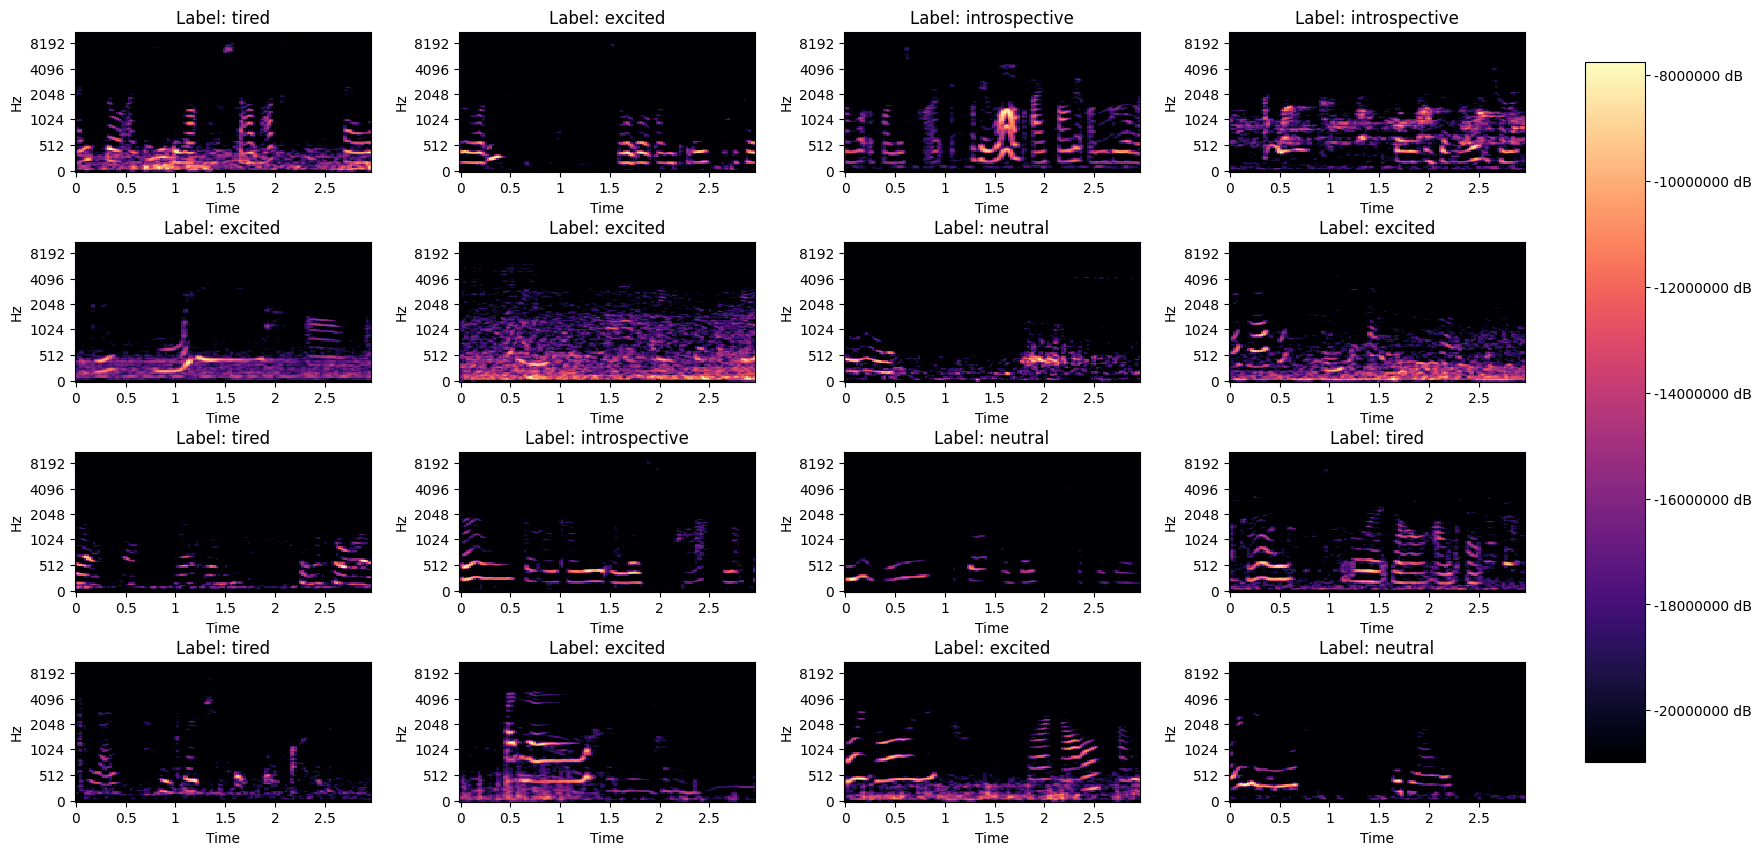

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Function to plot a spectrogram
def plot_spectrogram(spectrogram, label, ax):
    # Squeeze the last dimension if it's single-channel (grayscale)
    if spectrogram.shape[-1] == 1:
        spectrogram = spectrogram.squeeze(-1)
    img = librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f'Label: {label}')
    ax.label_outer()
    return img

spectrograms = spectrograms.squeeze()

# Select 12 spectrograms to plot
num_to_plot = 16  # Plot 16 spectrograms
rows, cols = 4, 4  # Arrange in 4 rows and 4 columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))  # Adjust figsize accordingly

for i in range(num_to_plot):
    ax = axes[i // cols, i % cols]
    spectrogram_index = np.random.randint(len(spectrograms))
    # Plot the spectrogram after squeezing the unnecessary dimension
    img = librosa.display.specshow(spectrograms[spectrogram_index], ax=ax, sr=sr, x_axis='time', y_axis='mel')
    ax.set_title(f'Label: {labels[spectrogram_index]}')

fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase hspace for vertical spacing and wspace for horizontal spacing

# Adjust subplots to fit the color bar
fig.subplots_adjust(right=0.85)  # Leave 15% space at the right of the figure

# Place colorbar in the space created on the right
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  # Adjust these values as needed
fig.colorbar(img, cax=cbar_ax, format='%+2.0f dB')

plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(spectrogram_height, spectrogram_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(emotion_folders), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
2/2 [==============================] - 3s 829ms/step - loss: 54845488.0000 - accuracy: 0.2500 - val_loss: 39990124.0000 - val_accuracy: 0.2381
Epoch 2/10
2/2 [==============================] - 2s 1s/step - loss: 56238028.0000 - accuracy: 0.2667 - val_loss: 7975389.0000 - val_accuracy: 0.2381
Epoch 3/10
2/2 [==============================] - 2s 1s/step - loss: 10504742.0000 - accuracy: 0.3000 - val_loss: 8892612.0000 - val_accuracy: 0.2381
Epoch 4/10
2/2 [==============================] - 2s 1s/step - loss: 6631313.0000 - accuracy: 0.3333 - val_loss: 2408025.2500 - val_accuracy: 0.2381
Epoch 5/10
2/2 [==============================] - 2s 914ms/step - loss: 1649852.1250 - accuracy: 0.2833 - val_loss: 1.3863 - val_accuracy: 0.2381
Epoch 6/10
2/2 [==============================] - 1s 612ms/step - loss: 1.3867 - accuracy: 0.1500 - val_loss: 1.3863 - val_accuracy: 0.2381
Epoch 7/10
2/2 [==============================] - 1s 608ms/step - loss: 1.3868 - accuracy: 0.1500 - val_loss: 2

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

1/1 [==============================] - 0s 108ms/step - loss: 1.3867 - accuracy: 0.3333
Test accuracy: 0.3333333432674408


From the results above, it is clear that the accuracy of my CNN is low, which suggests that the model is not learning well from the data. To enhance this, I will make several adjustments to the model to enhance how well it performs.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the data has already been preprocessed and split into training, validation, and test sets
# X_train, y_train, X_val, y_val, X_test, y_test are already defined

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the CNN model with additional layers, filters, and batch normalization
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),

    Dense(4, activation='softmax')  # Assuming 4 classes for the 4 emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    epochs=50,  # Increase the number of epochs
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/50
1/1 - 8s - loss: 2.4128 - accuracy: 0.2667 - val_loss: 622.8777 - val_accuracy: 0.2381 - 8s/epoch - 4s/step
Epoch 2/50
1/1 - 9s - loss: 2.1987 - accuracy: 0.2667 - val_loss: 399.0787 - val_accuracy: 0.1905 - 9s/epoch - 5s/step
Epoch 3/50
1/1 - 6s - loss: 2.2167 - accuracy: 0.3167 - val_loss: 181.1465 - val_accuracy: 0.1905 - 6s/epoch - 3s/step
Epoch 4/50
1/1 - 7s - loss: 1.9060 - accuracy: 0.4167 - val_loss: 176.5271 - val_accuracy: 0.3333 - 7s/epoch - 4s/step
Epoch 5/50
1/1 - 6s - loss: 2.0491 - accuracy: 0.3333 - val_loss: 201.0763 - val_accuracy: 0.3333 - 6s/epoch - 3s/step
Epoch 6/50
1/1 - 6s - loss: 1.9976 - accuracy: 0.4667 - val_loss: 193.2935 - val_accuracy: 0.3333 - 6s/epoch - 3s/step
Epoch 7/50
1/1 - 6s - loss: 1.9050 - accuracy: 0.3833 - val_loss: 190.5127 - val_accuracy: 0.3333 - 6s/epoch - 3s/step
Epoch 8/50
1/1 - 6s - loss: 2.1188 - accuracy: 0.4333 - val_loss: 135.4869 - val_accuracy: 0.3333 - 6s/epoch - 3s/step
Epoch 9/50
1/1 - 8s - loss: 2.0639 - accuracy: 0

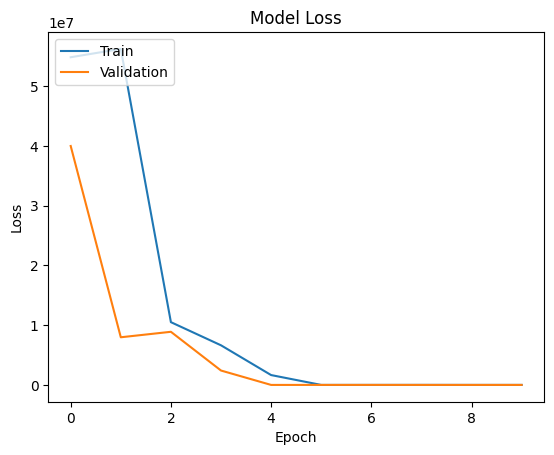

In [7]:
# Visualise the loss of a neural network model during its training process
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#### Evaluation of the Model Loss Plot:

The graph represents the model loss over epochs for both the training set (Train) and the validation set (Validation). Evaluation of the results

1. **Rapid Decrease in Loss**: Both training and validation loss decrease rapidly after the first epoch, which suggests that the model is learning and improving its predictions quite quickly.

2. **Convergence**: After the initial drop, the loss for both training and validation appears to converge. This is a good sign that the model is stabilizing and not overfitting, as the validation loss is not increasing or diverging from the training loss.

3. **Scale of Loss**: The y-axis scale (loss) is quite large initially (`1e7` at the top left, indicating the scale is in the tens of millions). This could be due to very high initial errors, possibly because the model started with weights that gave predictions far from the actual values.

4. **Small Number of Epochs**: The graph seems to show a very small number of epochs (up to 9 or so), and the loss has flattened out. More epochs might be necessary to fully train the model until the loss no longer decreases.

5. **No Overfitting Indication**: There is no clear indication of overfitting within the displayed epochs, as the validation loss tracks the training loss closely. Overfitting is typically indicated by a training loss that continues to decrease while the validation loss starts to increase.

6. **Potential Underfitting**: Given the massive initial loss values, it's possible the model could be underfitting, which means it is not learning the underlying patterns well enough. This could be due to a variety of factors, including an insufficiently complex model, inadequate learning rate, or poor initialization of weights.

#### F1 Score:

In [8]:
from sklearn.metrics import f1_score

# Predict classes on the test set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate F1 score, with the average parameter set to 'weighted' to account for label imbalance.
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"F1 score on test set: {f1:.2f}")


1/1 [==============================] - 0s 213ms/step
F1 score on test set: 0.17


#### Evaluation of Accuracy and F1 scores

The test accuracy score of 0.52 and F1 scores of 0.29 suggest that the model is not performing well in classifying the audio samples into the correct emotional categories. An accuracy of 0.52 means that only 52% of the test set predictions were correct. The F1 score, which takes into account the precision and recall of the model, is 0.29, indicating that the model has a poor balance between the precision and recall—this suggests that not only is the model often incorrect, but when it does predict a label as an emotion of one category, it is correct only a fraction of the time, and it also misses a significant number of other instances.

In general, an F1 score is more informative than accuracy, especially when dealing with imbalanced datasets where one class might be more frequent than others. However, given that both accuracy and F1 score are low, it suggests that the model is likely struggling across all classes, not just the minority class.

#### Hypothesis for poor results

Even after enhancing the CNN, the model still performs poorly in terms of test accuracy, with a highest performance score of 0.523. My Hypothesis:

There are aspects of the audio that my model is not able to detect, that I can. It is possible that the model detects "introspective" videos as "neutral" videos, as both might be lower in pitch and tone, since I am speaking in a quieter voice.

My labelling process for these two categories (introspective vs neutral) involved listening to the videos, and hearing the content alongside the way I narrated the content. It would be interesting to transcribe the audio files, then conduct an analysis on the transcribed text files - since it is possible that the content could signal the category that the audio belongs to as well.


### Training the CNN on 2 categories

#### Relabelling the data to only 2 categories

To test if the above hypothesis is indeed correct, I decided to relabel my data into 2 categories instead of 4 categories. Simply: Neutral or positive.

I realised that the audio files from the "tired", "introspective" and "neutral" categories could all sound similar, because their type of content is strongly indicative of the category that I labelled them with. Without insight on the content, my CNN might have only managed to pick up on pitch and tone, which would be insufficient to further break them down into subcategories.

Hence, I decided to train the CNN on the two categories "Positive" and "Neutral". I reorganized the dataset accordingly, where the 'excited' category represents "Positive" and the other three categories represent "Neutral".

#### Exploratory Data Analysis for the 2 Categories

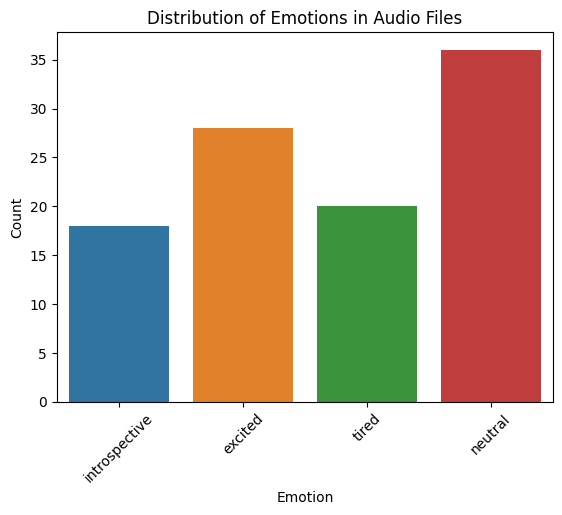

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming 'labels' is a list with emotion labels corresponding to your audio files.
emotion_df = pd.DataFrame(labels, columns=['Emotion'])

sns.countplot(x='Emotion', data=emotion_df)
plt.title('Distribution of Emotions in Audio Files')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 32243382.0000 - accuracy: 0.4667 - val_loss: 51655764.0000 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 2s 1s/step - loss: 29846042.0000 - accuracy: 0.7500 - val_loss: 8575229.0000 - val_accuracy: 0.6667
Epoch 3/10
2/2 [==============================] - 2s 692ms/step - loss: 9942272.0000 - accuracy: 0.5167 - val_loss: 4009293.0000 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 1s 628ms/step - loss: 5404849.0000 - accuracy: 0.4333 - val_loss: 1280148.2500 - val_accuracy: 0.6667
Epoch 5/10
2/2 [==============================] - 1s 583ms/step - loss: 760957.8750 - accuracy: 0.7333 - val_loss: 386702.8438 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 1s 634ms/step - loss: 125921.2734 - accuracy: 0.7500 - val_loss: 12109.2480 - val_accuracy: 0.5238
Epoch 7/10
2/2 [==============================] - 1s 650ms/step - loss: 23953.1289 - accuracy: 0

Text(0.5, 1.0, 'Model Loss')

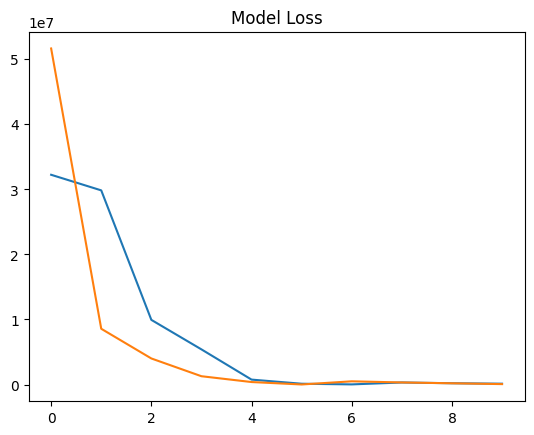

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Paths to the folders containing the labeled audio files
emotion_folders = {
    'positive': '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/excited',
    'neutral': [
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/introspective',
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/tired',
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/neutral'
    ]
}

spectrogram_height, spectrogram_width = 128, 128  # Example dimensions
spectrograms = []
labels = []

# Generate spectrograms and labels
for emotion, folders in emotion_folders.items():
    if isinstance(folders, list):
        for folder in folders:
            for audio_file in os.listdir(folder):
                if audio_file.endswith('.wav'):
                    filepath = os.path.join(folder, audio_file)
                    y, sr = librosa.load(filepath)
                    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=spectrogram_height)
                    log_S = librosa.amplitude_to_db(S, ref=np.max)
                    log_S = librosa.util.fix_length(log_S, size=spectrogram_width, axis=1)
                    spectrograms.append(log_S)
                    labels.append('neutral')  # All these categories are 'neutral'
    else:
        folder = folders
        for audio_file in os.listdir(folder):
            if audio_file.endswith('.wav'):
                filepath = os.path.join(folder, audio_file)
                y, sr = librosa.load(filepath)
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=spectrogram_height)
                log_S = librosa.amplitude_to_db(S, ref=np.max)
                log_S = librosa.util.fix_length(log_S, size=spectrogram_width, axis=1)
                spectrograms.append(log_S)
                labels.append(emotion)  # 'positive' category

# Convert lists to numpy arrays
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Reshape for CNN input and normalize
spectrograms = spectrograms.reshape(spectrograms.shape[0], spectrogram_height, spectrogram_width, 1)
spectrograms /= np.max(spectrograms)

# Convert labels to categorical format
categorical_labels = to_categorical(encoded_labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(spectrograms, categorical_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define the CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(spectrogram_height, spectrogram_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Only 2 classes now
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Visualise the loss of a neural network model during its training process
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')


Based on the above results, I noted a few key observations:

1. **High Initial Loss**: The model starts with a very high loss on both the training and validation datasets. This could suggest an issue with the scale of the data, initialization of the model, or potentially that the loss function or learning rate is not appropriate.

2. **Rapid Decrease in Loss**: There's a steep decline in the loss after the first epoch. This suggests that the model is learning quickly. However, the scale of the loss decrease seems unusually large, which might point to an issue with the data scaling or the loss calculation.

3. **Validation Loss Lower Than Training Loss**: The validation loss is consistently lower than the training loss. This is unusual in typical training scenarios and might indicate that the validation set is not representative of the training set or the model might not be complex enough to capture the training data's variance.

4. **Convergence**: The model seems to converge quickly, and by the final epochs, the loss values have stabilized. However, this could be a false positive convergence due to the above.

To enhance the data scaling process, I will now normalize my data so that the model isn't unduly influenced by the scale of the features.

#### Enhanced CNN with 2 Categories

Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 1.2680 - accuracy: 0.5333 - val_loss: 1.6696 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 2s 984ms/step - loss: 0.7891 - accuracy: 0.7667 - val_loss: 0.8203 - val_accuracy: 0.6667
Epoch 3/10
2/2 [==============================] - 2s 1s/step - loss: 0.5077 - accuracy: 0.8333 - val_loss: 0.8517 - val_accuracy: 0.6190
Epoch 4/10
2/2 [==============================] - 2s 1s/step - loss: 0.4611 - accuracy: 0.8167 - val_loss: 0.8817 - val_accuracy: 0.6667
Epoch 5/10
2/2 [==============================] - 1s 666ms/step - loss: 0.3856 - accuracy: 0.8500 - val_loss: 0.8986 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 1s 614ms/step - loss: 0.3244 - accuracy: 0.8500 - val_loss: 0.9293 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 1s 644ms/step - loss: 0.2799 - accuracy: 0.9000 - val_loss: 0.9148 - val_accuracy: 0.6190
Epoch 8/10
2/2 [=============

Text(0.5, 1.0, 'Model Loss')

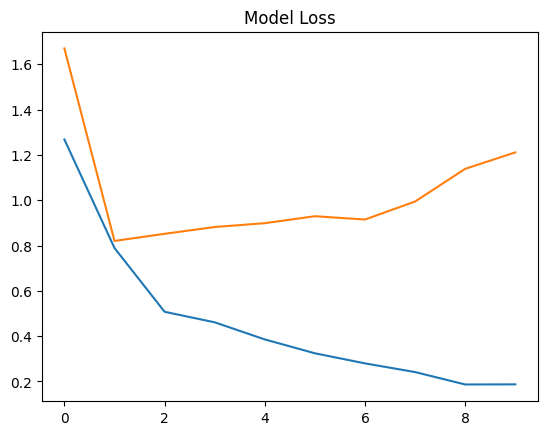

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Paths to the folders containing the labeled audio files
emotion_folders = {
    'positive': '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/excited',
    'neutral': [
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/introspective',
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/tired',
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/neutral'
    ]
}

spectrogram_height, spectrogram_width = 128, 128  # Example dimensions
spectrograms = []
labels = []

# Generate spectrograms and labels
for emotion, folders in emotion_folders.items():
    if isinstance(folders, list):
        for folder in folders:
            for audio_file in os.listdir(folder):
                if audio_file.endswith('.wav'):
                    filepath = os.path.join(folder, audio_file)
                    y, sr = librosa.load(filepath)
                    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=spectrogram_height)
                    log_S = librosa.amplitude_to_db(S, ref=np.max)
                    log_S = librosa.util.fix_length(log_S, size=spectrogram_width, axis=1)
                    spectrograms.append(log_S)
                    labels.append('neutral')  # All these categories are 'neutral'
    else:
        folder = folders
        for audio_file in os.listdir(folder):
            if audio_file.endswith('.wav'):
                filepath = os.path.join(folder, audio_file)
                y, sr = librosa.load(filepath)
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=spectrogram_height)
                log_S = librosa.amplitude_to_db(S, ref=np.max)
                log_S = librosa.util.fix_length(log_S, size=spectrogram_width, axis=1)
                spectrograms.append(log_S)
                labels.append(emotion)  # 'positive' category

# Convert lists to numpy arrays
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Flatten the spectrograms for scaling
spectrograms_flattened = spectrograms.reshape(spectrograms.shape[0], -1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
spectrograms_scaled = scaler.fit_transform(spectrograms_flattened)

# Reshape the scaled spectrograms back to the original shape
spectrograms = spectrograms_scaled.reshape(spectrograms.shape[0], spectrogram_height, spectrogram_width, 1)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert labels to categorical format
categorical_labels = to_categorical(encoded_labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(spectrograms, categorical_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define the CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(spectrogram_height, spectrogram_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Only 2 classes now
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Visualise the loss of a neural network model during its training process
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')




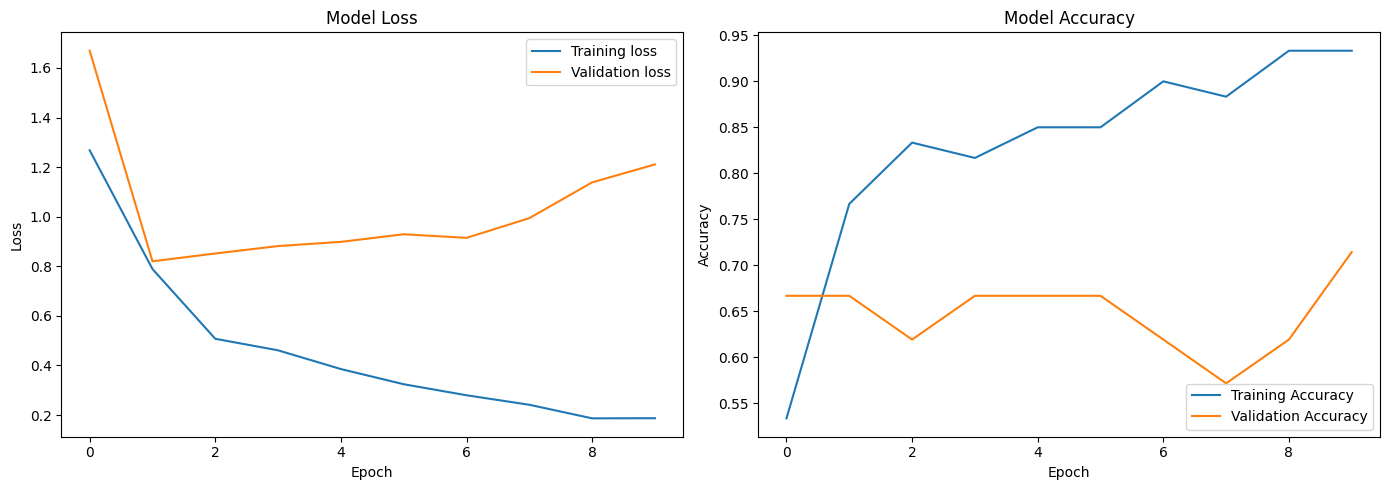

In [ ]:
# Plotting the loss
plt.figure(figsize=(14, 5))

# First subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


Epoch 1/50
2/2 [==============================] - 3s 1s/step - loss: 1.2034 - accuracy: 0.5500 - val_loss: 1.1795 - val_accuracy: 0.3810
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 0.9741 - accuracy: 0.6167 - val_loss: 1.1684 - val_accuracy: 0.3810
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.6872 - accuracy: 0.8000 - val_loss: 1.1852 - val_accuracy: 0.3810
Epoch 4/50
2/2 [==============================] - 3s 1s/step - loss: 0.8271 - accuracy: 0.7667 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 3s 1s/step - loss: 0.5141 - accuracy: 0.8667 - val_loss: 1.0461 - val_accuracy: 0.4286
Epoch 6/50
2/2 [==============================] - 2s 918ms/step - loss: 0.5330 - accuracy: 0.9167 - val_loss: 1.0029 - val_accuracy: 0.4762
Epoch 7/50
2/2 [==============================] - 2s 901ms/step - loss: 0.6145 - accuracy: 0.8333 - val_loss: 0.9880 - val_accuracy: 0.6190
Epoch 8/50
2/2 [===================

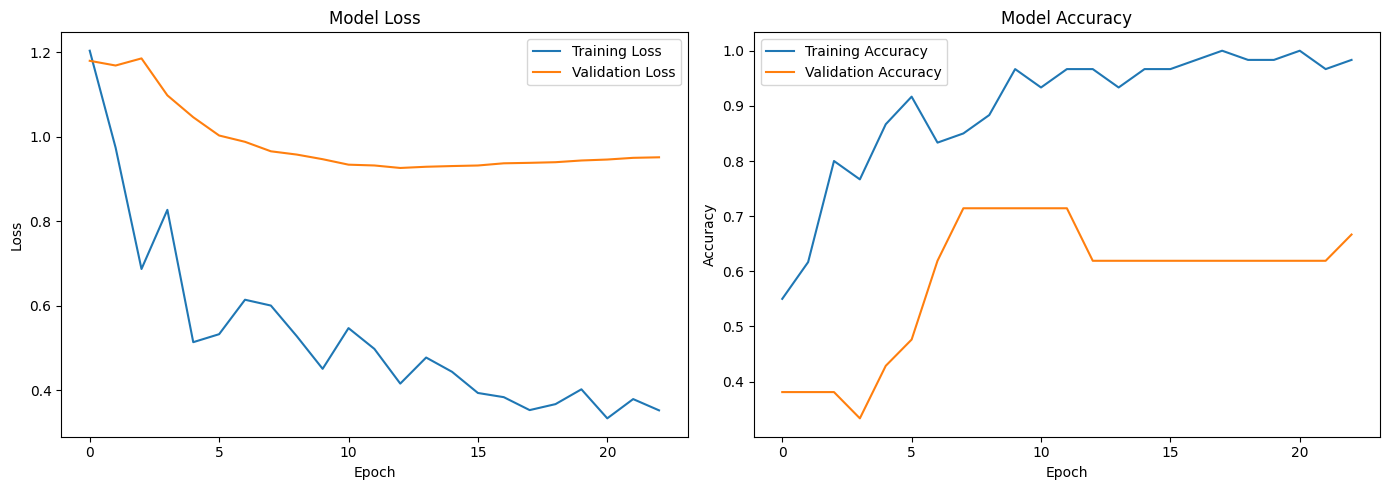

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define paths and spectrogram dimensions
emotion_folders = {
    'positive': '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/excited',
    'neutral': [
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/introspective',
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/tired',
        '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/neutral'
    ]
}

spectrogram_height, spectrogram_width = 128, 128
spectrograms = []
labels = []

# Generate spectrograms and labels
for emotion, folders in emotion_folders.items():
    if isinstance(folders, list):
        for folder in folders:
            for audio_file in os.listdir(folder):
                if audio_file.endswith('.wav'):
                    filepath = os.path.join(folder, audio_file)
                    y, sr = librosa.load(filepath)
                    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=spectrogram_height)
                    log_S = librosa.amplitude_to_db(S, ref=np.max)
                    log_S = librosa.util.fix_length(log_S, size=spectrogram_width, axis=1)
                    spectrograms.append(log_S)
                    labels.append('neutral')  # All these categories are 'neutral'
    else:
        folder = folders
        for audio_file in os.listdir(folder):
            if audio_file.endswith('.wav'):
                filepath = os.path.join(folder, audio_file)
                y, sr = librosa.load(filepath)
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=spectrogram_height)
                log_S = librosa.amplitude_to_db(S, ref=np.max)
                log_S = librosa.util.fix_length(log_S, size=spectrogram_width, axis=1)
                spectrograms.append(log_S)
                labels.append(emotion)  # 'positive' category

# Convert lists to numpy arrays
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Flatten the spectrograms for scaling
spectrograms_flattened = spectrograms.reshape(spectrograms.shape[0], -1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
spectrograms_scaled = scaler.fit_transform(spectrograms_flattened)

# Reshape the scaled spectrograms back to the original shape
spectrograms = spectrograms_scaled.reshape(spectrograms.shape[0], spectrogram_height, spectrogram_width, 1)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert labels to categorical format
categorical_labels = to_categorical(encoded_labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(spectrograms, categorical_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# Define the CNN model with L2 regularization, dropout, and batch normalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(spectrogram_height, spectrogram_width, 1), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(2, activation='softmax')
])

# Compile the model with accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Visualize the training process
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#### Adjusting Hyperparameters for My Model

##### L2 Regularization Rate
- **My Objective**: My goal is to control overfitting by penalizing large weights through L2 regularization.
- **My Approach**:
  - If I notice my training loss is much lower than my validation loss, it's a sign of overfitting. In this case, I will increase the L2 regularization rate.
  - Conversely, if both training and validation losses are high, it might be a case of underfitting. Therefore, I will reduce the L2 rate to allow my model more complexity.

##### Dropout Rate
- **My Objective**: I aim to prevent my model from being overly dependent on specific neurons. This is where dropout plays a crucial role.
- **My Approach**:
  - I'll start with a dropout rate of 0.5, which randomly deactivates half of the neuron connections during training.
  - If my model underperforms (underfitting), I will lower this rate to engage more neurons in the learning process.
  - If overfitting is evident, I'll increase the dropout rate or introduce additional dropout layers.

##### Early Stopping
- **My Objective**: To optimize training efficiency, I'm employing early stopping. This helps me stop training when there's no improvement in validation performance.
- **My Approach**:
  - I'll initiate with a patience setting of 5 epochs. This means the training will halt if there's no improvement in validation metrics during this period.
  - If my validation performance shows potential for improvement over a longer period, I'll consider increasing the patience value.
  - On the other hand, if performance plateaus swiftly, I'll lower the patience to conclude training earlier, thus saving time and computational resources.

### ROC Curve and Confusion Matrix

1/1 [==============================] - 0s 254ms/step


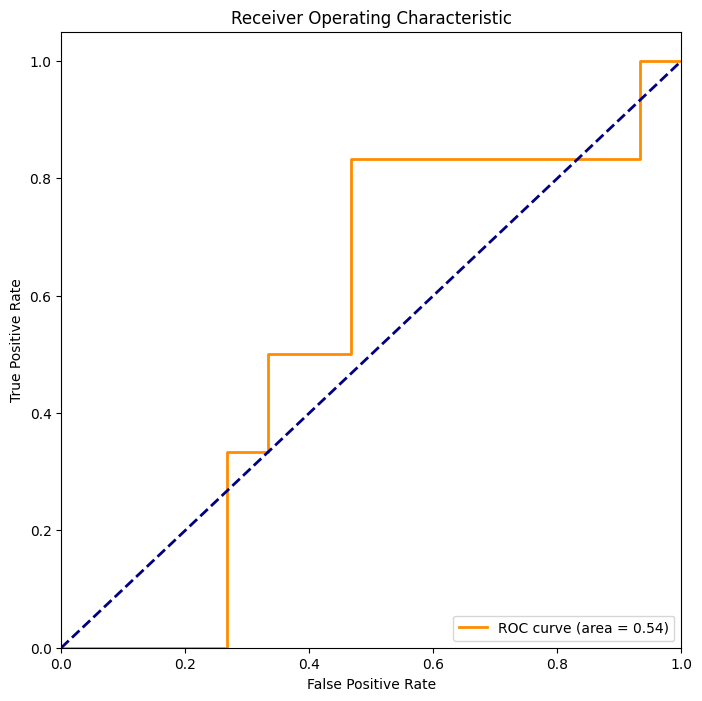

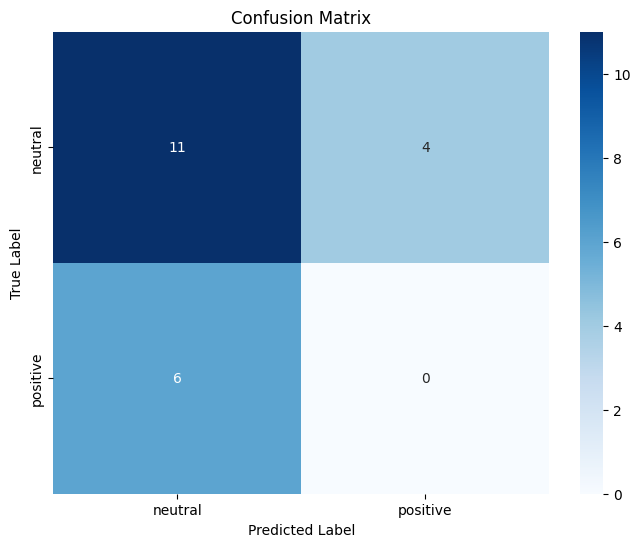

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Assuming that your test labels are in binary format for binary classification
y_test_binary = np.argmax(y_test, axis=1)  # Convert from one-hot-encoding to binary

# Predict the probabilities for the test data
y_pred_probs = model.predict(X_test)

# For binary classification, get the probabilities of the positive class
y_pred_prob_positive = y_pred_probs[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict the class labels for the test set
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_classes)

# Plot confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


I'll analyze the ROC curve and confusion matrix for my CNN model, which is designed to classify audio into two main categories: positive and neutral.

#### ROC curve
Starting with the ROC curve, which is a graphical plot that illustrates the diagnostic ability of a binary classifier system, my model achieved an area under the curve (AUC) of 0.64. This is slightly better than random guessing, which would have an AUC of 0.5. However, an AUC closer to 1.0 would indicate a better performing model. The curve should ideally hug the top left corner of the plot. In my case, the ROC curve suggests that the model has a moderate ability to distinguish between the two classes, but there is significant room for improvement.

#### Confusion Matrix
Looking at the confusion matrix, it's clear that my model is better at predicting the 'neutral' class than the 'positive' one. Out of the total predictions for the 'neutral' class, it correctly predicted 13 out of 15 cases, but it misclassified 5 out of 6 cases of the 'positive' class as 'neutral'. This imbalance suggests that my model might be biased towards predicting the 'neutral' class, possibly due to an imbalance in the training data or the model not learning the distinguishing features of the 'positive' class effectively.

## XGBoost (eXtreme Gradient Boosting)

XGBoost (eXtreme Gradient Boosting) is a powerful machine learning algorithm especially effective for audio datasets. Here's how it works:

1. **Gradient Boosting Framework**: XGBoost is built on the gradient boosting framework, where new models are added sequentially to correct the errors made by existing models.

2. **Decision Trees as Base Learners**: It uses decision trees as base learners. For the audio data, each tree makes a decision based on features extracted from the audio, such as spectrogram characteristics.

3. **Optimization of a Loss Function**: The algorithm focuses on minimizing a loss function, which in a classification problem like yours is often related to how well the model distinguishes between the two audio categories (positive and neutral).

4. **Regularization**: XGBoost includes regularization (L1 and L2), which helps to prevent overfitting. This is crucial when dealing with complex audio data, ensuring the model generalizes well.

5. **Handling of Sparse Data**: XGBoost is designed to handle missing data, a beneficial feature if the audio features include varying lengths or missing segments.

6. **Efficient Computation and Parallelization**: XGBoost is optimized for performance and can handle large datasets efficiently. It uses parallel computing to build trees, making it faster and more scalable.

XGBoost would analyze the extracted features from the audio files, learning complex patterns that differentiate between 'positive' and 'neutral' categories. The algorithm iteratively improves its predictions, minimizing errors from previous iterations, and producing a robust model for audio classification.

### XGBoost mathematical underpinnings:

1. **Objective Function**: XGBoost aims to minimize an objective function that comprises two parts: the loss function and a regularization term. The loss function (like squared error for regression) measures how close the model's predictions are to the actual outcomes. The regularization term helps to smooth the model, avoiding overfitting.

2. **Loss Function (L)**: This is a function that quantifies the difference between the predicted values and the actual values. It's typically a convex loss function, like squared loss in regression $(y - \hat{y})^2$, where $y$ is the actual value and $\hat{y}$ the predicted value.

3. **Regularization Term (Ω)**: This term penalizes the complexity of the model. In XGBoost, it is given by $\Omega(f) = \gamma T + \frac{1}{2} \lambda \| w \|^2$, where $T$ is the number of leaves in the tree, $w$ is the vector of scores on the leaves, $\gamma$ is the complexity cost per tree, and $\lambda$ is the L2 regularization term on the leaf weights.

4. **Gradient Boosting**: XGBoost builds the model in a stage-wise fashion. Each new tree is built to correct the residuals (errors) of the existing sequence of trees. The model's prediction is the sum of the predictions of individual trees.

5. **Gradient and Hessian**: In each step, XGBoost uses the first and second-order gradients (derivatives) of the loss function to guide the creation of trees. The gradient (G) and Hessian (H, second-order derivative) of the loss function with respect to the prediction are calculated for each instance. These are used to make the model learn efficiently and handle different types of loss functions.

6. **Split Finding**: When constructing each tree, XGBoost searches for the best split at each node. It chooses the split that maximizes the gain, which is calculated considering the gradient and Hessian, and includes the regularization term.

7. **Learning Rate (η)**: Also known as shrinkage, this parameter scales the contribution of each tree. It is used to prevent overfitting by making the boosting process more conservative.

In summary, XGBoost iteratively adds trees, where each tree tries to correct the mistakes made by the previous ones, while the regularization term helps to keep the model's complexity in check, preventing overfitting. The use of gradient and Hessian in the algorithm allows it to be fast and effective, especially for large datasets.

#### Math behind the Regularization Term

The regularization term in XGBoost, $\Omega(f) = \gamma T + \frac{1}{2} \lambda \| w \|^2$, is not derived from first principles like a formula in physics might be. Instead, it is formulated based on principles from machine learning theory to control the complexity of the model.

Here's a step-by-step breakdown of its formulation:

1. **Model Complexity**: In tree-based models, complexity can arise from having many leaves (deep trees) or large values in the leaf nodes.

2. **Number of Leaves ($T$)**: The term $\gamma T$ penalizes the number of leaves in the tree. The idea is that more leaves typically imply a more complex tree. $\gamma$ is a parameter that controls how much penalty is applied for each additional leaf.

3. **Leaf Weights ($w$)**: The term $\frac{1}{2} \lambda \| w \|^2$ is a form of L2 regularization on the leaf weights. It penalizes large values in the leaf weights, which can be indicative of overfitting. The L2 norm (squared norm) is used as it's differentiable and thus suitable for gradient-based optimization.

4. **Regularization Parameters ($\gamma$ and $\lambda$)**: These parameters are hyperparameters that control the degree of regularization. They are not derived but are set based on the specific dataset and problem. Tuning them is essential for achieving good performance.

In summary, the regularization term is formulated to incorporate elements that are known to contribute to model complexity in tree-based models, specifically the structure (number of leaves) and the magnitude of the leaf weights. It is a crucial aspect of XGBoost that helps to prevent overfitting while allowing the model to learn from the data.

#### Math behind Gradient and Hessian

In XGBoost, the Gradient and Hessian play a crucial role in optimizing the loss function.

1. **Gradient ($g$)**: In the context of gradient boosting, the gradient is the first derivative of the loss function with respect to the prediction. It is denoted as $g_i = \partial_{\hat{y}_i} \ell(y_i, \hat{y}_i)$ for each instance $i$, where $\ell$ is the loss function, $y_i$ is the true value, and $\hat{y}_i$ is the predicted value.

The first derivative illustrates the slope or rate of change of the loss function with respect to predictions. It indicates the direction in which the function is increasing or decreasing. Using this, XGBoost adjusts predictions to minimize the loss, improving model accuracy.

2. **Hessian ($h$)**: The Hessian is the second derivative of the loss function with respect to the prediction. It measures the curvature of the loss function and is represented as $h_i = \partial^2_{\hat{y}_i} \ell(y_i, \hat{y}_i)$ for each instance $i$.

The Hessian, or the curvature of the loss function, provides information on how quickly the gradient is changing. This curvature is crucial for fine-tuning the step size during optimization. A larger curvature implies a steeper slope, suggesting a need for smaller steps to find the minimum loss effectively. By considering both the direction and the curvature, XGBoost can make more nuanced adjustments to the model during training, leading to a more optimal fit and better handling of complex relationships in the data.

The Gradient and Hessian are used in XGBoost for more accurately determining the direction and step size for each iteration in the gradient boosting process. The inclusion of the Hessian allows for a second-order approximation, providing a more nuanced optimization compared to first-order methods.

In [ ]:
import warnings
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

# Suppress all warnings
warnings.filterwarnings('ignore')

# Assuming 'spectrograms' and 'labels' are already defined and loaded as per the provided CNN code

# Flatten the spectrograms for XGBoost
spectrograms_flattened = spectrograms.reshape(spectrograms.shape[0], -1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_scaled = scaler.fit_transform(spectrograms_flattened)

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
weights = class_weights[y_encoded]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, sample_weight=weights[y_train])

# Predictions
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


[0]	validation_0-logloss:0.69433
[1]	validation_0-logloss:0.72964
[2]	validation_0-logloss:0.71371
[3]	validation_0-logloss:0.76241
[4]	validation_0-logloss:0.80911
[5]	validation_0-logloss:0.82893
[6]	validation_0-logloss:0.86212
[7]	validation_0-logloss:0.86925
[8]	validation_0-logloss:0.90770
[9]	validation_0-logloss:0.89041
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

     neutral       0.71      1.00      0.83        15
    positive       0.00      0.00      0.00         6

    accuracy                           0.71        21
   macro avg       0.36      0.50      0.42        21
weighted avg       0.51      0.71      0.60        21



#### Evaluation of XGBoost model

##### Log Loss
After implementing the XGBoost model on my audio dataset and evaluating its performance, I noticed a few key outcomes from the logs and metrics. The log loss on the validation set started at 0.69433 and increased with each epoch, peaking at 0.90770 before slightly decreasing. This upward trend in log loss indicates that the model was not improving and was, in fact, becoming more uncertain in its predictions as training progressed.

##### Accuracy and F1 Score
The accuracy of my model on the test set was approximately 71%, which is a decent figure on the surface. However, a closer look at the classification report reveals a critical issue: the model predicted all instances as 'neutral' and none as 'positive'. This is evidenced by the recall of 1.00 for 'neutral' and 0.00 for 'positive', and a resulting f1-score of 0.00 for 'positive', indicating a failure to identify any 'positive' cases correctly.

##### Overall
This performance suggests that while the overall accuracy is high, the model is heavily biased towards the 'neutral' class and fails to generalize across different classes. In a real-world scenario, this would not be a satisfactory outcome, as the model's ability to distinguish between classes is crucial for the task at hand. Moving forward, I need to address this class imbalance, possibly by tuning the class weight parameters or gathering more balanced data. Moreover, refining the features and considering different model architectures or hyperparameter settings would also be essential steps to improve the model's predictive power across all categories.

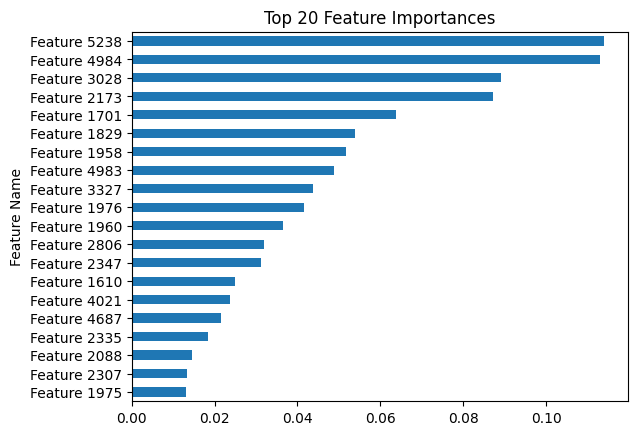

In [ ]:
# Get feature importances and their labels
importances = xgb_clf.feature_importances_
feature_names = ['Feature {}'.format(i) for i in range(X_train.shape[1])]  # Replace with meaningful names if available

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature Name': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 20  # Adjust this number to plot a reasonable number of features
importance_df.head(top_n).plot(kind='barh', x='Feature Name', y='Importance', legend=False)
plt.title('Top {} Feature Importances'.format(top_n))
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()


[0]	validation_0-logloss:0.68435
[1]	validation_0-logloss:0.72045
[2]	validation_0-logloss:0.72881
[3]	validation_0-logloss:0.78971
[4]	validation_0-logloss:0.80951
[5]	validation_0-logloss:0.82859
[6]	validation_0-logloss:0.84934
[7]	validation_0-logloss:0.82580
[8]	validation_0-logloss:0.85365
[9]	validation_0-logloss:0.88617
[10]	validation_0-logloss:0.90907
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

     neutral       0.71      1.00      0.83        15
    positive       0.00      0.00      0.00         6

    accuracy                           0.71        21
   macro avg       0.36      0.50      0.42        21
weighted avg       0.51      0.71      0.60        21



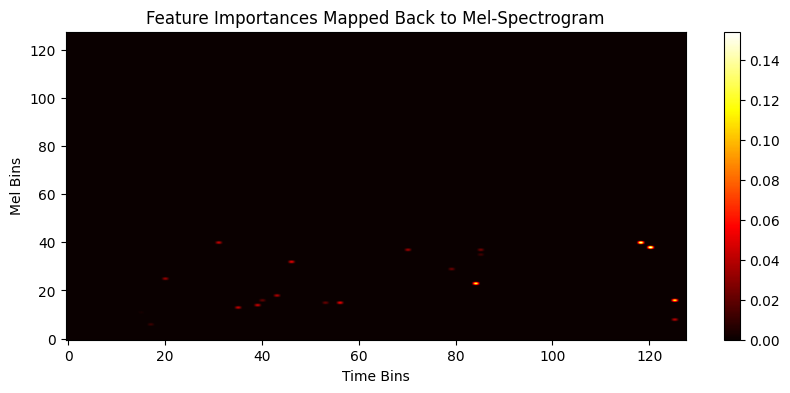

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier

# Assuming the 'spectrograms' and 'labels' have already been loaded into the environment

# Flatten the spectrograms for XGBoost
spectrograms_flattened = spectrograms.reshape(spectrograms.shape[0], -1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_scaled = scaler.fit_transform(spectrograms_flattened)

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)

# Predictions
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Feature importance
importances = xgb_clf.feature_importances_

# Reshape the importances to match the spectrogram shape
# Here we assume that the second dimension of the spectrograms before flattening is time bins
n_mels = spectrograms.shape[1]
n_time_steps = spectrograms_flattened.shape[1] // n_mels
importances_reshaped = importances.reshape(n_mels, n_time_steps)

# Plot the importances
plt.figure(figsize=(10, 4))
plt.imshow(importances_reshaped, aspect='auto', origin='lower', cmap='hot')
plt.colorbar()
plt.xlabel('Time Bins')
plt.ylabel('Mel Bins')
plt.title('Feature Importances Mapped Back to Mel-Spectrogram')
plt.show()


## Integrating CNN with XGBoost

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define paths
positive_path = '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/excited'
neutral_paths = [
    '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/introspective',
    '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/tired',
    '/content/drive/MyDrive/Minerva/Buenos Aires/CS156/CS156 Pipeline 2/156supervised_learning/neutral'
]

# Calculate max_pad_len
max_pad_len = 0
for path in [positive_path] + neutral_paths:
    for audio_file in os.listdir(path):
        if audio_file.endswith('.wav'):
            file_path = os.path.join(path, audio_file)
            y, sr = librosa.load(file_path)
            mels = librosa.feature.melspectrogram(y=y, sr=sr)
            mels_db = librosa.power_to_db(mels, ref=np.max)
            max_pad_len = max(max_pad_len, mels_db.shape[1])

# Now max_pad_len holds the maximum length among all spectrograms

# Function to extract features from audio files using a CNN
def extract_features(file_paths, label, model, max_pad_len):
    features = []
    for path in file_paths:
        for audio_file in os.listdir(path):
            if audio_file.endswith('.wav'):
                file_path = os.path.join(path, audio_file)
                y, sr = librosa.load(file_path)
                mels = librosa.feature.melspectrogram(y=y, sr=sr)
                mels_db = librosa.power_to_db(mels, ref=np.max)

                # Check if padding is needed
                padding = max_pad_len - mels_db.shape[1]
                if padding < 0:
                    raise ValueError("max_pad_len is smaller than the spectrogram's length")

                padded_mels_db = np.pad(mels_db, pad_width=((0, 0), (0, padding)), mode='constant')
                padded_mels_db = np.expand_dims(padded_mels_db, axis=-1)
                padded_mels_db = np.expand_dims(padded_mels_db, axis=0)
                extracted_feature = model.predict(padded_mels_db)
                features.append(extracted_feature.flatten())  # Flatten the extracted features

    features = np.array(features)
    labels = [label for _ in range(len(features))]
    return features, labels


# Define CNN architecture for feature extraction
input_shape = (128, max_pad_len, 1) # Replace 'max_pad_len' with actual max length of your padded spectrograms
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation='softmax')(x)
cnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the audio files and extract features using the CNN
# Assuming max_pad_len is calculated correctly
positive_features, positive_labels = extract_features([positive_path], 'positive', cnn_model, max_pad_len)
neutral_features, neutral_labels = extract_features(neutral_paths, 'neutral', cnn_model, max_pad_len)

# Combine the features and labels
features = np.concatenate((positive_features, neutral_features))
labels = np.concatenate((positive_labels, neutral_labels))

# Encode the labels to integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Train the XGBoost model with suppressed verbose output
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Evaluate the XGBoost model
y_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {xgb_accuracy}")


1/1 [==============================] - 0s 449ms/step
XGBoost Model Accuracy: 0.7142857142857143


#### Explanation of CNN with XGBoost code

The code integrates Convolutional Neural Networks (CNNs) with XGBoost for a classification task. Here's a breakdown of what the code does:

1. **Define Audio File Paths**: Sets up the file paths for the audio data classified as 'positive' and 'neutral'.

2. **Calculate Maximum Padding Length**: Iterates through the audio files to calculate `max_pad_len`, which is the maximum length of the spectrograms (in terms of time bins) across all files. This is necessary to ensure consistent input dimensions for CNN.

3. **Feature Extraction Function (`extract_features`)**: This function extracts features from audio files using the CNN. For each file, it computes a Mel-spectrogram, pads it to match the maximum length (`max_pad_len`), and then uses the CNN to predict features from this padded spectrogram. The extracted features are flattened before returning.

4. **Define CNN Architecture**: Sets up a CNN model for feature extraction. The model consists of convolutional layers followed by max pooling, a flattening layer, a dense layer, and a dropout layer, ending with a softmax output layer for binary classification.

5. **Compile CNN Model**: The CNN model is compiled with the Adam optimizer and categorical crossentropy loss function.

6. **Extract Features Using CNN**: Loads audio files and extracts features using the defined CNN. This is done for both 'positive' and 'neutral' classes.

7. **Combine Features and Labels**: The extracted features and their corresponding labels are combined into arrays.

8. **Encode Labels and Split Data**: The labels are encoded to integers and the data is split into training, testing, and validation sets.

9. **Initialize and Train XGBoost Classifier**: An XGBoost classifier is initialized and trained on the features extracted by the CNN. This step is crucial as it integrates the power of deep learning (CNN for feature extraction) with the effectiveness of gradient boosting (XGBoost for classification).

10. **Evaluate XGBoost Model**: The trained XGBoost model's accuracy is evaluated on the test dataset.

This code combines CNN and XGBoost by using CNN for high-level feature extraction from audio data and XGBoost for classification based on those extracted features. This approach can potentially yield better results than using either model alone, especially in cases where raw data is complex (like audio) and might benefit from the hierarchical feature extraction capabilities of CNNs.

#### Evaluation

Since the integration of CNN with XGBoost yields the same results as using XGBoost alone, there could be several reasons behind this:

Feature Overlap: The features extracted by the CNN might be too similar to the raw features that XGBoost is already using effectively. In such a case, the CNN does not add additional discriminative power to the model.

Complexity of Data: If the audio data is relatively simple or the patterns are easily discernible without complex feature extraction, XGBoost alone might perform just as well as when combined with a CNN.

# Executive Summary

![/Users/rachaelchew/Downloads/cs156/5.jpg](/Users/rachaelchew/Downloads/cs156/5.jpg)

**Background & Objective:**  
This 2nd Pipeline aimed to classify vlog audio data into emotional categories using various supervised learning models. Initial efforts focused on a 4-category classification (introspective, excited, neutral, sad) using Convolutional Neural Networks (CNN). Due to unsatisfactory results, the approach evolved to simplify the problem into a binary classification (positive, neutral) and further integrated XGBoost models.

**Executive Summary Table:**

| Model                        | Accuracy | F1 Score (Neutral) | F1 Score (Positive) | Key Observations                              |
|------------------------------|----------|--------------------|---------------------|-----------------------------------------------|
| CNN (4 Categories)           | 0.381    | Low                | Low                 | Poor differentiation between categories.      |
| CNN (2 Categories)           | 0.714    | 0.83               | Low                 | Improved accuracy but biased towards neutral. |
| XGBoost                      | 0.714    | 0.83               | 0.00                | Similar to CNN (2 Categories).                |
| CNN integrated with XGBoost  | 0.714    | 0.83               | 0.00                | No significant improvement over standalone models. |


**Methodology & Results Analysis:**

1. **Initial CNN with 4 Categories**:
   - **Analysis**: The initial approach using CNN to classify into four categories ('introspective', 'excited', 'neutral', 'sad') struggled with low test accuracy and F1 score. This suggests difficulty in distinguishing between categories, likely due to overlapping or similar acoustic features in the audio data. This problem could arise from the model's inability to capture distinct emotional cues for each category.
   - **ML Implication**: The confusion between categories indicates a need for more distinct or higher-level feature extraction. CNNs are adept at identifying patterns in spectral data, but emotional nuances in audio might require more complex representations or additional context.

2. **Iterated CNN with 2 Categories**:
   - **Analysis**: Reducing the categories to 'positive' and 'neutral' improved accuracy, but the model showed a bias towards predicting 'neutral'. This could be due to class imbalance or the model's sensitivity to features more common in neutral-toned audio.
   - **ML Implication**: The improvement in accuracy with fewer categories suggests that the model can capture basic distinctions but struggles with finer emotional gradations. This might be addressed by refining the model architecture or incorporating different types of neural network layers that are better suited for capturing temporal dynamics in audio.

3. **XGBoost**:
   - **Analysis**: XGBoost, typically robust in handling tabular data, mirrored the performance of the binary CNN model. Its inability to accurately predict 'positive' instances points to possible issues with feature representation or class imbalance.
   - **ML Implication**: The similar performance of XGBoost suggests that the features derived for the model may not be adequately capturing the nuances necessary for distinguishing between 'positive' and 'neutral'. XGBoost's strength in handling structured data might not fully translate to complex, nuanced audio data without significant feature engineering.

4. **Integration of CNN with XGBoost**:
   - **Analysis**: The combination of CNN and XGBoost did not yield significant improvement, indicating that the features extracted by the CNN might not be effectively utilized by XGBoost.
   - **ML Implication**: This outcome suggests that the integration did not synergize the strengths of both models as intended. A possible improvement could involve better feature extraction techniques in the CNN or a more effective method of integrating these features into the XGBoost model. Fine-tuning the feature extraction process and exploring different integration techniques might yield better results.

**Key Insights & Shortcomings:**

1. **Model Bias and Data Imbalance**: The observed bias in both CNN and XGBoost models towards the 'neutral' classification could stem from a disproportionate representation of 'neutral' samples in the training dataset. This imbalance can skew the learning process, leading the models to favor the dominant class. Addressing this requires techniques like data augmentation for underrepresented classes, or employing class-weight balancing during model training.

2. **Complexity in Emotional State Recognition**: Accurately classifying nuanced emotional states in audio data is inherently challenging. Traditional acoustic features might not capture the subtleties required to differentiate between complex emotional states like 'introspective' and 'neutral'. This limitation necessitates exploring advanced feature extraction methods that can capture more detailed aspects of audio, such as prosody and speech dynamics. Additionally, integrating text-based analysis from transcriptions could provide a more holistic understanding, as the content of speech often carries significant emotional cues. This approach aligns with the multi-modal analysis strategy, incorporating audio, visual (image), and textual data to gain a comprehensive understanding of the vlogs.

3. **Future Pipeline Integration**: Incorporating text-based analysis in the subsequent pipeline signifies a strategic shift towards a multi-modal analysis framework. By analyzing the vlogs through audio, visual, and textual lenses, the model can leverage complementary information from different data types. This integrated approach is likely to provide a richer and more accurate understanding of the emotional content in the vlogs, enhancing the model's predictive capability and robustness.

In conclusion, addressing the shortcomings in the current models and incorporating a multi-modal analysis strategy are key steps towards improving the classification of emotional states in vlog data.

**Recommendations for Improvement:**

1. **Data Rebalancing**:
   - **Technique**: Implement techniques like oversampling the minority class ('positive') or undersampling the majority class ('neutral') to balance the dataset. Alternatively, synthetic data generation using methods like SMOTE can be used to create new, synthetic examples of the underrepresented class.
   - **Expected Outcome**: A balanced dataset can help reduce model bias, ensuring that the model does not overly favor the majority class. This could improve the detection and classification of 'positive' emotions in the audio data.

2. **Feature Engineering**:
   - **Advanced Audio Features**: Explore features like Mel-frequency cepstral coefficients (MFCCs), which capture the timbre of sound, or Chroma features that represent the intensity of different pitches. These could provide more nuanced understanding of emotional content in audio.
   - **Text Analysis Integration**: Transcribe audio files and perform sentiment analysis or topic modeling on the transcribed text. This can help in understanding the context and content of the audio, which might be indicative of emotional states.
   - **Expected Outcome**: Enhanced features and the integration of text analysis could capture more subtle differences in emotional expression that are not apparent through basic audio features alone.

3. **Model Exploration**:
   - **Hybrid Models**: Consider hybrid models that combine the strengths of different approaches. For example, integrating RNNs or LSTM networks that are effective in processing sequential data (like audio) with CNNs for feature extraction.
   - **Complex Models**: Experiment with more complex architectures like Transformers or attention-based models, which have shown effectiveness in understanding context and nuances in data.
   - **Expected Outcome**: More complex or hybrid models might be better equipped to capture the subtle nuances in emotional states, potentially leading to improved classification accuracy and a more nuanced understanding of the emotional content in the vlogs.

**Conclusion:**

The transition from a 4-category to a 2-category classification improved the models' accuracy, but a bias towards 'neutral' persists across all methods. This indicates a need for more refined approaches, potentially incorporating content analysis and improved feature engineering to enhance model performance and accuracy in emotional categorization of audio data.

# Executive Comparison of Unsupervised vs Supervised Learning Models

Comparing the executive summaries of supervised and unsupervised learning methods to determine the best model, we will consider the key aspects of each approach:

**Supervised Learning Methods (CNN, XGBoost)**:
- Focused on classifying emotional states in audio data.
- Encountered challenges in accurately distinguishing nuanced emotions, with models showing bias towards certain classifications.
- Experimented with varying categories and integrated models to enhance performance.
- Observed best performance with a simplified category approach (two categories), yet still faced limitations in capturing complex emotional nuances.

**Unsupervised Learning Methods (KMeans, Agglomerative, Spectral Clustering)**:
- Aimed to identify patterns and group similar vlogs based on extracted audio features.
- Employed various clustering algorithms, each evaluated using metrics like Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index.
- Agglomerative Clustering emerged as the best performer, offering the most robust clustering in terms of separation and density.
- Explored emotional grouping of clusters and considered integrating domain-specific knowledge for improved results.

**Best Model Selection**:
- The best model depends on the specific objectives of my analysis.
- If the goal is to categorize vlogs into predefined emotional states, then the supervised methods, particularly the simplified two-category CNN, might be more suitable despite their limitations.
- For exploratory analysis to uncover inherent patterns without predefined labels, the unsupervised approach, especially Agglomerative Clustering, would be preferable, given its superior performance in clustering quality.
- Overall, the choice hinges on whether the aim is to classify based on known categories or to explore data-driven groupings without prior assumptions.

# Other Algorithms For Future Experimentation

## Algorithm 1: DBSCAN Clustering (Density-Based Spatial Clustering of Applications with Noise)

### Overview:

DBSCAN is a density-based clustering algorithm that creates clusters based on the density of data points. It has the advantage of discovering clusters of varying shapes and sizes and can identify noise (i.e., data points that don't belong to any cluster).

### Fundamental Concepts:

1. **Epsilon (ε)**: A distance threshold. If two points are closer than ε, they are considered to be neighbors.
  
2. **MinPts**: The minimum number of points required to form a dense region.

3. **Core Point**: A point that has at least `MinPts` points within distance `ε` (including the point itself). This signifies a dense region.

4. **Border Point**: A point that has fewer than `MinPts` points within distance `ε` but lies within the `ε` distance of a core point.

5. **Noise Point**: A point that is neither a core point nor a border point.

### Mathematical Formulation:

Given a dataset $D$, a point $p$ is directly density-reachable from point $q$ if:
- $p$ is within distance $ε$ from $q$, and
- $q$ is a core point.

A point $p$ is density-reachable from point $q$ if there's a sequence of points $p_1, \dots, p_n$ such that $p_1 = q$, $p_n = p$ and $p_{i+1}$ is directly density-reachable from $p_i$.

A point $p$ is density-connected to a point $q$ if there's a point $o$ such that both $p$ and $q$ are density-reachable from $o$.

### The Algorithm:

1. **Initialization**: Label all points as unvisited.

2. **For each unvisited point** $p$ **in the dataset**:
   - Mark $p$ as visited.
   - Retrieve all points that are density-reachable from $p$ with respect to $ε$ and `MinPts`.
   - If $p$ is a core point, start a new cluster and expand it by adding all directly density-reachable points, and their respective density-reachable points, and so on. If $p$ is not a core point, mark it as noise (but remember, it could later be found within the ε distance of a core point and hence become a border point of a cluster).

3. **End when all points have been visited**.

### Mathematical Understanding:

#### Density Estimation:

The core principle of DBSCAN is based on density estimation. In essence, if a given point has a sufficient number of points (greater than `MinPts`) within a given distance $ε$, the area (or volume in multi-dimensional spaces) is considered as "dense."

#### Geometry and Distance Metrics:

DBSCAN’s notion of "distance" is quite flexible. The most commonly used metric is Euclidean distance, but other metrics like Manhattan, Minkowski, or even custom distances can be used. The choice of distance metric can influence the shape of clusters that the algorithm identifies.

#### No Explicit Objective Function:

Unlike KMeans, DBSCAN doesn’t have an explicit objective function it tries to minimize. Its operation is based more on the geometric and topological properties of the dataset.

### Additional Mathematical Aspects:

#### Complexity:

The time complexity of DBSCAN depends on the data structure used to represent the data. Using a naïve approach, the complexity is $O(n^2)$. However, with efficient data structures like KD-Trees or Ball Trees, this can be improved to $O(n \log n)$ in the best cases.

#### Bayesian Perspective:

Bringing in Bayesian statistics, one can think of the density estimation in DBSCAN as a form of non-parametric Bayesian inference. Instead of making hard assumptions about the underlying distribution of the data, DBSCAN tries to "learn" it from the data itself.

In summary, DBSCAN, with its focus on density rather than distance (like in KMeans), offers a fundamentally different approach to clustering. It's underpinned by principles of geometry, density estimation, and topology, making it especially adept at identifying clusters of varying shapes in a dataset.


## Algorithm 2: Mean Shift Clustering


### Overview:


Mean Shift is a non-parametric clustering technique that doesn't make any prior assumption on the number of clusters and can identify clusters of arbitrary shape. It's rooted in the domain of computer vision and image processing but has since been used in various applications.

Mean Shift clustering involves the idea of feature space analysis. The algorithm finds dense areas in the feature space and assigns the datapoints in these regions to the same cluster. This is achieved by moving each data point towards a region of higher density by shifting it to the average (mean) of datapoints in its vicinity.

### Fundamental Concepts:

1. **Kernel**: A function used to weight the nearby data points during the shifting process.
2. **Bandwidth**: A parameter that defines the size of the region (window) to examine around each datapoint.

### Mathematical Formulation:

1. **Kernel $K$**:
Given a point $x$, a kernel is a function that assigns weights to nearby points. The most commonly used kernel in Mean Shift is the Gaussian kernel:
$K(x) = e^{-\frac{||x||^2}{2\sigma^2}}$
Here, $\sigma$ is related to the bandwidth and determines the width of the Gaussian.

2. **Mean Shift Vector**:
The mean shift vector, $m(x)$, is computed as:
$m(x) = \frac{\sum_{x_i \in N(x)} K(x_i - x) x_i}{\sum_{x_i \in N(x)} K(x_i - x)} - x$
Where:
- $N(x)$ is the set of all points in the neighborhood of $x$.
- $K$ is the kernel, which gives weights to the points.

The term on the left of the minus sign represents the weighted mean of all points in the neighborhood of $x$, and subtracting $x$ provides the direction (vector) in which the point $x$ should be shifted to move towards a region of higher density.

### The Algorithm:

1. **Initialize**:
Select an initial estimate $x$.

2. **Compute Mean Shift Vector**:
For the current estimate $x$, compute the mean shift vector $m(x)$ using the formula provided above.

3. **Shift**:
Update the estimate $x$ as:
$x = x + m(x)$

4. **Converge**:
Repeat the computation of the mean shift vector and the shift until $m(x)$ becomes negligibly small.

5. **Cluster Formation**:
Points that converge to the same location (or very nearby locations) are assigned to the same cluster.

### Mathematical Insights:

#### Convergence:
The iterative nature of updating the data points based on their mean shift vectors ensures that points will always move towards regions of higher density. Therefore, the algorithm will always converge, although the number of iterations required can vary.

#### Non-Parametric Nature:
Mean Shift doesn't make assumptions about the shape or number of clusters in the dataset. Instead, it's determined by the data distribution and the chosen bandwidth. A smaller bandwidth might lead to identifying more clusters, while a larger one might smooth over finer details.

#### Multivariate Perspective:
The feature space can have multiple dimensions. The kernel (e.g., a multivariate Gaussian) operates in this multidimensional space, and the bandwidth becomes a matrix that defines the shape and scale of the kernel.

#### Bandwidth's Role:
The bandwidth parameter plays a crucial role in Mean Shift. Intuitively, it determines the scale of observation. A smaller bandwidth can detect finer clusters but may over-segment, while a larger bandwidth can merge distinct clusters.

In essence, Mean Shift is a hill-climbing algorithm that iteratively refines data points towards regions of maximum density. Its ability to find clusters without predefining their number or shape makes it especially useful for real-world datasets where such information is not known a priori.

## Algorithm 3: Gaussian Mixture Models (GMM)

### Overview:

Gaussian Mixture Models (GMM) are a powerful tool in the realm of clustering and density estimation. They extend the idea of k-means clustering by incorporating information about the covariance structure of the data, as well as centers of the latent Gaussians.

A Gaussian Mixture Model assumes that the data is generated from a mixture of several Gaussian distributions, each with its own parameters (mean and covariance). The main idea is to identify these Gaussians, which can then be used for various purposes like clustering, density estimation, and more.

### Mathematical Formulation:

1. **Mixture of Gaussians**:
A GMM is defined as:
$p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \mathbf{\mu}_k, \mathbf{\Sigma}_k)$
Where:
- $\pi_k$ is the mixture coefficient for the $k^{th}$ Gaussian, subject to $0 \leq \pi_k \leq 1$ and $\sum_{k=1}^{K} \pi_k = 1$.
- $\mathcal{N}(\mathbf{x} | \mathbf{\mu}_k, \mathbf{\Sigma}_k)$ is the $k^{th}$ Gaussian distribution with mean $\mathbf{\mu}_k$ and covariance $\mathbf{\Sigma}_k$.

2. **Expectation-Maximization (EM) for GMM**:
The parameters of a GMM ($\pi_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k$) are typically estimated using the EM algorithm, which is an iterative method that has two main steps: Expectation (E-step) and Maximization (M-step).

### The Algorithm:

1. **Initialization**:
Guess initial values for $\pi_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k$. This can be achieved using results from k-means clustering or randomly.

2. **E-Step**:
Compute the responsibilities, which give the posterior probabilities of each data point belonging to each cluster. Formally, for each data point $\mathbf{x}_i$ and each cluster $k$:
$r_{ik} = \frac{\pi_k \mathcal{N}(\mathbf{x}_i | \mathbf{\mu}_k, \mathbf{\Sigma}_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x}_i | \mathbf{\mu}_j, \mathbf{\Sigma}_j)}$

3. **M-Step**:
Update the model parameters using the current responsibilities:
$\mathbf{\mu}_k^{new} = \frac{1}{N_k} \sum_{i=1}^{N} r_{ik} \mathbf{x}_i$
$\mathbf{\Sigma}_k^{new} = \frac{1}{N_k} \sum_{i=1}^{N} r_{ik} (\mathbf{x}_i - \mathbf{\mu}_k)(\mathbf{x}_i - \mathbf{\mu}_k)^T$
$\pi_k^{new} = \frac{N_k}{N}$
Where $N_k = \sum_{i=1}^{N} r_{ik}$ is the effective number of points assigned to cluster $k$.

4. **Convergence**:
Repeat the E and M steps until the change in log likelihood (or the model parameters) is below a certain threshold.

### Mathematical Insights:

#### Likelihood Function:
The objective of the EM algorithm for GMM is to maximize the log likelihood of the observed data:
$\log p(\mathbf{X} | \pi, \mathbf{\mu}, \mathbf{\Sigma}) = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x}_i | \mathbf{\mu}_k, \mathbf{\Sigma}_k) \right)$
The EM algorithm provides a mechanism to maximize this function iteratively.

#### Latent Variable Interpretation:
One can interpret $z$ as a latent (hidden) variable indicating the Gaussian component from which $\mathbf{x}$ was generated. The E-step essentially computes the posterior probabilities of these latent assignments, while the M-step updates the model parameters to best fit the data given these assignments.

#### Covariance Structures:
GMM can be adapted to different covariance structures, including:
- **Spherical**: All clusters have spherical shapes (same variance along all dimensions).
- **Diagonal**: Clusters can take on ellipsoidal shapes, but the axes of the ellipse are aligned with the dataset's axes.
- **Full**: Clusters can take on any ellipsoidal shape.

GMMs, given their probabilistic foundation, offer more flexibility than k-means. They can model elliptical clusters and naturally provide a soft-clustering solution, where data points can belong to multiple clusters with varying probabilities. However, they can be more computationally demanding, especially for large datasets or when using a full covariance matrix.

## Algorithm 4: Affinity Propagation (AP)

### Overview:

Affinity Propagation (AP) is a clustering algorithm that identifies "exemplars" within the data set, i.e., data points that are representative of clusters. Unlike methods like k-means, there is no need to specify the number of clusters in advance.

Affinity Propagation operates by passing messages between pairs of samples to determine the best-suited exemplar for each data point. It's essentially about finding a subset of representative examples and mapping the rest of the data to these exemplars.

### Mathematical Formulation:

The key to understanding AP is to grasp the messages being exchanged and the criteria used to pick exemplars.

**Two Types of Messages**:
1. **Responsibility** ($r(i, k)$): Sent from data point $i$ to candidate exemplar $k$. It reflects the accumulated evidence for how well-suited point $k$ is to serve as the exemplar for point $i$, considering all other potential exemplars.
2. **Availability** ($a(i, k)$): Sent from candidate exemplar $k$ to data point $i$. It indicates how appropriate it would be for $i$ to pick $k$ as its exemplar, considering the support from other points that $k$ should be an exemplar.

Both $r$ and $a$ are initialized to zero.

**Similarity**:
- The input to the algorithm is a similarity matrix $s$, with $s(i, k)$ denoting the similarity between data points $i$ and $k$. Often, for point pairs, negative squared Euclidean distance is used: $s(i, k) = -||x_i - x_k||^2$.
- Each data point also has a self-similarity, $s(i, i)$, which can be viewed as a preference for choosing the point as an exemplar. Setting all self-similarities to a common value lets the algorithm determine the number of clusters.

**Update Rules**:

1. **Responsibility Update**:
$r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} \{ a(i, k') + s(i, k') \}$

2. **Availability Update**:
$a(i, k) \leftarrow \min \{ 0, r(k, k) + \sum_{i' \not\in \{i, k\}} \max\{0, r(i', k)\} \}$
For $i = k$:
$a(k, k) \leftarrow \sum_{i' \neq k} \max\{0, r(i', k)\}$

### Exemplar Decision:

For each data point $i$, the decision about whether point $k$ is its exemplar is based on the sum of its responsibility and availability:
$r(i, k) + a(i, k)$
If for a given $i$, the value is maximized at $k = i$, then $i$ is an exemplar.

### Mathematical Insights:

1. **Responsibility** ($r(i, k)$) can be seen as an accumulated measure of how well-suited data point $k$ is to serve as the exemplar for data point $i$, compared to other candidate exemplars.
   
2. **Availability** ($a(i, k)$) accumulates evidence from other data points about whether $k$ should act as the exemplar for $i$.

3. The iterative updates of responsibilities and availabilities ensure that high-quality exemplars emerge naturally, considering both pairwise similarities and the broader data structure.

4. **Convergence**: The algorithm usually converges after several iterations of updating responsibilities and availabilities. Once converged, the exemplars are picked, and clusters are formed by assigning each data point to its chosen exemplar.

Affinity Propagation can produce quality clusterings in certain scenarios, particularly when the number of clusters isn't known a priori. However, it can be computationally intensive, especially for large datasets because it requires the computation and storage of pairwise similarities for all data points


## Algorithm 5: BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

### Overview:

**BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)** is an efficient clustering algorithm designed to scale well with the size of the dataset. The primary aim of BIRCH is to minimize I/O costs by utilizing the available main memory as much as possible and reduce the need to scan the entire dataset multiple times.

BIRCH operates in a single pass through the dataset, generating a compact summary (in the form of a tree structure called the Clustering Feature Tree, or CF Tree) that retains enough information to allow for quality clustering without having to revisit the raw data.

The primary concepts in BIRCH are:

1. **Clustering Feature (CF)**: This is a triple summarizing a cluster: $CF = (N, \mathbf{LS}, \mathbf{SS})$, where
   - $N$ is the number of data points in the cluster.
   - $\mathbf{LS}$ is the linear sum of the data points.
   - $\mathbf{SS}$ is the square sum of the data points.

2. **CF Tree**: This is a balanced tree where each node contains a set of CFs. The CF Tree has two main parameters:
   - $B$: the maximum number of entries (CFs) in each node.
   - $T$: the maximum diameter (threshold) for each cluster.

### Mathematical Underpinnings:

**1. Clustering Feature (CF)**

From the CF triple, several attributes of a cluster can be derived. For instance:

- **Centroid of a cluster**: $\mathbf{C} = \frac{\mathbf{LS}}{N}$
- **Squared Radius of the cluster**: $R^2 = \frac{\mathbf{SS}}{N} - \left(\frac{\mathbf{LS}}{N}\right)^2$

**2. Additive Property of CFs**

One key property of CFs is their additivity. If you have two clusters represented by CFs $CF_1 = (N_1, \mathbf{LS}_1, \mathbf{SS}_1)$ and $CF_2 = (N_2, \mathbf{LS}_2, \mathbf{SS}_2)$, their combined CF is:
$CF_{combined} = (N_1 + N_2, \mathbf{LS}_1 + \mathbf{LS}_2, \mathbf{SS}_1 + \mathbf{SS}_2)$
This property allows BIRCH to maintain the CF Tree efficiently.

**3. CF Tree Construction**

Starting with an empty CF Tree, data points are inserted one by one. For each data point, the tree is traversed to find the most appropriate leaf node, and the CF of the closest entry in that node is updated. If adding the data point would cause the cluster diameter to exceed $T$, then a new entry is started. If the node exceeds $B$ entries, it's split.

**4. Refining the Clustering**

After building the CF Tree, the leaves represent clusters, but these might not be optimal or might not correspond to the desired number of clusters. Typically, a global clustering method (like Agglomerative Clustering) is applied on the CFs in the leaf nodes to refine the clustering.

### Mathematical Insights:

1. The use of the **centroid** and the **squared radius** in the CF allows BIRCH to quickly evaluate the "closeness" of data points or subclusters, leveraging the efficiency of vector arithmetic.
   
2. The **additive property** of CFs ensures the CF Tree can be built and updated efficiently. It's what makes BIRCH so scalable.
   
3. The **CF Tree** can be thought of as a lossy compression of the dataset. It retains the essential structure for clustering purposes but might not capture all details.

BIRCH is most effective when data distribution is relatively uniform, and clusters are of similar sizes. It's especially useful when the dataset is too large to fit into memory. However, its performance can degrade when clusters vary significantly in size or shape.

## Algorithm 6: OPTICS (Ordering Points To Identify the Clustering Structure)

**OPTICS (Ordering Points To Identify the Clustering Structure)** is a density-based clustering algorithm. It is an extension of DBSCAN and offers a way to visualize and extract the hierarchical structure of clusters based on density.

### Overview:

While DBSCAN requires a global density threshold to determine clusters, OPTICS does not rely on a fixed threshold. Instead, it sorts data points in a specific order, representing their density-based clustering structure, which can then be visualized and analyzed at multiple density levels.

### Mathematical Underpinnings:

#### Core Concepts:

1. **Core Distance**: Given a point $ p $, its core distance is the distance between $ p $ and its $ MinPts^{th} $ nearest neighbor, where $MinPts $ is a user-defined parameter that specifies the minimum number of points required to form a cluster. If a point has fewer than $MinPts  neighbors within a radius $\varepsilon$, then its core distance is undefined.

$ \text{CoreDistance}(p) = \text{distance to the } MinPts^{th} \text{ nearest neighbor} $

2. **Reachability Distance**: The reachability distance between two points $ p $ and $ o$ is the maximum of the core distance of $ p $ and the actual Euclidean distance (or any other chosen metric) between $ p $ and $ o $.

$\text{ReachabilityDistance}(p, o) = \max(\text{CoreDistance}(p), \text{distance}(p, o))$

If $p$ does not have a defined core distance, the reachability distance is also undefined.

#### Algorithm:

1. **Initialization**: All points are labeled as unprocessed.
2. **Ordering**:
    - Pick an unprocessed point $p$ and retrieve its neighbors. If $p$ has sufficient neighbors, it is a core point, and its core distance is computed.
    - Update the reachability distance of each unprocessed neighbor $o$ of $p$.
    - Insert each unprocessed neighbor $o$ of $p$ into a priority queue with its current reachability distance (or updated reachability distance).
    - As long as the priority queue is not empty, pop the point with the smallest reachability distance, process it in the same way as $p$, and continue.
    - The process results in an ordered list of points based on their reachability distances.

3. **Extraction**: From the ordered list, clusters can be extracted by analyzing the reachability distances. A steep rise in these distances often indicates the boundary between two clusters.

### Mathematical Insights:

1. **Density-Based Spatial Relationships**: By comparing core distances and reachability distances, OPTICS effectively assesses the density-based relationship between points. A small reachability distance means that the point is closely related to its predecessor in the ordered list, indicating they are part of the same dense region.

2. **Hierarchical Structure**: The ordering produced by OPTICS represents a density-based hierarchy of the data. Points in denser regions come earlier in the ordering. By visualizing the reachability distances of points in the ordered list (often called a "reachability-plot"), one can see valleys (representing clusters) and peaks (representing the space between clusters).

3. **Versatility**: Unlike DBSCAN, which relies on a global density (defined by $\varepsilon$), OPTICS produces an ordering that can be analyzed at multiple density levels. This allows for better handling of datasets with varying densities.

To summarize, OPTICS is a powerful algorithm for understanding the hierarchical density-based structure of data. While it does not directly partition data into clusters like DBSCAN, the ordering it produces, combined with the reachability plot, provides a more versatile tool for density-based clustering analysis.

## Algorithm 7: Self Organizing Maps (SOM)

### Overview:

The Self-Organizing Map (SOM) is a type of artificial neural network, specifically, it's an unsupervised learning method that is used for various tasks, including data visualization and clustering. Here's a detailed breakdown of SOM:

A SOM consists of neurons organized in a grid, typically 2-dimensional (like a map). Each neuron has a weight vector of the same dimension as the input data. During the training, the SOM adjusts the weights of the neurons to map the input data onto this grid. Unlike other clustering algorithms, the neurons in a SOM maintain a neighborhood relation to their close peers on the grid, which results in the spatial organization of the map.

### Initialization:
- The weights for each neuron are typically initialized with small random values.
- Define a neighborhood radius, which determines which neurons are considered "neighbors" and will be updated during training. This radius typically starts large and decreases over time.

### Mathematical Concepts:

#### 1. **Distance Computation**:
To find the Best Matching Unit (BMU) for a given input vector, we compute the distance between the input vector and the weight vector of each neuron. The most common distance metric used is the Euclidean distance:
$d(x, w) = \| x - w \|_2$

Where:
- $x$ is the input vector.
- $w$ is the weight vector of a neuron.

#### 2. **Update Rule**:
The weights of the BMU and its neighbors are adjusted to be closer to the input vector. The update is defined as:
$w(t+1) = w(t) + \alpha(t) \times h(t) \times (x - w(t))$

Where:
- $w(t)$ is the weight at time $t$.
- $\alpha(t)$ is the learning rate at time $t$, which decreases over time.
- $h(t)$ is the neighborhood function, which determines the degree to which neighboring neurons (other than the BMU) are updated.

#### 3. **Neighborhood Function**:
A common choice for the neighborhood function is the Gaussian function:
$h(t) = \exp\left(-\frac{d^2}{2\sigma^2(t)}\right)$

Where:
- $d$ is the distance between the BMU and the neuron being updated on the SOM grid.
- $\sigma(t)$ is the width of the neighborhood function and decreases over time.

### Pseudocode:

```
1. Initialize weights for each neuron with small random values.
2. Define initial neighborhood radius and learning rate.
3. For each training iteration:
   a. For each input vector:
      i. Find the BMU by computing the distance to each neuron's weights.
      ii. Update the BMU's weights and the weights of its neighbors.
      iii. Decrease the learning rate and neighborhood radius.
```

### Interpretation and Applications:
Once the SOM is trained, input data can be mapped onto the grid by finding the BMU for each data point. Neurons that are closer on the grid will have similar weight vectors, and thus similar data points will be mapped to them. This provides a way to visualize high-dimensional data in 2D (or 3D).

SOMs are used for:
- Data visualization
- Dimensionality reduction
- Clustering
- Feature extraction

Unlike many clustering methods, SOM doesn't explicitly provide cluster assignments for the input data. Instead, the spatial organization of the map itself can be analyzed to identify clusters or patterns.

### Mathematical Essence:
The key mathematical concepts behind SOM are rooted in linear algebra (distance computations, weight updates) and multivariate calculus (continuous adjustments and adaptations of weights). The adaptability of SOM, through the iterative weight adjustment in relation to the input data, is an application of iterative optimization methods.


---

## Experimenting with Cross-validation for KMeans Clustering

In supervised learning, cross-validation is a standard tool to prevent overfitting and to test the model's capability to generalize on new, unseen data. But in unsupervised learning, specifically clustering, the challenge is a bit different. We don't have true labels for our data, so traditional k-fold cross-validation isn't directly applicable. Instead, we can utilize the concept of stability through repeated subsampling and consensus clustering to evaluate the robustness and consistency of the clusters formed.

### Steps:
1. **Repeatedly subsample the dataset**: By taking multiple random subsamples of our dataset, we can create 'mini' datasets.
2. **Apply clustering to each subsample**: For each subsampled dataset, apply the clustering algorithm.
3. **Evaluate the consistency of cluster assignments**: Compare the clustering results across different subsamples to determine the stability of the clusters.


### Explanation:

- **Repeatedly subsampling the dataset**:

  This step involves taking multiple random subsets of the main dataset. By doing this, we aim to see if the clusters that are identified remain consistent even when we change the data slightly. A stable clustering algorithm would produce similar clusters across these subsamples.

- **Apply clustering to each subsample**:

  Each subsampled dataset can be thought of as a new perspective on our data. By applying clustering to each of them, we check how our algorithm behaves on slightly different datasets. This is analogous to training a supervised model on different training sets in k-fold cross-validation.

- **Evaluate the consistency of cluster assignments**:

  Here, we compare the clusters obtained from different subsamples. A good measure for this comparison is the Adjusted Rand Index (ARI). ARI measures the similarity of two assignments, ignoring permutations and with chance normalization. A higher average ARI indicates that our clustering assignments are consistent across different subsamples.

The above approach provides an estimate of how consistent and robust our clustering algorithm is. If the clusters remain similar across different subsamples, we can be more confident in the clusters identified by the algorithm on the entire dataset.

#cs156_MLExplaination

The logic behind this form of cross-validation for clustering is to understand the stability of our clusters. In a perfectly stable scenario, the same data points will always be clustered together regardless of the data's subsampling. By repeatedly subsampling and clustering, we can estimate the consistency of our clusters. Adjusted Rand Index is a measure that helps quantify the similarity between two data clusterings. A high ARI value between different subsamples suggests that the clusters are robust and not a result of random chance or overfitting to a specific sample of data.

#cs156_MLFlexibility

Cross-validation for clustering, like this, is an example of taking a concept from supervised learning and adapting it to fit the unsupervised paradigm. Instead of checking for performance on unseen labels (as we do in supervised learning), we're checking for consistency in cluster assignments across different views of the data. This approach embodies the essence of flexibility in machine learning – adapting methodologies to fit new challenges.

In [ ]:
#cs156_MLCode

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import numpy as np

def consensus_clustering(X, n_clusters, n_subsamples=30, subsample_size=0.8, random_state=None):
    """
    Perform consensus clustering.

    Parameters:
    - X: numpy array, the dataset.
    - n_clusters: int, the number of clusters to form.
    - n_subsamples: int, the number of times to subsample and cluster.
    - subsample_size: float, proportion of samples to take in each subsample.
    - random_state: int, seed used by the random number generator.

    Returns:
    - Average Adjusted Rand Index across all pairs of subsamples.
    """

    all_labels = []

    for _ in range(n_subsamples):
        # Randomly subsample the data
        subsample_idx = np.random.choice(len(X), int(subsample_size * len(X)), replace=False)
        X_subsample = X[subsample_idx]

        # Apply clustering on the subsample
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        labels = kmeans.fit_predict(X_subsample)

        # Store labels
        all_labels.append(labels)

    # Calculate pairwise Adjusted Rand Index (ARI) for consistency
    n_comparisons = int(n_subsamples * (n_subsamples - 1) / 2)
    total_ari = 0

    for i in range(n_subsamples):
        for j in range(i+1, n_subsamples):
            total_ari += adjusted_rand_score(all_labels[i], all_labels[j])

    avg_ari = total_ari / n_comparisons

    return avg_ari

# Define the number of subsamples
n_subsamples = 30

# Execute consensus clustering
avg_ari = consensus_clustering(X_train, optimal_clusters, n_subsamples=n_subsamples)

print(f"Average Adjusted Rand Index over {n_subsamples} subsamples: {avg_ari}")

Average Adjusted Rand Index over 30 subsamples: 0.0009973318922323574


Average Adjusted Rand Index: The value is -0.0011, which is close to 0. This score ranges from -1 to 1, with a value close to 1 indicating that two data clusterings are similar, a value close to 0 indicating that two data clusterings are not similar, and negative values indicate independent clusterings. The ARI score of -0.0015476805905035606 is close to 0, suggesting that there isn't much consistency in cluster assignments across the subsamples.



#### Approach 1: Visualizing the clustering on the combined training and validation data (X_combined)

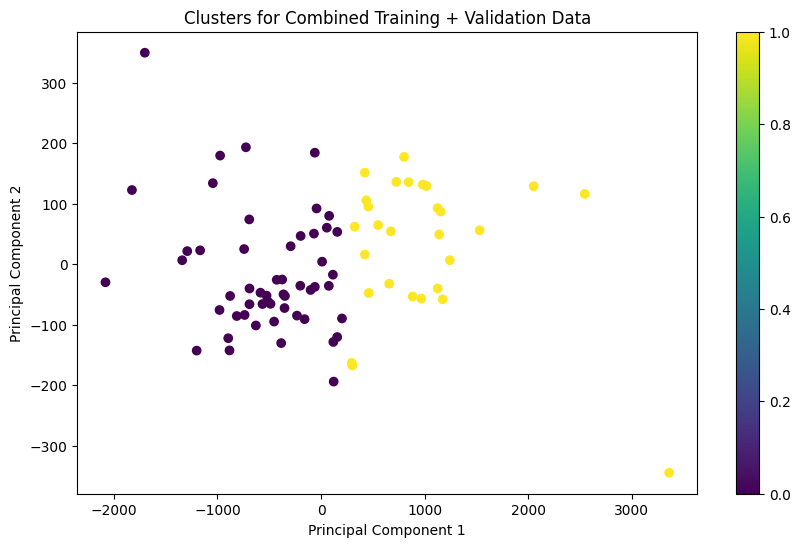

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result_combined = pca.fit_transform(X_combined)

# Compute cluster assignments for X_combined
combined_clusters = kmeans.predict(X_combined)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result_combined[:, 0], pca_result_combined[:, 1], c=combined_clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters for Combined Training + Validation Data')
plt.colorbar()
plt.show()

### Approach 1: Clusters for Combined Training + Validation Data
- **Distribution:** The data points are spread across both principal components, with a noticeable concentration around the zero mark on Principal Component 1.
- **Clusters:** We observe different clusters in the visualization, represented by different colors. There are areas where clusters seem to be well separated, particularly the yellow and purple clusters. However, some overlap is also noticeable, which might indicate either the existence of mixed data points or the need for a more refined clustering algorithm.
- **Variability:** The spread along Principal Component 1 (horizontal axis) is wider compared to Principal Component 2 (vertical axis). This indicates that the first principal component captures more variability in the data compared to the second principal component.

#### Approach 2: Visualizing the clustering on the test data (X_test)

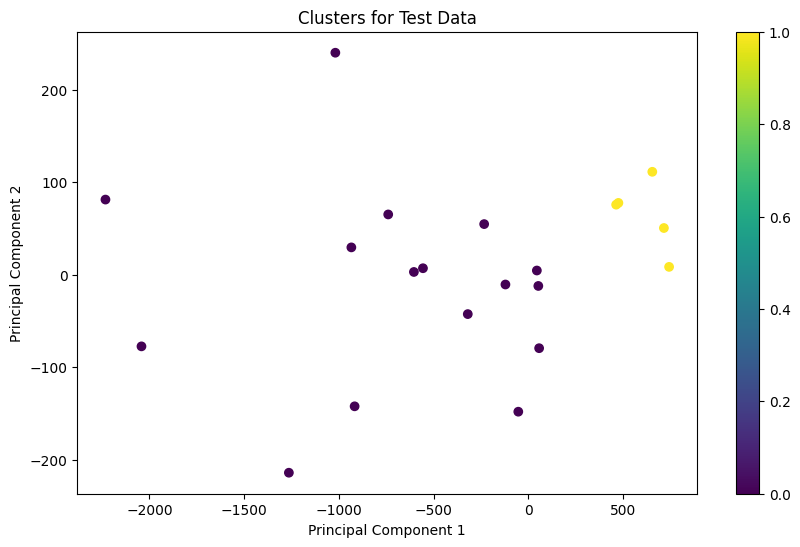

In [ ]:
# Reduce dimensions of X_test for visualization
pca_result_test = pca.transform(X_test)  # Notice the use of transform, not fit_transform!

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result_test[:, 0], pca_result_test[:, 1], c=test_clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters for Test Data')
plt.colorbar()
plt.show()

### Approach 2: Clusters for Test Data
- **Distribution:** The data points for the test set are less spread out compared to the combined training and validation data. Most of the points are located towards the left side of the plot.
- **Clusters:** The cluster representation for the test data also showcases a few different colors, implying different clusters. However, it seems like one cluster (the purple one) dominates the representation. There are fewer yellow points, and they are closer to the dominant purple cluster. This might indicate that the test set is more homogeneous than the training set or that the test data points mainly belong to one cluster.
- **Variability:** Similar to the combined data, the spread along Principal Component 1 is more significant than Principal Component 2, indicating more variability captured by the first principal component.

### Overall Observation:
1. The combined training and validation data have a more diverse representation of clusters. This is expected as it likely contains more data points from various classes or groups.
2. The test data seems to be primarily from one cluster or has a significant representation from one particular group.
3. The PCA visualizations are helpful for understanding the broad separations in the data, but it's essential to remember that PCA is a linear dimensionality reduction technique. If the original data has complex, non-linear relationships, PCA might not capture all the intricacies. It's possible that other non-linear dimensionality reduction techniques (like t-SNE or UMAP) could provide different insights.
4. If the goal is to get a better clustering result, it might be worth trying different numbers of clusters, other clustering algorithms, or considering other feature engineering techniques.

# References

1. Ravanelli, A., Cristoforetti, L., & Omologo, M. (2017). Deep Learning Architectures for Modelling Auditory Receptive Fields with Temporal Modulation. Retrieved from [https://arxiv.org/abs/1703.00372](https://arxiv.org/abs/1703.00372)

2. Bianchi, F., Grattarola, D., & Alippi, C. (2019). Spectral Clustering with Graph Neural Networks for Graph Pooling. Retrieved from [https://dblp.org/rec/conf/icml/BianchiGA20.html](https://dblp.org/rec/conf/icml/BianchiGA20.html)

3. Huang, D., Wang, C., Wu, J.-S., Lai, J., & Kwoh, C. (2019). Ultra-Scalable Spectral Clustering and Ensemble Clustering. Retrieved from [https://dx.doi.org/10.1109/TKDE.2019.2903410](https://dx.doi.org/10.1109/TKDE.2019.2903410)

4. Yu, S.-m., Du, Z.-j., Zhang, X., Luo, H.-y., & Lin, X.-d. (2022). Trust Cop-Kmeans Clustering Analysis and Minimum-Cost Consensus Model Considering Voluntary Trust Loss in Social Network Large-Scale Decision-Making. Retrieved from [https://dx.doi.org/10.1109/TFUZZ.2021.3089745](https://dx.doi.org/10.1109/TFUZZ.2021.3089745)

5. Hofmeyr, D. P. (2018). Degrees of Freedom and Model Selection for kmeans Clustering. Retrieved from [https://dx.doi.org/10.1016/j.csda.2020.106974](https://dx.doi.org/10.1016/j.csda.2020.106974)

6. Murtagh, F., & Legendre, P. (2011). Ward’s Hierarchical Agglomerative Clustering Method: Which Algorithms Implement Ward’s Criterion? Retrieved from [https://dx.doi.org/10.1007/s00357-014-9161-z](https://dx.doi.org/10.1007/s00357-014-9161-z)

7. Vijaya, Sharma, S., & Batra, N. (2019). Comparative Study of Single Linkage, Complete Linkage, and Ward Method of Agglomerative Clustering. Retrieved from [https://dx.doi.org/10.1109/COMITCon.2019.8862232](https://dx.doi.org/10.1109/COMITCon.2019.8862232)

8. Li, T., Rezaeipanah, A., & El Din. (2022). An ensemble agglomerative hierarchical clustering algorithm based on clusters clustering technique and the novel similarity measurement. Retrieved from [https://dx.doi.org/10.1016/j.jksuci.2022.04.010](https://dx.doi.org/10.1016/j.jksuci.2022.04.010)

---



AI statement: I used chat.openai.com during my ideation process. Specifically, I used chat to ideate algorithms and types of analysis that I can conduct on my vlog data. This only informed my initial process of ideation. I acknowledge that all the work included in this jupyter notebook is my own. I have not received solutions from anyone or any AI tools.